# ANGSD genotyping and population structure of *O. lurida* 2bRAD data

Uses .bam files from Bowtie2 mapping of filtered 2bRAD reads to Olurida_v081 genome

## Assess base qualities and coverage depth on subset of genome
Make a list of all .bam files for genotyping, that resides in both the ANGSD analysis working directory and the directory with bam files.

## Population structure - All 3 populations

### Run ANGSD
Make sure genotyping replicates are removed from bams file.

`-minInd 117 -minIndDepth 2` : Only keeping sites with > 2 reads in > 70% of samples.  
`-doGeno` : set at 9 for coverting a .geno to a vcf with genotypes; set at 32 for PCA not using IBS  
`-minMaf 0.01`: retain sites with minor allele freq of at least 1%


In [1]:
FILTERS="-uniqueOnly 1 -remove_bads 1 -minMapQ 20 -minQ 25 \
-sb_pval 1e-5 -skipTriallelic 1 -minInd 117 -minIndDepth 3 -snp_pval 1e-3 -minMaf 0.01"
# output commands for posterior probabililties
TODOvcf="-doMajorMinor 1 -doMaf 1 -doCounts 1 -doIBS 1 -doCov 1 -makeMatrix 1 -doGeno 9 \
-doPost 1 -doGlf 2 -dosnpstat 1"
# output commands for hard coded genotypes
TODOpca="-doMajorMinor 1 -doMaf 1 -doCounts 1 -doGeno 32 -doPost 1"
#relatedness
TODOrelate="-doMajorMinor 1 -doMaf 1 -doCounts 1 -doPost 1 -doGlf 3 -dosnpstat"

angsd -b bams_filt_nreps -GL 1 $FILTERS $TODOvcf -P 1 -out ../ANGSD_run/Afilt32m70_01

angsd -b bams_filt_nreps -GL 1 $FILTERS $TODOpca -P 1 -out ../ANGSD_run/Afilt32m70_01pca

angsd -b bams_filt_nreps -GL 1 $FILTERS $TODOrelate -P 1 -out ../ANGSD_run/Afilt32m70_01relate

In [1]:
SUFFIX = 'Afilt32m70_01'

## Make VCF file

In [2]:
%expand
module load gcc/6.2.0
module load qctool/2.0

cp {SUFFIX}.geno.gz {SUFFIX}cp.geno.gz
gunzip {SUFFIX}cp.geno.gz
sed -i 's/\t/ /g' {SUFFIX}cp.geno
sed -i 's/.$//' {SUFFIX}cp.geno
sed -i 's/^/--- /' {SUFFIX}cp.geno
mv {SUFFIX}cp.geno {SUFFIX}.gen
qctool_v2.0-rc5 -g {SUFFIX}.gen -threshhold 0.501 -og {SUFFIX}_pp5.vcf
qctool_v2.0-rc5 -g {SUFFIX}.gen -threshhold 0.75 -og {SUFFIX}_pp75.vcf


Welcome to qctool
(version: 2.0-rc5, revision )

(C) 2009-2017 University of Oxford

Opening genotype files                                      : [******************************] (1/1,0.0s,71.0/s)

Input SAMPLE file(s):         Output SAMPLE file:             "(n/a)".
Sample exclusion output file:   "(n/a)".

Input GEN file(s):
           ThreshholdingSNPDataSource(chain:Afilt32m70_01.gen)Output GEN file(s):             "Afilt32m70_01_pp5.vcf"
Output SNP position file(s):    (n/a)
Sample filter:                  .
# of samples in input files:    166.
# of samples after filtering:   166 (0 filtered out).


VCFFormatSNPDataSink::write_header(): FORMAT entries are:
##FORMAT=<ID=GP,Type=Float,Number=G,Description="Genotype call probabilities">
##FORMAT=<ID=GT,Type=String,Number=1,Description="Genotype call probabilities, threshholded at 0.50">

Processing SNPs                                             :  (5351/?,-2.8s)502.5/s)
Total: 5351SNPs.

Number of SNPs:
                     -- i

In [3]:
%expand
# fix contig naming in vcf
IN = open("{SUFFIX}_pp5.vcf","r")
OUT = open("{SUFFIX}_pp5_con.vcf","w")

for line in IN:
    if "#" not in line:
        stuff = line.split()
        contig = stuff[2].split(",")[0]
        ID = contig+":"+stuff[1]
        stuff[0] = contig
        stuff[2] = ID
        OUT.write('\t'.join(stuff)+"\n")
    else:
        OUT.write(line)

IN.close()
OUT.close()

# fix contig naming in vcf
IN = open("{SUFFIX}_pp75.vcf","r")
OUT = open("{SUFFIX}_pp75_con.vcf","w")

for line in IN:
    if "#" not in line:
        stuff = line.split()
        contig = stuff[2].split(",")[0]
        ID = contig+":"+stuff[1]
        stuff[0] = contig
        stuff[2] = ID
        OUT.write('\t'.join(stuff)+"\n")
    else:
        OUT.write(line)

IN.close()
OUT.close()

In [4]:
%expand
rm {SUFFIX}_pp5.vcf
mv {SUFFIX}_pp5_con.vcf {SUFFIX}_pp5.vcf
rm {SUFFIX}_pp75.vcf
mv {SUFFIX}_pp75_con.vcf {SUFFIX}_pp75.vcf

In [5]:
%expand
module load vcftools/0.1.15

vcftools --vcf {SUFFIX}_pp5.vcf --recode --recode-INFO-all \
--min-alleles 2 --max-alleles 2 \
--max-missing 0.75 \
--out {SUFFIX}_pp5_m75

vcftools --vcf {SUFFIX}_pp75.vcf --recode --recode-INFO-all \
--min-alleles 2 --max-alleles 2 \
--max-missing 0.75 \
--out {SUFFIX}_pp75_m75


VCFtools - 0.1.15
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf Afilt32m70_01_pp5.vcf
	--recode-INFO-all
	--max-alleles 2
	--min-alleles 2
	--max-missing 0.75
	--out Afilt32m70_01_pp5_m75
	--recode

After filtering, kept 166 out of 166 Individuals
Outputting VCF file...
After filtering, kept 5349 out of a possible 5351 Sites
Run Time = 1.00 seconds

VCFtools - 0.1.15
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf Afilt32m70_01_pp75.vcf
	--recode-INFO-all
	--max-alleles 2
	--min-alleles 2
	--max-missing 0.75
	--out Afilt32m70_01_pp75_m75
	--recode

After filtering, kept 166 out of 166 Individuals
Outputting VCF file...
After filtering, kept 5277 out of a possible 5351 Sites
Run Time = 1.00 seconds


### NgsAdmix using genotype likelihoods

In [6]:
%expand [ ]
module load gcc/6.2.0
module load ngsadmix/32

mkdir Admix

for K in `seq 1 5` ;
do NGSadmix -likes [SUFFIX].beagle.gz -K $K -P 10 -o Admix/[SUFFIX]_${K};
done

mkdir: cannot create directory `Admix': File exists
	-> Dumping file: Admix/Afilt32m70_01_1.log
	-> Dumping file: Admix/Afilt32m70_01_1.filter
Input: lname=Afilt32m70_01.beagle.gz nPop=1, fname=(null) qname=(null) outfiles=Admix/Afilt32m70_01_1
Setup: seed=1563291900 nThreads=10 method=1
Convergence: maxIter=2000 tol=0.000010 tolLike50=0.100000 dymBound=0
Filters: misTol=0.050000 minMaf=0.050000 minLrt=0.000000 minInd=0
Input file has dim: nsites=5351 nind=166
Input file has dim (AFTER filtering): nsites=3623 nind=166
iter[start] like is=1047834.027087
EM accelerated Thread has reached convergence with tol 0.000010
best like=-461712.902936 after 4 iterations
	-> Dumping file: Admix/Afilt32m70_01_1.qopt
	-> Dumping file: Admix/Afilt32m70_01_1.fopt.gz
	[ALL done] cpu-time used =  0.79 sec
	[ALL done] walltime used =  0.00 sec
	-> Dumping file: Admix/Afilt32m70_01_2.log
	-> Dumping file: Admix/Afilt32m70_01_2.filter
Input: lname=Afilt32m70_01.beagle.gz nPop=2, fname=(null) qname=(null) ou

In [7]:
# make ind2pop file
infile = "bams_filt_nreps"
outfile = "Admix/filtNreps.ind2pop"
IN= open(infile,"r")
OUT = open(outfile,"w")

for line in IN:
    stuff = line.split(".")
    name = stuff[0]
    pop = name[0:2]
    OUT.write(name+"\t"+pop+"\n")
IN.close()
OUT.close()

    

V1        V2          ind       pop
HC1-11    0.8444203 0.155579679 HC1-11    HC 
HC1-12    1.0000000 0.000000001 HC1-12    HC 
HC1-13    1.0000000 0.000000001 HC1-13    HC 
HC1-14-L5 0.9230202 0.076979829 HC1-14-L5 HC 
HC1-15    0.8577347 0.142265291 HC1-15    HC

Loading required package: colorspace
Loading required package: RColorBrewer
Warning message in brewer.pal(npops, "Set1"):
"minimal value for n is 3, returning requested palette with 3 different levels
"

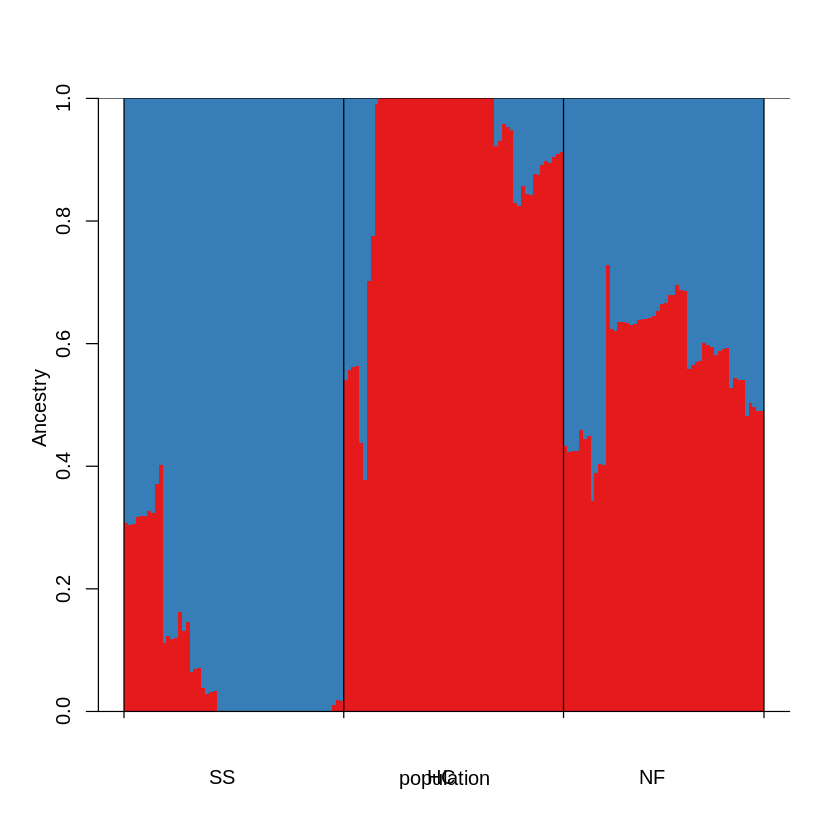

In [8]:
%expand
# primitive look at admixture data:
# tbl=read.table("rads.2.Q")
# barplot(t(as.matrix(tbl)), col=rainbow(5),xlab="Individual #", ylab="Ancestry", border=NA)

#-----------------
# prettier:

# assembling the input table
dir="./Admix/" # path to input files
inName="{SUFFIX}_2.qopt" # name of the input file to plot, output of ngsAdmix or ADMIXTURE run
npops=2
pops="filtNreps.ind2pop" # 2-column tab-delimited table of individual assignments to populations; must be in the same order as samples in the bam list or vcf file.
tbl=read.table(paste(dir,inName,sep=""),header=F)
i2p=read.table(paste(dir,pops,sep=""),header=F)
names(i2p)=c("ind","pop")
tbl=cbind(tbl,i2p)
row.names(tbl)=tbl$ind

head(tbl,5) # this is how the resulting dataset must look

source("../../2bRAD_denovo/plot_admixture_v4_function.R")

# putting populaitons in desired order (edit pop names as needed or skip to plot them alphabetically)
tbl$pop=factor(tbl$pop,levels=c("SS","HC","NF"))

ords=plotAdmixture(data=tbl,npops=npops,angle=0,vshift=0,hshift=0)


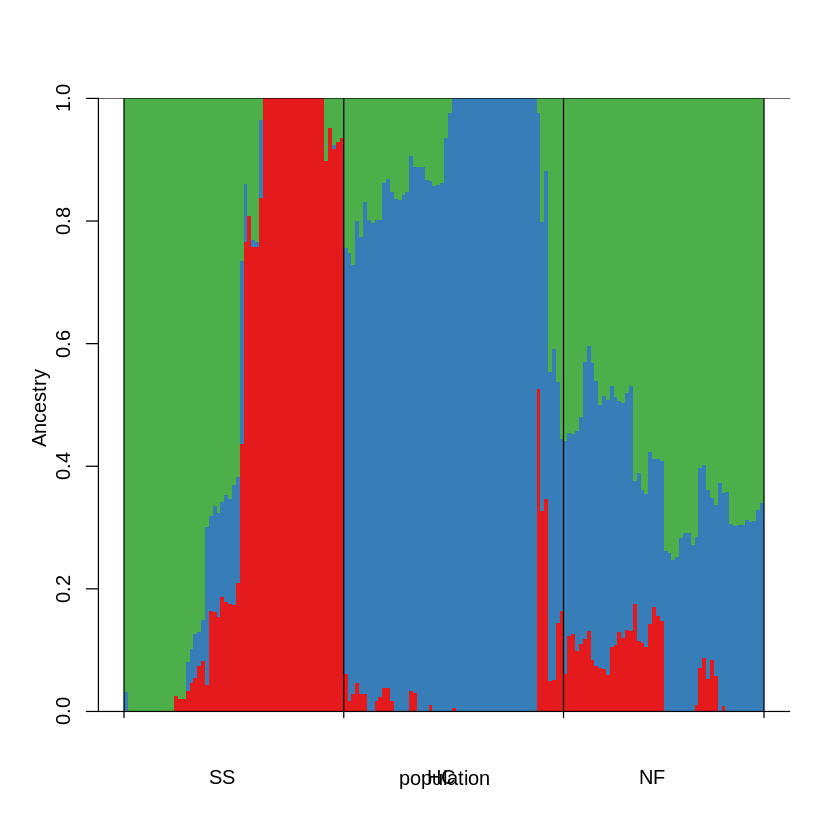

In [9]:
%expand
# primitive look at admixture data:
# tbl=read.table("rads.2.Q")
# barplot(t(as.matrix(tbl)), col=rainbow(5),xlab="Individual #", ylab="Ancestry", border=NA)

#-----------------
# prettier:

# assembling the input table
dir="./Admix/" # path to input files
inName="{SUFFIX}_3.qopt" # name of the input file to plot, output of ngsAdmix or ADMIXTURE run
npops=3
pops="filtNreps.ind2pop" # 2-column tab-delimited table of individual assignments to populations; must be in the same order as samples in the bam list or vcf file.
tbl=read.table(paste(dir,inName,sep=""),header=F)
i2p=read.table(paste(dir,pops,sep=""),header=F)
names(i2p)=c("ind","pop")
tbl=cbind(tbl,i2p)
row.names(tbl)=tbl$ind

source("../../2bRAD_denovo/plot_admixture_v4_function.R")

# putting populaitons in desired order (edit pop names as needed or skip to plot them alphabetically)
tbl$pop=factor(tbl$pop,levels=c("SS","HC","NF"))

ords=plotAdmixture(data=tbl,npops=npops,angle=0,vshift=0,hshift=0)


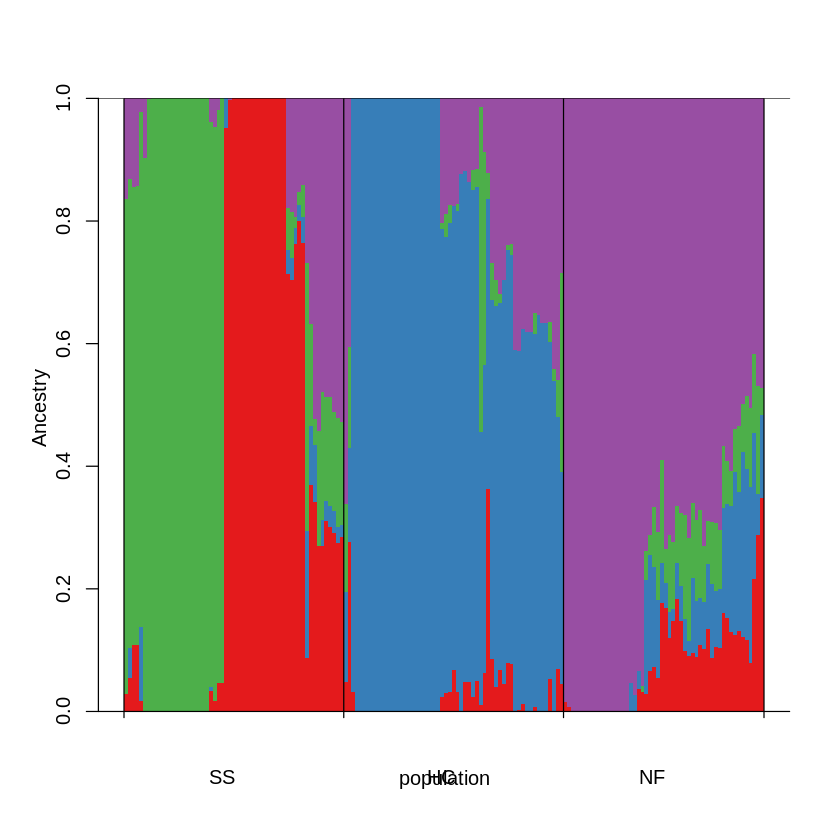

In [10]:
%expand
# primitive look at admixture data:
# tbl=read.table("rads.2.Q")
# barplot(t(as.matrix(tbl)), col=rainbow(5),xlab="Individual #", ylab="Ancestry", border=NA)

#-----------------
# prettier:

# assembling the input table
dir="./Admix/" # path to input files
inName="{SUFFIX}_4.qopt" # name of the input file to plot, output of ngsAdmix or ADMIXTURE run
npops=4
pops="filtNreps.ind2pop" # 2-column tab-delimited table of individual assignments to populations; must be in the same order as samples in the bam list or vcf file.
tbl=read.table(paste(dir,inName,sep=""),header=F)
i2p=read.table(paste(dir,pops,sep=""),header=F)
names(i2p)=c("ind","pop")
tbl=cbind(tbl,i2p)
row.names(tbl)=tbl$ind

source("../../2bRAD_denovo/plot_admixture_v4_function.R")

# putting populaitons in desired order (edit pop names as needed or skip to plot them alphabetically)
tbl$pop=factor(tbl$pop,levels=c("SS","HC","NF"))

ords=plotAdmixture(data=tbl,npops=npops,angle=0,vshift=0,hshift=0)


### Relatedness

In [11]:
%expand
module load gcc/6.2.0
module load htslib/1.7.36

# relatedness (must run ANGSD with option '-doGlf 3' to make this work)
# (column "rab" in the result is relatedness coefficient, Fa and Fb are individual inbreeding coefficients):
zcat {SUFFIX}relate.mafs.gz | cut -f5 |sed 1d >freq
NIND=`cat bams_filt_nreps | wc -l`
ngsRelate -f freq -g {SUFFIX}relate.glf.gz -n $NIND -z bams_filt_nreps -O {SUFFIX}.relatedness


	-> Number of file names read:166
	-> Seed is: 2040187822
	-> Frequency file: 'freq' contain 5351 number of sites
	-> nind:166 overall_number_of_sites:5351
	-> Done reading data from file: 0.20 0.00
	-> Starting analysis now
	-> length of joblist:13695
	[ALL done] cpu-time used =  328.14 sec (filereading took: 0.20 sec)
	[ALL done] walltime used =  84.00 sec (filereading took: 0.00 sec)


In [12]:
%expand
head -n 2 {SUFFIX}.relatedness

a	b	ida	idb	nSites	J9	J8	J7	J6	J5	J4	J3	J2	J1	rab	Fa	Fb	theta	inbred_relatedness_1_2	inbred_relatedness_2_1	fraternity	identity	zygosity	2of3_IDB	F_diff_a_b	loglh	nIter	bestoptimll	coverage	2dsfs	R0	R1	KING	2dsfs_loglike	2dsfsf_niter
0	1	HC1-11.trim.bt2.bam	HC1-12.trim.bt2.bam	3392	0.871310	0.000177	0.024680	0.000001	0.000000	0.048601	0.000000	0.055231	0.000001	0.024769	0.103833	0.055233	0.012385	0.000001	0.000001	0.079911	0.000001	0.079911	0.104301	0.024300	-5122.277642	106	-1	0.633900	4.382803e-01,1.613000e-01,3.679986e-02,1.417960e-01,1.116152e-01,2.603370e-02,3.924810e-02,2.810476e-02,1.682199e-02	0.681340	0.257604	-0.069738	-5677.372044	10


## Ordination analyses
### Clustering/PCoA based on identity by state (IBS) based on single read resampling

In [13]:
bams=read.table("bams_filt_nreps")[,1] # list of bam files
goods=c(1:length(bams))

# reading table of pairs of replicates (tab-delimited) - skip if there are no clones
#clonepairs=read.table("clonepairs.tab",sep="\t")
#repsa= clonepairs[,1]
#repsb= clonepairs[,2]
# removing "b" replicates
#goods=which(!(bams %in% repsb))

#--------------------
# loading individual to population correspondences
i2p=read.table("Admix/filtNreps.ind2pop",sep="\t") # 2-column tab-delimited table of individual assignments to populations; must be in the same order as samples in the bam list or vcf file.
row.names(i2p)=i2p[,1]
i2p=i2p[goods,]
site=i2p[,2]

# settign up colors for plotting
#palette(rainbow(length(unique(site))))
palette(c("grey","orange","blue"))
colors=as.numeric(as.factor(site))
colpops=as.numeric(as.factor(sort(unique(site))))

#-------------




Loading required package: permute
Loading required package: lattice
This is vegan 2.5-3



Call:
adonis(formula = ma ~ site, data = conds) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

           Df SumsOfSqs  MeanSqs F.Model      R2 Pr(>F)    
site        1    0.2550 0.254990  11.036 0.06305  0.001 ***
Residuals 164    3.7892 0.023105         0.93695           
Total     165    4.0442                  1.00000           
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

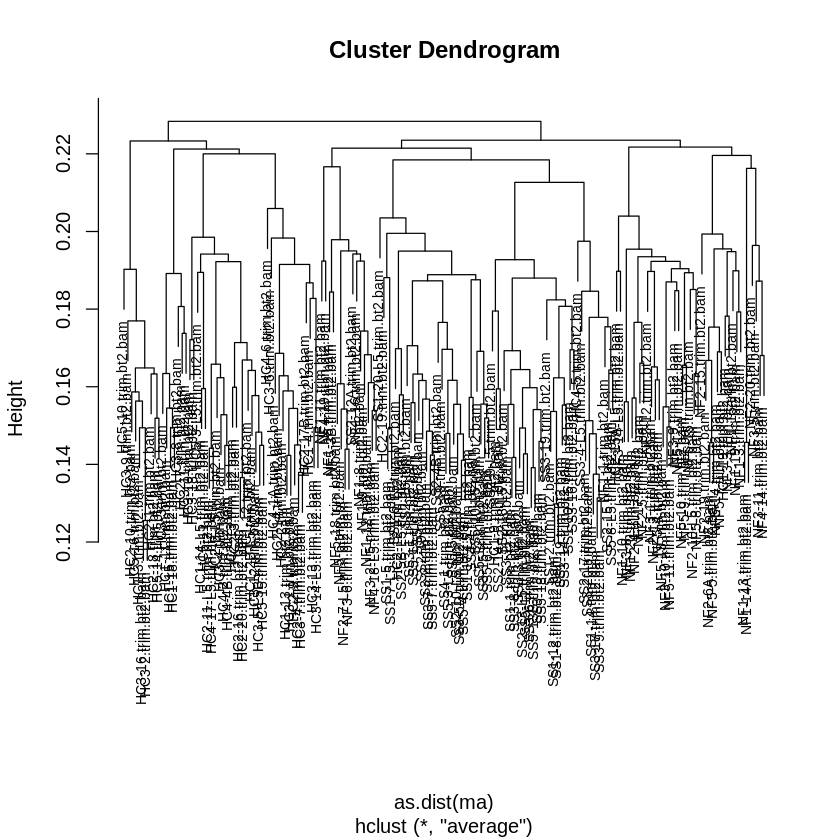

In [14]:
%expand
library(vegan)
# clustering / PCoA based on identity by state (IBS) based on single read resampling
# (for low and/or uneven coverage)

ma = as.matrix(read.table("{SUFFIX}.ibsMat"))
#hc=hclust(as.dist(ma),"ave")
#plot(hc,cex=0.5)  # this shows how similar clones are

ma=ma[goods,goods]
dimnames(ma)=list(bams[goods],bams[goods])
hc=hclust(as.dist(ma),"ave")
plot(hc,cex=0.7) # without clones

# performing PCoA and CAP
conds=data.frame(cbind(site))
pp0=capscale(ma~1)
pp=capscale(ma~site,conds)

# significance of by-site divergence
adonis(ma~site,conds)




Loading required package: ade4

   /// adegenet 2.1.1 is loaded ////////////

   > overview: '?adegenet'
   > tutorials/doc/questions: 'adegenetWeb()' 
   > bug reports/feature requests: adegenetIssues()




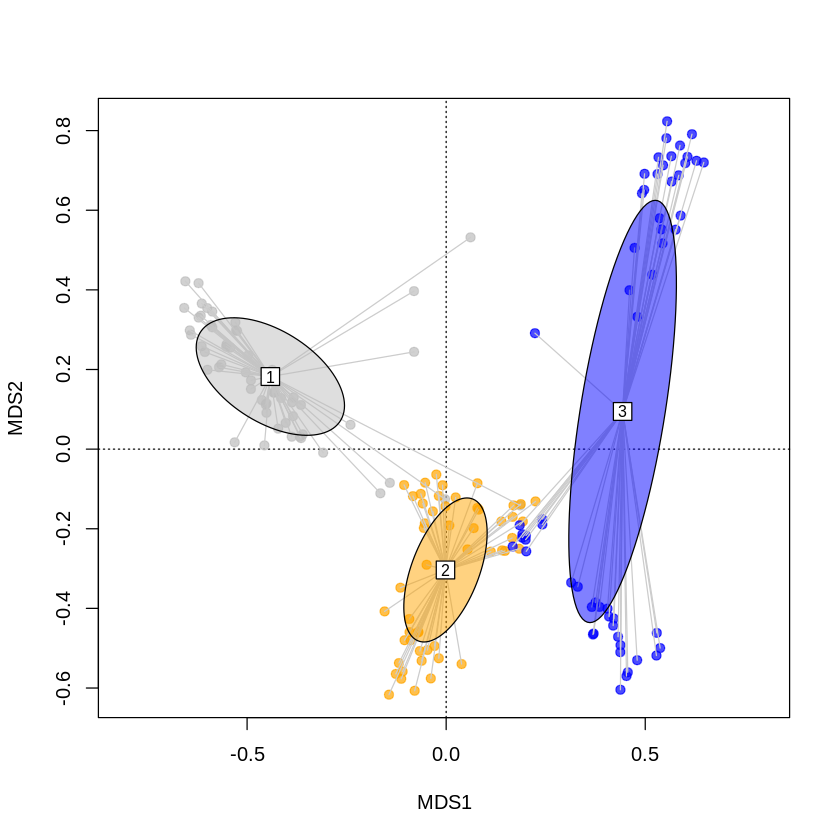

In [15]:
# eigenvectors
#plot(pp0$CA$eig) 

axes2plot=c(1,2)  
#quartz()
library(adegenet) # for transp()
cmd=pp0
plot(cmd,choices=axes2plot,display="sites",type="n") # choices - axes to display
points(cmd,choices=axes2plot,pch=19,col=transp(colors,alpha=0.7))
#ordihull(cmd,choices= axes2plot,groups= conds$grp,draw="polygon",col=1+as.numeric(unique(as.factor(conds$grp))),label=T)
ordispider(cmd,choices= axes2plot,groups=conds$site,col="grey80")
ordiellipse(cmd,choices= axes2plot,groups= conds$site,draw="polygon",col=colpops,label=T)

# unscaled, to identify outliers
#plot(cmd$CA$u[,axes2plot],pch=19,col=colors)
#ordispider(cmd$CA$u[,axes2plot],groups=conds$site,col="grey80")
#ordiellipse(cmd$CA$u[,axes2plot],groups= conds$site,draw="polygon",col=colpops,label=T)
#identify(cmd$CA$u[,axes2plot],labels=colnames(ma),n=3,cex=0.7)

### exploring outliers
* associate missing data with outliers
* associate library prep with outliers and SS split
* check relatedness


#### Missing data

In [16]:
cat test_runs/qranksAll19filt

[1] "proportion of sites better than coverage of 5 for each sample:"
                        cbind.sort.c5..
HC1-2B-L5.trim.bt2.bam        0.6308411
SS3-20.trim.bt2.bam           0.6600266
HC5-11.trim.bt2.bam           0.7000000
SS1-7-L5.trim.bt2.bam         0.7003257
NF5-9.trim.bt2.bam            0.7007389
HC3-4.trim.bt2.bam            0.7020757
NF1-8.trim.bt2.bam            0.7048951
NF2-12.trim.bt2.bam           0.7106667
SS5-3-L5.trim.bt2.bam         0.7111111
NF3-3.trim.bt2.bam            0.7121212
NF3-14-L5.trim.bt2.bam        0.7148594
SS5-5.trim.bt2.bam            0.7181604
SS1-6-L5.trim.bt2.bam         0.7207207
NF1-14B.trim.bt2.bam          0.7244582
HC1-4.trim.bt2.bam            0.7251908
HC3-5-L5.trim.bt2.bam         0.7270408
SS5-15.trim.bt2.bam           0.7272727
NF5-8.trim.bt2.bam            0.7280899
NF1-12.trim.bt2.bam           0.7321429
NF3-2-L5.trim.bt2.bam         0.7343550
SS5-6.trim.bt2.bam            0.7360097
NF5-4.trim.bt2.bam            0.7364568
HC1-12.trim

"Missingness" or low coverage in outliers:
* HC4-5: 75%
* SS3-9: 74%
* S33-20: 66% (mbd sample)
* SS2-15: 78%


#### library pre
nothing out of the ordinary on [library prep spreadsheet](https://docs.google.com/spreadsheets/d/1qrKW9QdtMMrSDHVRHzigEixuh7S8l10ZDySN5R5ZkPM/edit?usp=sharing) for those samples

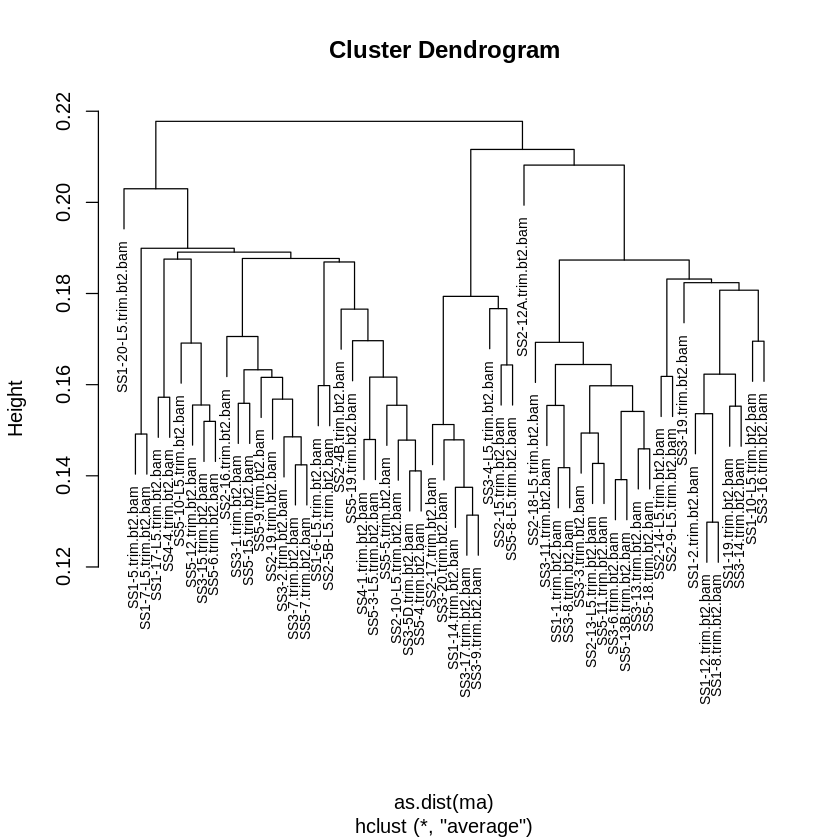

In [17]:
%expand
# only SS
goods=grep("SS",bams)

ma = as.matrix(read.table("{SUFFIX}.ibsMat"))
#hc=hclust(as.dist(ma),"ave")
#plot(hc,cex=0.5)  # this shows how similar clones are

ma=ma[goods,goods]
dimnames(ma)=list(bams[goods],bams[goods])
hc=hclust(as.dist(ma),"ave")
plot(hc,cex=0.7) # without clones


https://ryanpeek.github.io/radseq/pipeline_colony.html#sibship

would like to come up with way to summarize relatedness within and between these 2 groups

### Using NGSCovar to get matrix for pca

In [18]:
%expand
module load gcc/6.2.0
module load ngstools
NSITES=`zcat {SUFFIX}.mafs.gz | tail -n+2 | wc -l`
echo $NSITES

5351


In [21]:
%expand
gunzip {SUFFIX}pca.geno.gz
ngsCovar -probfile {SUFFIX}pca.geno -outfile {SUFFIX}.covar -nind 166 -nsites $NSITES -call 0 -norm 0

gzip: Afilt32m70_01pca.geno.gz: No such file or directory
Message (not error/warning): for this window nsites is 5351 and effective is 5351.000000


In [22]:
length(bams)

[1] 166

In [23]:
%expand
write.table(cbind(seq(1,length(bams)),rep(1,length(bams)),as.character(site)), row.names=F, sep="\t",
col.names=c("FID","IID","CLUSTER"), file="{SUFFIX}.clst", quote=F)

In [24]:
%expand
mkdir Results
Rscript /apps/software/gcc-6.2.0/ngstools/Scripts/plotPCA.R -i {SUFFIX}.covar \
-c 1-2 -a {SUFFIX}.clst -o ./Results/{SUFFIX}.pca.pdf

3.59 2.74 2.44 2.16 1.91 1.74 1.55 1.46 1.35 1.04 1.01 0.978 0.936 0.885 0.871 0.824 0.812 0.798 0.766 0.761 0.753 0.735 0.725 0.716 0.713 0.708 0.7 0.689 0.683 0.673 0.668 0.661 0.659 0.646 0.641 0.64 0.636 0.631 0.622 0.617 0.616 0.611 0.608 0.605 0.6 0.597 0.593 0.59 0.586 0.581 0.577 0.576 0.572 0.569 0.565 0.563 0.557 0.554 0.55 0.549 0.546 0.542 0.539 0.535 0.534 0.531 0.531 0.525 0.521 0.52 0.518 0.513 0.512 0.508 0.507 0.504 0.502 0.501 0.5 0.498 0.493 0.493 0.489 0.488 0.485 0.483 0.482 0.48 0.479 0.478 0.474 0.469 0.467 0.466 0.463 0.462 0.46 0.458 0.455 0.453 0.453 0.451 0.45 0.448 0.448 0.445 0.444 0.443 0.441 0.44 0.438 0.436 0.435 0.432 0.432 0.428 0.427 0.426 0.424 0.422 0.421 0.421 0.418 0.418 0.416 0.414 0.413 0.412 0.41 0.409 0.408 0.406 0.404 0.404 0.401 0.399 0.399 0.397 0.397 0.396 0.395 0.393 0.392 0.391 0.39 0.387 0.386 0.383 0.381 0.38 0.379 0.378 0.374 0.373 0.368 0.368 0.362 0.36 0.357 0.341 0.337 0.335 0.332 0.316 0.297 0.29 
Saving 7 x 7 in image


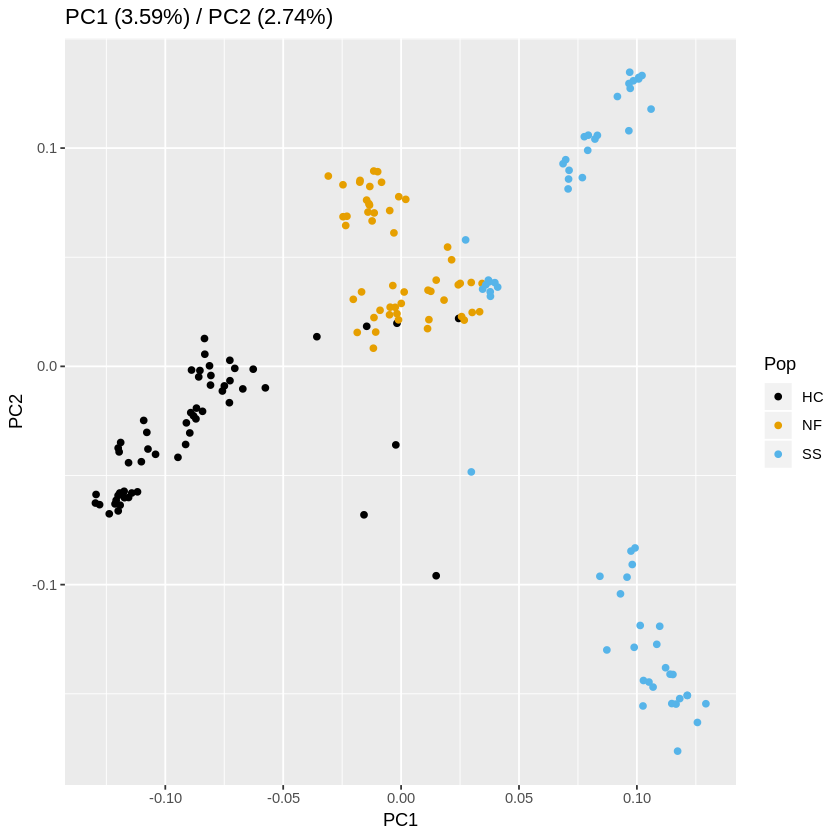

In [25]:
%expand
library(methods)
library(optparse)
library(ggplot2)

# colorblind friendly: http://www.cookbook-r.com/Graphs/Colors_(ggplot2)/
cbPalette <- c("#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")
# To use for fills, add: scale_fill_manual(values=cbPalette)
# To use for line and point colors, add: scale_colour_manual(values=cbPalette)

#option_list <- list(make_option(c('-i','--in_file'), action='store', type='character', default=NULL, help='Input file (output from ngsCovar)'),
#                    make_option(c('-c','--comp'), action='store', type='character', default=1-2, help='Components to plot'),
#                    make_option(c('-a','--annot_file'), action='store', type='character', default=NULL, help='Annotation file with individual classification (2 column TSV with ID and ANNOTATION)'),
#                    make_option(c('-o','--out_file'), action='store', type='character', default=NULL, help='Output file')                    )
#opt <- parse_args(OptionParser(option_list = option_list))

# Annotation file is in plink cluster format

#################################################################################

# Read input file
covar <- read.table("{SUFFIX}.covar", stringsAsFact=F);

# Read annot file
annot <- read.table("{SUFFIX}.clst", sep="\t", header=T); # note that plink cluster files are usually tab-separated

# Parse components to analyze
comp <- as.numeric(strsplit("1-2", "-", fixed=TRUE)[[1]])

# Eigenvalues
eig <- eigen(covar, symm=TRUE);
eig$val <- eig$val/sum(eig$val);
#cat(signif(eig$val, digits=3)*100,"\n");

# Plot
PC <- as.data.frame(eig$vectors)
colnames(PC) <- gsub("V", "PC", colnames(PC))
PC$Pop <- factor(annot$CLUSTER)

title <- paste("PC",comp[1]," (",signif(eig$val[comp[1]], digits=3)*100,"%)"," / PC",comp[2]," (",signif(eig$val[comp[2]], digits=3)*100,"%)",sep="",collapse="")

x_axis = paste("PC",comp[1],sep="")
y_axis = paste("PC",comp[2],sep="")

ggplot() + geom_point(data=PC, aes_string(x=x_axis, y=y_axis, color="Pop")) + ggtitle(title) + scale_colour_manual(values=cbPalette)
#ggsave(opt$out_file)
#unlink("Rplots.pdf", force=TRUE)


3.5 2.7 2.36 2.15 1.9 1.7 1.5 1.42 1.29 1.03 0.983 0.959 0.914 0.869 0.852 0.828 0.806 0.787 0.767 0.755 0.743 0.731 0.717 0.71 0.708 0.699 0.693 0.687 0.676 0.672 0.665 0.661 0.654 0.644 0.642 0.639 0.635 0.628 0.623 0.616 0.614 0.611 0.604 0.603 0.599 0.596 0.59 0.589 0.585 0.582 0.573 0.572 0.57 0.567 0.565 0.56 0.56 0.552 0.55 0.549 0.543 0.541 0.54 0.537 0.536 0.532 0.528 0.524 0.522 0.519 0.517 0.516 0.514 0.51 0.506 0.505 0.505 0.501 0.499 0.498 0.495 0.493 0.492 0.488 0.485 0.483 0.482 0.481 0.479 0.477 0.476 0.473 0.469 0.469 0.467 0.466 0.463 0.462 0.46 0.457 0.455 0.454 0.453 0.451 0.448 0.448 0.445 0.443 0.442 0.441 0.44 0.438 0.436 0.433 0.433 0.432 0.429 0.427 0.425 0.424 0.424 0.422 0.421 0.419 0.419 0.417 0.415 0.415 0.414 0.413 0.412 0.409 0.409 0.408 0.406 0.403 0.401 0.401 0.399 0.399 0.398 0.396 0.395 0.395 0.392 0.39 0.39 0.387 0.385 0.384 0.382 0.381 0.379 0.378 0.375 0.372 0.368 0.367 0.366 0.358 0.349 0.346 0.344 0.341 0.325 0.301 0.296 


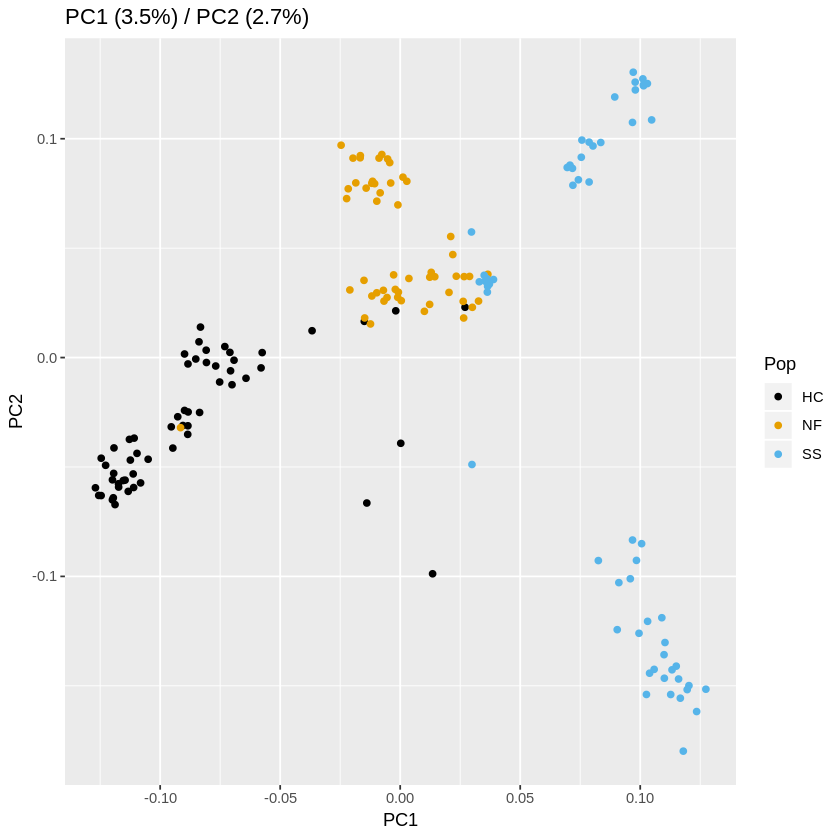

In [23]:
%expand
library(methods)
library(optparse)
library(ggplot2)

# colorblind friendly: http://www.cookbook-r.com/Graphs/Colors_(ggplot2)/
cbPalette <- c("#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")
# To use for fills, add: scale_fill_manual(values=cbPalette)
# To use for line and point colors, add: scale_colour_manual(values=cbPalette)

#option_list <- list(make_option(c('-i','--in_file'), action='store', type='character', default=NULL, help='Input file (output from ngsCovar)'),
#                    make_option(c('-c','--comp'), action='store', type='character', default=1-2, help='Components to plot'),
#                    make_option(c('-a','--annot_file'), action='store', type='character', default=NULL, help='Annotation file with individual classification (2 column TSV with ID and ANNOTATION)'),
#                    make_option(c('-o','--out_file'), action='store', type='character', default=NULL, help='Output file')                    )
#opt <- parse_args(OptionParser(option_list = option_list))

# Annotation file is in plink cluster format

#################################################################################

# Read input file
covar <- read.table("{SUFFIX}.covar", stringsAsFact=F);

# Read annot file
annot <- read.table("{SUFFIX}.clst", sep="\t", header=T); # note that plink cluster files are usually tab-separated

# Parse components to analyze
comp <- as.numeric(strsplit("1-2", "-", fixed=TRUE)[[1]])

# Eigenvalues
eig <- eigen(covar, symm=TRUE);
eig$val <- eig$val/sum(eig$val);
#cat(signif(eig$val, digits=3)*100,"\n");

# Plot
PC <- as.data.frame(eig$vectors)
colnames(PC) <- gsub("V", "PC", colnames(PC))
PC$Pop <- factor(annot$CLUSTER)

title <- paste("PC",comp[1]," (",signif(eig$val[comp[1]], digits=3)*100,"%)"," / PC",comp[2]," (",signif(eig$val[comp[2]], digits=3)*100,"%)",sep="",collapse="")

x_axis = paste("PC",comp[1],sep="")
y_axis = paste("PC",comp[2],sep="")

ggplot() + geom_point(data=PC, aes_string(x=x_axis, y=y_axis, color="Pop")) + ggtitle(title) + scale_colour_manual(values=cbPalette)
#ggsave(opt$out_file)
#unlink("Rplots.pdf", force=TRUE)


In [ ]:
%expand

#-------------
# t-SNE:  machine learning to identify groups of samples 
# based on genotypes' correlations
# (only makes sense if you have hundreds of samples)

library(Rtsne)
library(vegan)
library(adegenet)
quartz()

# perplexity:  expected number fo neighbors. Set to 0.5x N(samples per pop)
perp=15
rt = Rtsne(as.dist(1-cov2cor(co)), perplexity=perp,max_iter=2,is_distance=T)
for (i in 1:250){
	rt = Rtsne(as.dist(1-cov2cor(co)), perplexity=perp,max_iter=10,Y_init=rt$Y,is_distance=T)
	plot(rt$Y,col=colors,pch=16,cex=0.8,main=i*10)
}
ordispider(rt$Y,groups=site,col="grey80",alpha=0.01)
ordiellipse(rt$Y,groups= site,draw="polygon",col=colpops,label=T)

### Remove outliers


In [ ]:
echo "NF5-19\n"

## SFS for Fst

In [2]:
module load gcc/6.2.0
module load angsd/0.918

In [3]:
zcat sfsm70.geno.gz | python ../../2bRAD_denovo/HetMajorityProb.py | awk "\$6 < 0.75 {print \$1\"\\t\"\$2}" > sfsm70_aSites

In [4]:
angsd sites index sfsm70_aSites

	-> angsd version: 0.918 (htslib: 1.5) build(Aug  1 2017 16:32:01)
	-> Indexing sfsm70_aSites and will add '0' to pos column
	-> Filterfile: sfsm70_aSites supplied will generate binary representations... 
	-> Input file has 2 columns, chr pos
	-> Writing chr:'Contig0' 
	-> Writing chr:'Contig1' 
	-> Writing chr:'Contig2' 
	-> Writing chr:'Contig3' 
	-> Writing chr:'Contig4' 
	-> Writing chr:'Contig5' 
	-> Writing chr:'Contig6' 
	-> Writing chr:'Contig8' 
	-> Writing chr:'Contig9' 
	-> Writing chr:'Contig12' 
	-> Writing chr:'Contig13' 
	-> Writing chr:'Contig16' 
	-> Writing chr:'Contig17' 
	-> Writing chr:'Contig18' 
	-> Writing chr:'Contig21' 
	-> Writing chr:'Contig24' 
	-> Writing chr:'Contig25' 
	-> Writing chr:'Contig26' 
	-> Writing chr:'Contig28' 
	-> Writing chr:'Contig30' 
	-> Writing chr:'Contig31' 
	-> Writing chr:'Contig32' 
	-> Writing chr:'Contig33' 
	-> Writing chr:'Contig35' 
	-> Writing chr:'Contig36' 
	-> Writing chr:'Contig38' 
	-> Writing chr:'Contig39' 
	-> Writin

	-> Writing chr:'Contig603' 
	-> Writing chr:'Contig606' 
	-> Writing chr:'Contig607' 
	-> Writing chr:'Contig611' 
	-> Writing chr:'Contig612' 
	-> Writing chr:'Contig613' 
	-> Writing chr:'Contig616' 
	-> Writing chr:'Contig622' 
	-> Writing chr:'Contig623' 
	-> Writing chr:'Contig627' 
	-> Writing chr:'Contig628' 
	-> Writing chr:'Contig630' 
	-> Writing chr:'Contig632' 
	-> Writing chr:'Contig633' 
	-> Writing chr:'Contig635' 
	-> Writing chr:'Contig638' 
	-> Writing chr:'Contig640' 
	-> Writing chr:'Contig643' 
	-> Writing chr:'Contig646' 
	-> Writing chr:'Contig647' 
	-> Writing chr:'Contig650' 
	-> Writing chr:'Contig651' 
	-> Writing chr:'Contig652' 
	-> Writing chr:'Contig653' 
	-> Writing chr:'Contig654' 
	-> Writing chr:'Contig659' 
	-> Writing chr:'Contig662' 
	-> Writing chr:'Contig667' 
	-> Writing chr:'Contig668' 
	-> Writing chr:'Contig676' 
	-> Writing chr:'Contig679' 
	-> Writing chr:'Contig680' 
	-> Writing chr:'Contig686' 
	-> Writing chr:'Contig688' 
	-> Writing ch

	-> Writing chr:'Contig1580' 
	-> Writing chr:'Contig1584' 
	-> Writing chr:'Contig1586' 
	-> Writing chr:'Contig1590' 
	-> Writing chr:'Contig1604' 
	-> Writing chr:'Contig1605' 
	-> Writing chr:'Contig1607' 
	-> Writing chr:'Contig1608' 
	-> Writing chr:'Contig1616' 
	-> Writing chr:'Contig1622' 
	-> Writing chr:'Contig1624' 
	-> Writing chr:'Contig1629' 
	-> Writing chr:'Contig1630' 
	-> Writing chr:'Contig1637' 
	-> Writing chr:'Contig1657' 
	-> Writing chr:'Contig1663' 
	-> Writing chr:'Contig1664' 
	-> Writing chr:'Contig1670' 
	-> Writing chr:'Contig1674' 
	-> Writing chr:'Contig1676' 
	-> Writing chr:'Contig1678' 
	-> Writing chr:'Contig1680' 
	-> Writing chr:'Contig1683' 
	-> Writing chr:'Contig1691' 
	-> Writing chr:'Contig1700' 
	-> Writing chr:'Contig1705' 
	-> Writing chr:'Contig1711' 
	-> Writing chr:'Contig1713' 
	-> Writing chr:'Contig1724' 
	-> Writing chr:'Contig1726' 
	-> Writing chr:'Contig1727' 
	-> Writing chr:'Contig1730' 
	-> Writing chr:'Contig1732' 
	-> Writin

	-> Writing chr:'Contig2992' 
	-> Writing chr:'Contig2995' 
	-> Writing chr:'Contig2996' 
	-> Writing chr:'Contig3002' 
	-> Writing chr:'Contig3015' 
	-> Writing chr:'Contig3030' 
	-> Writing chr:'Contig3033' 
	-> Writing chr:'Contig3034' 
	-> Writing chr:'Contig3035' 
	-> Writing chr:'Contig3036' 
	-> Writing chr:'Contig3046' 
	-> Writing chr:'Contig3053' 
	-> Writing chr:'Contig3070' 
	-> Writing chr:'Contig3072' 
	-> Writing chr:'Contig3073' 
	-> Writing chr:'Contig3087' 
	-> Writing chr:'Contig3091' 
	-> Writing chr:'Contig3092' 
	-> Writing chr:'Contig3098' 
	-> Writing chr:'Contig3105' 
	-> Writing chr:'Contig3113' 
	-> Writing chr:'Contig3123' 
	-> Writing chr:'Contig3137' 
	-> Writing chr:'Contig3141' 
	-> Writing chr:'Contig3155' 
	-> Writing chr:'Contig3168' 
	-> Writing chr:'Contig3181' 
	-> Writing chr:'Contig3185' 
	-> Writing chr:'Contig3191' 
	-> Writing chr:'Contig3194' 
	-> Writing chr:'Contig3200' 
	-> Writing chr:'Contig3206' 
	-> Writing chr:'Contig3221' 
	-> Writin

	-> Writing chr:'Contig5178' 
	-> Writing chr:'Contig5182' 
	-> Writing chr:'Contig5186' 
	-> Writing chr:'Contig5188' 
	-> Writing chr:'Contig5208' 
	-> Writing chr:'Contig5213' 
	-> Writing chr:'Contig5215' 
	-> Writing chr:'Contig5219' 
	-> Writing chr:'Contig5229' 
	-> Writing chr:'Contig5235' 
	-> Writing chr:'Contig5241' 
	-> Writing chr:'Contig5265' 
	-> Writing chr:'Contig5270' 
	-> Writing chr:'Contig5284' 
	-> Writing chr:'Contig5290' 
	-> Writing chr:'Contig5310' 
	-> Writing chr:'Contig5332' 
	-> Writing chr:'Contig5344' 
	-> Writing chr:'Contig5349' 
	-> Writing chr:'Contig5353' 
	-> Writing chr:'Contig5358' 
	-> Writing chr:'Contig5362' 
	-> Writing chr:'Contig5367' 
	-> Writing chr:'Contig5376' 
	-> Writing chr:'Contig5377' 
	-> Writing chr:'Contig5402' 
	-> Writing chr:'Contig5410' 
	-> Writing chr:'Contig5412' 
	-> Writing chr:'Contig5439' 
	-> Writing chr:'Contig5440' 
	-> Writing chr:'Contig5444' 
	-> Writing chr:'Contig5453' 
	-> Writing chr:'Contig5457' 
	-> Writin

	-> Writing chr:'Contig9650' 
	-> Writing chr:'Contig9662' 
	-> Writing chr:'Contig9718' 
	-> Writing chr:'Contig9722' 
	-> Writing chr:'Contig9757' 
	-> Writing chr:'Contig9791' 
	-> Writing chr:'Contig9810' 
	-> Writing chr:'Contig9812' 
	-> Writing chr:'Contig9823' 
	-> Writing chr:'Contig9826' 
	-> Writing chr:'Contig9829' 
	-> Writing chr:'Contig9880' 
	-> Writing chr:'Contig9978' 
	-> Writing chr:'Contig9995' 
	-> Writing chr:'Contig9996' 
	-> Writing chr:'Contig10050' 
	-> Writing chr:'Contig10074' 
	-> Writing chr:'Contig10076' 
	-> Writing chr:'Contig10105' 
	-> Writing chr:'Contig10117' 
	-> Writing chr:'Contig10120' 
	-> Writing chr:'Contig10165' 
	-> Writing chr:'Contig10191' 
	-> Writing chr:'Contig10259' 
	-> Writing chr:'Contig10262' 
	-> Writing chr:'Contig10264' 
	-> Writing chr:'Contig10269' 
	-> Writing chr:'Contig10339' 
	-> Writing chr:'Contig10386' 
	-> Writing chr:'Contig10424' 
	-> Writing chr:'Contig10430' 
	-> Writing chr:'Contig10512' 
	-> Writing chr:'Contig

	-> Writing chr:'Contig17005' 
	-> Writing chr:'Contig17012' 
	-> Writing chr:'Contig17015' 
	-> Writing chr:'Contig17021' 
	-> Writing chr:'Contig17022' 
	-> Writing chr:'Contig17037' 
	-> Writing chr:'Contig17050' 
	-> Writing chr:'Contig17057' 
	-> Writing chr:'Contig17059' 
	-> Writing chr:'Contig17060' 
	-> Writing chr:'Contig17070' 
	-> Writing chr:'Contig17080' 
	-> Writing chr:'Contig17091' 
	-> Writing chr:'Contig17102' 
	-> Writing chr:'Contig17104' 
	-> Writing chr:'Contig17108' 
	-> Writing chr:'Contig17132' 
	-> Writing chr:'Contig17148' 
	-> Writing chr:'Contig17149' 
	-> Writing chr:'Contig17150' 
	-> Writing chr:'Contig17153' 
	-> Writing chr:'Contig17163' 
	-> Writing chr:'Contig17164' 
	-> Writing chr:'Contig17167' 
	-> Writing chr:'Contig17168' 
	-> Writing chr:'Contig17171' 
	-> Writing chr:'Contig17173' 
	-> Writing chr:'Contig17174' 
	-> Writing chr:'Contig17177' 
	-> Writing chr:'Contig17182' 
	-> Writing chr:'Contig17184' 
	-> Writing chr:'Contig17185' 
	-> Writ

	-> Writing chr:'Contig18953' 
	-> Writing chr:'Contig18960' 
	-> Writing chr:'Contig18968' 
	-> Writing chr:'Contig18980' 
	-> Writing chr:'Contig18997' 
	-> Writing chr:'Contig19002' 
	-> Writing chr:'Contig19003' 
	-> Writing chr:'Contig19004' 
	-> Writing chr:'Contig19011' 
	-> Writing chr:'Contig19018' 
	-> Writing chr:'Contig19019' 
	-> Writing chr:'Contig19022' 
	-> Writing chr:'Contig19049' 
	-> Writing chr:'Contig19065' 
	-> Writing chr:'Contig19076' 
	-> Writing chr:'Contig19095' 
	-> Writing chr:'Contig19104' 
	-> Writing chr:'Contig19114' 
	-> Writing chr:'Contig19115' 
	-> Writing chr:'Contig19117' 
	-> Writing chr:'Contig19125' 
	-> Writing chr:'Contig19129' 
	-> Writing chr:'Contig19145' 
	-> Writing chr:'Contig19149' 
	-> Writing chr:'Contig19155' 
	-> Writing chr:'Contig19161' 
	-> Writing chr:'Contig19169' 
	-> Writing chr:'Contig19173' 
	-> Writing chr:'Contig19175' 
	-> Writing chr:'Contig19180' 
	-> Writing chr:'Contig19185' 
	-> Writing chr:'Contig19189' 
	-> Writ

	-> Writing chr:'Contig21099' 
	-> Writing chr:'Contig21118' 
	-> Writing chr:'Contig21128' 
	-> Writing chr:'Contig21131' 
	-> Writing chr:'Contig21136' 
	-> Writing chr:'Contig21156' 
	-> Writing chr:'Contig21176' 
	-> Writing chr:'Contig21182' 
	-> Writing chr:'Contig21183' 
	-> Writing chr:'Contig21203' 
	-> Writing chr:'Contig21207' 
	-> Writing chr:'Contig21223' 
	-> Writing chr:'Contig21236' 
	-> Writing chr:'Contig21274' 
	-> Writing chr:'Contig21279' 
	-> Writing chr:'Contig21280' 
	-> Writing chr:'Contig21281' 
	-> Writing chr:'Contig21298' 
	-> Writing chr:'Contig21309' 
	-> Writing chr:'Contig21320' 
	-> Writing chr:'Contig21321' 
	-> Writing chr:'Contig21322' 
	-> Writing chr:'Contig21327' 
	-> Writing chr:'Contig21345' 
	-> Writing chr:'Contig21357' 
	-> Writing chr:'Contig21389' 
	-> Writing chr:'Contig21410' 
	-> Writing chr:'Contig21416' 
	-> Writing chr:'Contig21417' 
	-> Writing chr:'Contig21427' 
	-> Writing chr:'Contig21443' 
	-> Writing chr:'Contig21468' 
	-> Writ

	-> Writing chr:'Contig23093' 
	-> Writing chr:'Contig23104' 
	-> Writing chr:'Contig23106' 
	-> Writing chr:'Contig23116' 
	-> Writing chr:'Contig23138' 
	-> Writing chr:'Contig23145' 
	-> Writing chr:'Contig23153' 
	-> Writing chr:'Contig23157' 
	-> Writing chr:'Contig23166' 
	-> Writing chr:'Contig23177' 
	-> Writing chr:'Contig23182' 
	-> Writing chr:'Contig23183' 
	-> Writing chr:'Contig23185' 
	-> Writing chr:'Contig23191' 
	-> Writing chr:'Contig23195' 
	-> Writing chr:'Contig23197' 
	-> Writing chr:'Contig23220' 
	-> Writing chr:'Contig23221' 
	-> Writing chr:'Contig23234' 
	-> Writing chr:'Contig23237' 
	-> Writing chr:'Contig23246' 
	-> Writing chr:'Contig23251' 
	-> Writing chr:'Contig23252' 
	-> Writing chr:'Contig23271' 
	-> Writing chr:'Contig23280' 
	-> Writing chr:'Contig23281' 
	-> Writing chr:'Contig23288' 
	-> Writing chr:'Contig23295' 
	-> Writing chr:'Contig23312' 
	-> Writing chr:'Contig23329' 
	-> Writing chr:'Contig23334' 
	-> Writing chr:'Contig23351' 
	-> Writ

	-> Writing chr:'Contig25118' 
	-> Writing chr:'Contig25131' 
	-> Writing chr:'Contig25152' 
	-> Writing chr:'Contig25159' 
	-> Writing chr:'Contig25164' 
	-> Writing chr:'Contig25168' 
	-> Writing chr:'Contig25177' 
	-> Writing chr:'Contig25187' 
	-> Writing chr:'Contig25189' 
	-> Writing chr:'Contig25194' 
	-> Writing chr:'Contig25202' 
	-> Writing chr:'Contig25204' 
	-> Writing chr:'Contig25214' 
	-> Writing chr:'Contig25228' 
	-> Writing chr:'Contig25236' 
	-> Writing chr:'Contig25242' 
	-> Writing chr:'Contig25243' 
	-> Writing chr:'Contig25254' 
	-> Writing chr:'Contig25274' 
	-> Writing chr:'Contig25283' 
	-> Writing chr:'Contig25299' 
	-> Writing chr:'Contig25300' 
	-> Writing chr:'Contig25307' 
	-> Writing chr:'Contig25319' 
	-> Writing chr:'Contig25321' 
	-> Writing chr:'Contig25342' 
	-> Writing chr:'Contig25352' 
	-> Writing chr:'Contig25354' 
	-> Writing chr:'Contig25358' 
	-> Writing chr:'Contig25381' 
	-> Writing chr:'Contig25388' 
	-> Writing chr:'Contig25393' 
	-> Writ

	-> Writing chr:'Contig27021' 
	-> Writing chr:'Contig27025' 
	-> Writing chr:'Contig27031' 
	-> Writing chr:'Contig27041' 
	-> Writing chr:'Contig27042' 
	-> Writing chr:'Contig27044' 
	-> Writing chr:'Contig27047' 
	-> Writing chr:'Contig27063' 
	-> Writing chr:'Contig27065' 
	-> Writing chr:'Contig27075' 
	-> Writing chr:'Contig27078' 
	-> Writing chr:'Contig27080' 
	-> Writing chr:'Contig27085' 
	-> Writing chr:'Contig27088' 
	-> Writing chr:'Contig27093' 
	-> Writing chr:'Contig27104' 
	-> Writing chr:'Contig27105' 
	-> Writing chr:'Contig27106' 
	-> Writing chr:'Contig27109' 
	-> Writing chr:'Contig27122' 
	-> Writing chr:'Contig27132' 
	-> Writing chr:'Contig27134' 
	-> Writing chr:'Contig27138' 
	-> Writing chr:'Contig27145' 
	-> Writing chr:'Contig27153' 
	-> Writing chr:'Contig27156' 
	-> Writing chr:'Contig27162' 
	-> Writing chr:'Contig27187' 
	-> Writing chr:'Contig27188' 
	-> Writing chr:'Contig27194' 
	-> Writing chr:'Contig27200' 
	-> Writing chr:'Contig27209' 
	-> Writ

	-> Writing chr:'Contig29273' 
	-> Writing chr:'Contig29274' 
	-> Writing chr:'Contig29275' 
	-> Writing chr:'Contig29276' 
	-> Writing chr:'Contig29283' 
	-> Writing chr:'Contig29296' 
	-> Writing chr:'Contig29300' 
	-> Writing chr:'Contig29308' 
	-> Writing chr:'Contig29315' 
	-> Writing chr:'Contig29316' 
	-> Writing chr:'Contig29332' 
	-> Writing chr:'Contig29335' 
	-> Writing chr:'Contig29345' 
	-> Writing chr:'Contig29350' 
	-> Writing chr:'Contig29359' 
	-> Writing chr:'Contig29364' 
	-> Writing chr:'Contig29367' 
	-> Writing chr:'Contig29369' 
	-> Writing chr:'Contig29381' 
	-> Writing chr:'Contig29394' 
	-> Writing chr:'Contig29397' 
	-> Writing chr:'Contig29405' 
	-> Writing chr:'Contig29437' 
	-> Writing chr:'Contig29438' 
	-> Writing chr:'Contig29447' 
	-> Writing chr:'Contig29459' 
	-> Writing chr:'Contig29465' 
	-> Writing chr:'Contig29466' 
	-> Writing chr:'Contig29482' 
	-> Writing chr:'Contig29499' 
	-> Writing chr:'Contig29529' 
	-> Writing chr:'Contig29531' 
	-> Writ

	-> Writing chr:'Contig31507' 
	-> Writing chr:'Contig31510' 
	-> Writing chr:'Contig31515' 
	-> Writing chr:'Contig31518' 
	-> Writing chr:'Contig31520' 
	-> Writing chr:'Contig31522' 
	-> Writing chr:'Contig31527' 
	-> Writing chr:'Contig31529' 
	-> Writing chr:'Contig31531' 
	-> Writing chr:'Contig31541' 
	-> Writing chr:'Contig31551' 
	-> Writing chr:'Contig31570' 
	-> Writing chr:'Contig31577' 
	-> Writing chr:'Contig31584' 
	-> Writing chr:'Contig31586' 
	-> Writing chr:'Contig31593' 
	-> Writing chr:'Contig31613' 
	-> Writing chr:'Contig31615' 
	-> Writing chr:'Contig31619' 
	-> Writing chr:'Contig31628' 
	-> Writing chr:'Contig31629' 
	-> Writing chr:'Contig31640' 
	-> Writing chr:'Contig31645' 
	-> Writing chr:'Contig31661' 
	-> Writing chr:'Contig31671' 
	-> Writing chr:'Contig31673' 
	-> Writing chr:'Contig31675' 
	-> Writing chr:'Contig31685' 
	-> Writing chr:'Contig31695' 
	-> Writing chr:'Contig31699' 
	-> Writing chr:'Contig31700' 
	-> Writing chr:'Contig31706' 
	-> Writ

	-> Writing chr:'Contig33637' 
	-> Writing chr:'Contig33643' 
	-> Writing chr:'Contig33644' 
	-> Writing chr:'Contig33645' 
	-> Writing chr:'Contig33647' 
	-> Writing chr:'Contig33648' 
	-> Writing chr:'Contig33650' 
	-> Writing chr:'Contig33652' 
	-> Writing chr:'Contig33665' 
	-> Writing chr:'Contig33672' 
	-> Writing chr:'Contig33676' 
	-> Writing chr:'Contig33684' 
	-> Writing chr:'Contig33702' 
	-> Writing chr:'Contig33704' 
	-> Writing chr:'Contig33733' 
	-> Writing chr:'Contig33736' 
	-> Writing chr:'Contig33745' 
	-> Writing chr:'Contig33755' 
	-> Writing chr:'Contig33760' 
	-> Writing chr:'Contig33761' 
	-> Writing chr:'Contig33766' 
	-> Writing chr:'Contig33775' 
	-> Writing chr:'Contig33815' 
	-> Writing chr:'Contig33816' 
	-> Writing chr:'Contig33824' 
	-> Writing chr:'Contig33835' 
	-> Writing chr:'Contig33860' 
	-> Writing chr:'Contig33864' 
	-> Writing chr:'Contig33869' 
	-> Writing chr:'Contig33875' 
	-> Writing chr:'Contig33877' 
	-> Writing chr:'Contig33880' 
	-> Writ

	-> Writing chr:'Contig35872' 
	-> Writing chr:'Contig35889' 
	-> Writing chr:'Contig35901' 
	-> Writing chr:'Contig35917' 
	-> Writing chr:'Contig35920' 
	-> Writing chr:'Contig35937' 
	-> Writing chr:'Contig35942' 
	-> Writing chr:'Contig35954' 
	-> Writing chr:'Contig35965' 
	-> Writing chr:'Contig35980' 
	-> Writing chr:'Contig35991' 
	-> Writing chr:'Contig36000' 
	-> Writing chr:'Contig36003' 
	-> Writing chr:'Contig36026' 
	-> Writing chr:'Contig36032' 
	-> Writing chr:'Contig36056' 
	-> Writing chr:'Contig36057' 
	-> Writing chr:'Contig36058' 
	-> Writing chr:'Contig36076' 
	-> Writing chr:'Contig36078' 
	-> Writing chr:'Contig36097' 
	-> Writing chr:'Contig36118' 
	-> Writing chr:'Contig36121' 
	-> Writing chr:'Contig36131' 
	-> Writing chr:'Contig36136' 
	-> Writing chr:'Contig36140' 
	-> Writing chr:'Contig36158' 
	-> Writing chr:'Contig36163' 
	-> Writing chr:'Contig36178' 
	-> Writing chr:'Contig36186' 
	-> Writing chr:'Contig36188' 
	-> Writing chr:'Contig36194' 
	-> Writ

	-> Writing chr:'Contig38033' 
	-> Writing chr:'Contig38034' 
	-> Writing chr:'Contig38037' 
	-> Writing chr:'Contig38047' 
	-> Writing chr:'Contig38061' 
	-> Writing chr:'Contig38064' 
	-> Writing chr:'Contig38070' 
	-> Writing chr:'Contig38096' 
	-> Writing chr:'Contig38100' 
	-> Writing chr:'Contig38104' 
	-> Writing chr:'Contig38113' 
	-> Writing chr:'Contig38120' 
	-> Writing chr:'Contig38127' 
	-> Writing chr:'Contig38130' 
	-> Writing chr:'Contig38150' 
	-> Writing chr:'Contig38160' 
	-> Writing chr:'Contig38168' 
	-> Writing chr:'Contig38170' 
	-> Writing chr:'Contig38197' 
	-> Writing chr:'Contig38206' 
	-> Writing chr:'Contig38210' 
	-> Writing chr:'Contig38214' 
	-> Writing chr:'Contig38219' 
	-> Writing chr:'Contig38220' 
	-> Writing chr:'Contig38223' 
	-> Writing chr:'Contig38242' 
	-> Writing chr:'Contig38245' 
	-> Writing chr:'Contig38251' 
	-> Writing chr:'Contig38252' 
	-> Writing chr:'Contig38260' 
	-> Writing chr:'Contig38266' 
	-> Writing chr:'Contig38273' 
	-> Writ

	-> Writing chr:'Contig40554' 
	-> Writing chr:'Contig40557' 
	-> Writing chr:'Contig40561' 
	-> Writing chr:'Contig40574' 
	-> Writing chr:'Contig40581' 
	-> Writing chr:'Contig40587' 
	-> Writing chr:'Contig40610' 
	-> Writing chr:'Contig40616' 
	-> Writing chr:'Contig40620' 
	-> Writing chr:'Contig40623' 
	-> Writing chr:'Contig40627' 
	-> Writing chr:'Contig40639' 
	-> Writing chr:'Contig40643' 
	-> Writing chr:'Contig40653' 
	-> Writing chr:'Contig40656' 
	-> Writing chr:'Contig40659' 
	-> Writing chr:'Contig40670' 
	-> Writing chr:'Contig40672' 
	-> Writing chr:'Contig40674' 
	-> Writing chr:'Contig40691' 
	-> Writing chr:'Contig40697' 
	-> Writing chr:'Contig40714' 
	-> Writing chr:'Contig40736' 
	-> Writing chr:'Contig40754' 
	-> Writing chr:'Contig40760' 
	-> Writing chr:'Contig40764' 
	-> Writing chr:'Contig40770' 
	-> Writing chr:'Contig40814' 
	-> Writing chr:'Contig40815' 
	-> Writing chr:'Contig40834' 
	-> Writing chr:'Contig40837' 
	-> Writing chr:'Contig40840' 
	-> Writ

	-> Writing chr:'Contig43080' 
	-> Writing chr:'Contig43081' 
	-> Writing chr:'Contig43093' 
	-> Writing chr:'Contig43099' 
	-> Writing chr:'Contig43107' 
	-> Writing chr:'Contig43114' 
	-> Writing chr:'Contig43116' 
	-> Writing chr:'Contig43152' 
	-> Writing chr:'Contig43161' 
	-> Writing chr:'Contig43197' 
	-> Writing chr:'Contig43201' 
	-> Writing chr:'Contig43224' 
	-> Writing chr:'Contig43238' 
	-> Writing chr:'Contig43246' 
	-> Writing chr:'Contig43258' 
	-> Writing chr:'Contig43266' 
	-> Writing chr:'Contig43286' 
	-> Writing chr:'Contig43316' 
	-> Writing chr:'Contig43317' 
	-> Writing chr:'Contig43319' 
	-> Writing chr:'Contig43343' 
	-> Writing chr:'Contig43354' 
	-> Writing chr:'Contig43360' 
	-> Writing chr:'Contig43366' 
	-> Writing chr:'Contig43367' 
	-> Writing chr:'Contig43375' 
	-> Writing chr:'Contig43381' 
	-> Writing chr:'Contig43384' 
	-> Writing chr:'Contig43387' 
	-> Writing chr:'Contig43393' 
	-> Writing chr:'Contig43403' 
	-> Writing chr:'Contig43408' 
	-> Writ

	-> Writing chr:'Contig45721' 
	-> Writing chr:'Contig45734' 
	-> Writing chr:'Contig45744' 
	-> Writing chr:'Contig45749' 
	-> Writing chr:'Contig45768' 
	-> Writing chr:'Contig45778' 
	-> Writing chr:'Contig45783' 
	-> Writing chr:'Contig45838' 
	-> Writing chr:'Contig45845' 
	-> Writing chr:'Contig45855' 
	-> Writing chr:'Contig45860' 
	-> Writing chr:'Contig45866' 
	-> Writing chr:'Contig45873' 
	-> Writing chr:'Contig45874' 
	-> Writing chr:'Contig45876' 
	-> Writing chr:'Contig45878' 
	-> Writing chr:'Contig45905' 
	-> Writing chr:'Contig45907' 
	-> Writing chr:'Contig45925' 
	-> Writing chr:'Contig45927' 
	-> Writing chr:'Contig45945' 
	-> Writing chr:'Contig45949' 
	-> Writing chr:'Contig45957' 
	-> Writing chr:'Contig45964' 
	-> Writing chr:'Contig45970' 
	-> Writing chr:'Contig45972' 
	-> Writing chr:'Contig46008' 
	-> Writing chr:'Contig46010' 
	-> Writing chr:'Contig46018' 
	-> Writing chr:'Contig46040' 
	-> Writing chr:'Contig46045' 
	-> Writing chr:'Contig46052' 
	-> Writ

	-> Writing chr:'Contig48566' 
	-> Writing chr:'Contig48578' 
	-> Writing chr:'Contig48580' 
	-> Writing chr:'Contig48597' 
	-> Writing chr:'Contig48625' 
	-> Writing chr:'Contig48635' 
	-> Writing chr:'Contig48644' 
	-> Writing chr:'Contig48650' 
	-> Writing chr:'Contig48670' 
	-> Writing chr:'Contig48690' 
	-> Writing chr:'Contig48699' 
	-> Writing chr:'Contig48711' 
	-> Writing chr:'Contig48724' 
	-> Writing chr:'Contig48725' 
	-> Writing chr:'Contig48731' 
	-> Writing chr:'Contig48740' 
	-> Writing chr:'Contig48742' 
	-> Writing chr:'Contig48763' 
	-> Writing chr:'Contig48772' 
	-> Writing chr:'Contig48780' 
	-> Writing chr:'Contig48794' 
	-> Writing chr:'Contig48808' 
	-> Writing chr:'Contig48819' 
	-> Writing chr:'Contig48820' 
	-> Writing chr:'Contig48837' 
	-> Writing chr:'Contig48862' 
	-> Writing chr:'Contig48875' 
	-> Writing chr:'Contig48879' 
	-> Writing chr:'Contig48882' 
	-> Writing chr:'Contig48903' 
	-> Writing chr:'Contig48913' 
	-> Writing chr:'Contig48917' 
	-> Writ

	-> Writing chr:'Contig51217' 
	-> Writing chr:'Contig51226' 
	-> Writing chr:'Contig51233' 
	-> Writing chr:'Contig51234' 
	-> Writing chr:'Contig51258' 
	-> Writing chr:'Contig51267' 
	-> Writing chr:'Contig51281' 
	-> Writing chr:'Contig51282' 
	-> Writing chr:'Contig51301' 
	-> Writing chr:'Contig51325' 
	-> Writing chr:'Contig51332' 
	-> Writing chr:'Contig51344' 
	-> Writing chr:'Contig51365' 
	-> Writing chr:'Contig51375' 
	-> Writing chr:'Contig51428' 
	-> Writing chr:'Contig51436' 
	-> Writing chr:'Contig51475' 
	-> Writing chr:'Contig51491' 
	-> Writing chr:'Contig51506' 
	-> Writing chr:'Contig51516' 
	-> Writing chr:'Contig51519' 
	-> Writing chr:'Contig51525' 
	-> Writing chr:'Contig51558' 
	-> Writing chr:'Contig51566' 
	-> Writing chr:'Contig51579' 
	-> Writing chr:'Contig51582' 
	-> Writing chr:'Contig51593' 
	-> Writing chr:'Contig51597' 
	-> Writing chr:'Contig51627' 
	-> Writing chr:'Contig51635' 
	-> Writing chr:'Contig51643' 
	-> Writing chr:'Contig51647' 
	-> Writ

	-> Writing chr:'Contig54402' 
	-> Writing chr:'Contig54403' 
	-> Writing chr:'Contig54405' 
	-> Writing chr:'Contig54407' 
	-> Writing chr:'Contig54414' 
	-> Writing chr:'Contig54416' 
	-> Writing chr:'Contig54443' 
	-> Writing chr:'Contig54452' 
	-> Writing chr:'Contig54478' 
	-> Writing chr:'Contig54487' 
	-> Writing chr:'Contig54494' 
	-> Writing chr:'Contig54503' 
	-> Writing chr:'Contig54512' 
	-> Writing chr:'Contig54516' 
	-> Writing chr:'Contig54552' 
	-> Writing chr:'Contig54570' 
	-> Writing chr:'Contig54586' 
	-> Writing chr:'Contig54589' 
	-> Writing chr:'Contig54591' 
	-> Writing chr:'Contig54600' 
	-> Writing chr:'Contig54606' 
	-> Writing chr:'Contig54624' 
	-> Writing chr:'Contig54627' 
	-> Writing chr:'Contig54642' 
	-> Writing chr:'Contig54646' 
	-> Writing chr:'Contig54665' 
	-> Writing chr:'Contig54674' 
	-> Writing chr:'Contig54679' 
	-> Writing chr:'Contig54689' 
	-> Writing chr:'Contig54703' 
	-> Writing chr:'Contig54720' 
	-> Writing chr:'Contig54725' 
	-> Writ

	-> Writing chr:'Contig108933' 
	-> Writing chr:'Contig108951' 
	-> Writing chr:'Contig108955' 
	-> Writing chr:'Contig109044' 
	-> Writing chr:'Contig109209' 
	-> Writing chr:'Contig109225' 
	-> Writing chr:'Contig109267' 
	-> Writing chr:'Contig109285' 
	-> Writing chr:'Contig109353' 
	-> Writing chr:'Contig109414' 
	-> Writing chr:'Contig109460' 
	-> Writing chr:'Contig109562' 
	-> Writing chr:'Contig109567' 
	-> Writing chr:'Contig109642' 
	-> Writing chr:'Contig109701' 
	-> Writing chr:'Contig109712' 
	-> Writing chr:'Contig109730' 
	-> Writing chr:'Contig109766' 
	-> Writing chr:'Contig109783' 
	-> Writing chr:'Contig109789' 
	-> Writing chr:'Contig109827' 
	-> Writing chr:'Contig109862' 
	-> Writing chr:'Contig109914' 
	-> Writing chr:'Contig109978' 
	-> Writing chr:'Contig109982' 
	-> Writing chr:'Contig109994' 
	-> Writing chr:'Contig110073' 
	-> Writing chr:'Contig110114' 
	-> Writing chr:'Contig110150' 
	-> Writing chr:'Contig110169' 
	-> Writing chr:'Contig110170' 
	-> Writ

	-> Writing chr:'Contig121911' 
	-> Writing chr:'Contig121967' 
	-> Writing chr:'Contig122057' 
	-> Writing chr:'Contig122073' 
	-> Writing chr:'Contig122145' 
	-> Writing chr:'Contig122166' 
	-> Writing chr:'Contig122227' 
	-> Writing chr:'Contig122236' 
	-> Writing chr:'Contig122273' 
	-> Writing chr:'Contig122307' 
	-> Writing chr:'Contig122433' 
	-> Writing chr:'Contig122471' 
	-> Writing chr:'Contig122496' 
	-> Writing chr:'Contig122616' 
	-> Writing chr:'Contig122628' 
	-> Writing chr:'Contig122702' 
	-> Writing chr:'Contig122706' 
	-> Writing chr:'Contig122767' 
	-> Writing chr:'Contig122782' 
	-> Writing chr:'Contig122805' 
	-> Writing chr:'Contig122831' 
	-> Writing chr:'Contig122837' 
	-> Writing chr:'Contig122840' 
	-> Writing chr:'Contig122852' 
	-> Writing chr:'Contig122878' 
	-> Writing chr:'Contig122913' 
	-> Writing chr:'Contig122966' 
	-> Writing chr:'Contig122997' 
	-> Writing chr:'Contig122999' 
	-> Writing chr:'Contig123056' 
	-> Writing chr:'Contig123088' 
	-> Writ

	-> Writing chr:'Contig666778' 
	-> Writing chr:'Contig668970' 
	-> Writing chr:'Contig669985' 
	-> Writing chr:'Contig671899' 
	-> Writing chr:'Contig671940' 
	-> Writing chr:'Contig674034' 
	-> Writing chr:'Contig676684' 
	-> Writing chr:'Contig690919' 
	-> Writing chr:'Contig694218' 
	-> Filtering complete: Observed: 10049 different chromosomes from file:sfsm70_aSites
	-> Generated files:	
		'sfsm70_aSites.bin'
		'sfsm70_aSites.idx'


In [9]:
# limit analysis to only retained chromosomes
cut -f1 sfsm70_aSites | sort | uniq > chrs_m70.txt

In [10]:
# estimating site frequency likelihoods for each population, also saving allele frequencies (for genome scan) 
cd ../mapped_over13/
export GENOME_REF=/scratch/t.cri.ksilliman/CommonG/2019_Mapping/Olurida_v081.fa
TODO="-doSaf 1 -doMajorMinor 1 -doMaf 1 -doPost 1 -anc $GENOME_REF -ref $GENOME_REF"
angsd -sites ../ANGSD_run/sfsm70_aSites -rf ../ANGSD_run/chrs_m70.txt -b ../ANGSD_run/HCfiltnreps.bams -GL 1 -P 1 $TODO -out ../ANGSD_run/popHCm70
angsd -sites ../ANGSD_run/sfsm70_aSites -rf ../ANGSD_run/chrs_m70.txt -b ../ANGSD_run/SSfiltnreps.bams -GL 1 -P 1 $TODO -out ../ANGSD_run/popSSm70
angsd -sites ../ANGSD_run/sfsm70_aSites -rf ../ANGSD_run/chrs_m70.txt -b ../ANGSD_run/NFfiltnreps.bams -GL 1 -P 1 $TODO -out ../ANGSD_run/popNFm70

	-> angsd version: 0.918 (htslib: 1.5) build(Aug  1 2017 16:32:01)
	-> [prep_sites.cpp] Reading binary representation of '../ANGSD_run/sfsm70_aSites'
	-> [prep_sites.cpp] nChr: 10049 loaded from binary filter file
	-> [abcFilter.cpp] -sites is still beta, use at own risk...
	-> Reading fasta: /scratch/t.cri.ksilliman/CommonG/2019_Mapping/Olurida_v081.fa
	-> Reading fasta: /scratch/t.cri.ksilliman/CommonG/2019_Mapping/Olurida_v081.fa
	-> !! You are doing -dosaf incombination with -rf, please make sure that your -rf file is sorted !!
	-> Parsing 57 number of samples 
	-> Region lookup 1/10049
	-> Region lookup 2/10049
	-> Region lookup 3/10049
	-> Region lookup 4/10049
	-> Region lookup 5/10049
	-> Region lookup 6/10049
	-> Region lookup 7/10049
	-> Region lookup 8/10049
	-> Region lookup 9/10049
	-> Region lookup 10/10049
	-> Region lookup 11/10049
	-> Region lookup 12/10049
	-> Region lookup 13/10049
	-> Region lookup 14/10049
	-> Region lookup 15/10049
	-> Region lookup 16/10049
	-> R

	-> Region lookup 261/10049
	-> Region lookup 262/10049
	-> Region lookup 263/10049
	-> Region lookup 264/10049
	-> Region lookup 265/10049
	-> Region lookup 266/10049
	-> Region lookup 267/10049
	-> Region lookup 268/10049
	-> Region lookup 269/10049
	-> Region lookup 270/10049
	-> Region lookup 271/10049
	-> Region lookup 272/10049
	-> Region lookup 273/10049
	-> Region lookup 274/10049
	-> Region lookup 275/10049
	-> Region lookup 276/10049
	-> Region lookup 277/10049
	-> Region lookup 278/10049
	-> Region lookup 279/10049
	-> Region lookup 280/10049
	-> Region lookup 281/10049
	-> Region lookup 282/10049
	-> Region lookup 283/10049
	-> Region lookup 284/10049
	-> Region lookup 285/10049
	-> Region lookup 286/10049
	-> Region lookup 287/10049
	-> Region lookup 288/10049
	-> Region lookup 289/10049
	-> Region lookup 290/10049
	-> Region lookup 291/10049
	-> Region lookup 292/10049
	-> Region lookup 293/10049
	-> Region lookup 294/10049
	-> Region lookup 295/10049
	-> Region lookup 29

	-> Region lookup 538/10049
	-> Region lookup 539/10049
	-> Region lookup 540/10049
	-> Region lookup 541/10049
	-> Region lookup 542/10049
	-> Region lookup 543/10049
	-> Region lookup 544/10049
	-> Region lookup 545/10049
	-> Region lookup 546/10049
	-> Region lookup 547/10049
	-> Region lookup 548/10049
	-> Region lookup 549/10049
	-> Region lookup 550/10049
	-> Region lookup 551/10049
	-> Printing at chr: Contig116948 pos:8196 chunknumber 1300 contains 1 sites	-> Region lookup 552/10049
	-> Region lookup 553/10049
	-> Region lookup 554/10049
	-> Region lookup 555/10049
	-> Region lookup 556/10049
	-> Region lookup 557/10049
	-> Region lookup 558/10049
	-> Region lookup 559/10049
	-> Region lookup 560/10049
	-> Region lookup 561/10049
	-> Region lookup 562/10049
	-> Region lookup 563/10049
	-> Region lookup 564/10049
	-> Region lookup 565/10049
	-> Region lookup 566/10049
	-> Region lookup 567/10049
	-> Region lookup 568/10049
	-> Region lookup 569/10049
	-> Region lookup 570/10049


	-> Region lookup 812/10049
	-> Region lookup 813/10049
	-> Region lookup 814/10049
	-> Region lookup 815/10049
	-> Region lookup 816/10049
	-> Region lookup 817/10049
	-> Region lookup 818/10049
	-> Region lookup 819/10049
	-> Region lookup 820/10049
	-> Region lookup 821/10049
	-> Region lookup 822/10049
	-> Region lookup 823/10049
	-> Region lookup 824/10049
	-> Region lookup 825/10049
	-> Region lookup 826/10049
	-> Region lookup 827/10049
	-> Region lookup 828/10049
	-> Region lookup 829/10049
	-> Region lookup 830/10049
	-> Region lookup 831/10049
	-> Region lookup 832/10049
	-> Region lookup 833/10049
	-> Region lookup 834/10049
	-> Region lookup 835/10049
	-> Region lookup 836/10049
	-> Region lookup 837/10049
	-> Region lookup 838/10049
	-> Region lookup 839/10049
	-> Region lookup 840/10049
	-> Region lookup 841/10049
	-> Region lookup 842/10049
	-> Region lookup 843/10049
	-> Printing at chr: Contig130518 pos:4262 chunknumber 2000 contains 72 sites	-> Region lookup 844/10049

	-> Region lookup 1086/10049
	-> Region lookup 1087/10049
	-> Region lookup 1088/10049
	-> Region lookup 1089/10049
	-> Region lookup 1090/10049
	-> Region lookup 1091/10049
	-> Region lookup 1092/10049
	-> Region lookup 1093/10049
	-> Printing at chr: Contig140742 pos:3393 chunknumber 2600 contains 1 sites	-> Region lookup 1094/10049
	-> Region lookup 1095/10049
	-> Region lookup 1096/10049
	-> Region lookup 1097/10049
	-> Region lookup 1098/10049
	-> Region lookup 1099/10049
	-> Region lookup 1100/10049
	-> Region lookup 1101/10049
	-> Region lookup 1102/10049
	-> Region lookup 1103/10049
	-> Region lookup 1104/10049
	-> Region lookup 1105/10049
	-> Region lookup 1106/10049
	-> Region lookup 1107/10049
	-> Region lookup 1108/10049
	-> Region lookup 1109/10049
	-> Region lookup 1110/10049
	-> Region lookup 1111/10049
	-> Region lookup 1112/10049
	-> Region lookup 1113/10049
	-> Region lookup 1114/10049
	-> Region lookup 1115/10049
	-> Region lookup 1116/10049
	-> Region lookup 1117/10

	-> Region lookup 1350/10049
	-> Region lookup 1351/10049
	-> Region lookup 1352/10049
	-> Region lookup 1353/10049
	-> Region lookup 1354/10049
	-> Region lookup 1355/10049
	-> Region lookup 1356/10049
	-> Region lookup 1357/10049
	-> Region lookup 1358/10049
	-> Region lookup 1359/10049
	-> Region lookup 1360/10049
	-> Region lookup 1361/10049
	-> Region lookup 1362/10049
	-> Region lookup 1363/10049
	-> Region lookup 1364/10049
	-> Region lookup 1365/10049
	-> Printing at chr: Contig15480 pos:26124 chunknumber 3300 contains 36 sites	-> Region lookup 1366/10049
	-> Region lookup 1367/10049
	-> Region lookup 1368/10049
	-> Region lookup 1369/10049
	-> Region lookup 1370/10049
	-> Region lookup 1371/10049
	-> Region lookup 1372/10049
	-> Region lookup 1373/10049
	-> Region lookup 1374/10049
	-> Region lookup 1375/10049
	-> Region lookup 1376/10049
	-> Region lookup 1377/10049
	-> Region lookup 1378/10049
	-> Region lookup 1379/10049
	-> Region lookup 1380/10049
	-> Region lookup 1381/1

	-> Region lookup 1615/10049
	-> Region lookup 1616/10049
	-> Region lookup 1617/10049
	-> Region lookup 1618/10049
	-> Region lookup 1619/10049
	-> Region lookup 1620/10049
	-> Region lookup 1621/10049
	-> Region lookup 1622/10049
	-> Region lookup 1623/10049
	-> Region lookup 1624/10049
	-> Region lookup 1625/10049
	-> Region lookup 1626/10049
	-> Region lookup 1627/10049
	-> Region lookup 1628/10049
	-> Region lookup 1629/10049
	-> Region lookup 1630/10049
	-> Region lookup 1631/10049
	-> Region lookup 1632/10049
	-> Region lookup 1633/10049
	-> Region lookup 1634/10049
	-> Region lookup 1635/10049
	-> Region lookup 1636/10049
	-> Region lookup 1637/10049
	-> Region lookup 1638/10049
	-> Printing at chr: Contig16679 pos:413 chunknumber 4000 contains 30 sites	-> Region lookup 1639/10049
	-> Region lookup 1640/10049
	-> Region lookup 1641/10049
	-> Region lookup 1642/10049
	-> Region lookup 1643/10049
	-> Region lookup 1644/10049
	-> Region lookup 1645/10049
	-> Region lookup 1646/100

	-> Region lookup 1880/10049
	-> Region lookup 1881/10049
	-> Region lookup 1882/10049
	-> Region lookup 1883/10049
	-> Region lookup 1884/10049
	-> Region lookup 1885/10049
	-> Region lookup 1886/10049
	-> Region lookup 1887/10049
	-> Region lookup 1888/10049
	-> Region lookup 1889/10049
	-> Region lookup 1890/10049
	-> Region lookup 1891/10049
	-> Region lookup 1892/10049
	-> Region lookup 1893/10049
	-> Region lookup 1894/10049
	-> Printing at chr: Contig17718 pos:1987 chunknumber 4700 contains 1 sites	-> Region lookup 1895/10049
	-> Region lookup 1896/10049
	-> Region lookup 1897/10049
	-> Region lookup 1898/10049
	-> Region lookup 1899/10049
	-> Region lookup 1900/10049
	-> Region lookup 1901/10049
	-> Region lookup 1902/10049
	-> Region lookup 1903/10049
	-> Region lookup 1904/10049
	-> Region lookup 1905/10049
	-> Region lookup 1906/10049
	-> Region lookup 1907/10049
	-> Region lookup 1908/10049
	-> Region lookup 1909/10049
	-> Region lookup 1910/10049
	-> Region lookup 1911/100

	-> Region lookup 2141/10049
	-> Region lookup 2142/10049
	-> Region lookup 2143/10049
	-> Region lookup 2144/10049
	-> Region lookup 2145/10049
	-> Region lookup 2146/10049
	-> Region lookup 2147/10049
	-> Region lookup 2148/10049
	-> Region lookup 2149/10049
	-> Region lookup 2150/10049
	-> Printing at chr: Contig188222 pos:2187 chunknumber 5400 contains 35 sites	-> Region lookup 2151/10049
	-> Region lookup 2152/10049
	-> Region lookup 2153/10049
	-> Region lookup 2154/10049
	-> Region lookup 2155/10049
	-> Region lookup 2156/10049
	-> Region lookup 2157/10049
	-> Region lookup 2158/10049
	-> Region lookup 2159/10049
	-> Region lookup 2160/10049
	-> Region lookup 2161/10049
	-> Region lookup 2162/10049
	-> Region lookup 2163/10049
	-> Region lookup 2164/10049
	-> Region lookup 2165/10049
	-> Region lookup 2166/10049
	-> Region lookup 2167/10049
	-> Region lookup 2168/10049
	-> Region lookup 2169/10049
	-> Region lookup 2170/10049
	-> Region lookup 2171/10049
	-> Region lookup 2172/1

	-> Region lookup 2405/10049
	-> Region lookup 2406/10049
	-> Region lookup 2407/10049
	-> Region lookup 2408/10049
	-> Region lookup 2409/10049
	-> Region lookup 2410/10049
	-> Region lookup 2411/10049
	-> Printing at chr: Contig1996 pos:24798 chunknumber 6100 contains 42 sites	-> Region lookup 2412/10049
	-> Region lookup 2413/10049
	-> Region lookup 2414/10049
	-> Region lookup 2415/10049
	-> Region lookup 2416/10049
	-> Region lookup 2417/10049
	-> Region lookup 2418/10049
	-> Region lookup 2419/10049
	-> Region lookup 2420/10049
	-> Region lookup 2421/10049
	-> Region lookup 2422/10049
	-> Region lookup 2423/10049
	-> Region lookup 2424/10049
	-> Region lookup 2425/10049
	-> Region lookup 2426/10049
	-> Region lookup 2427/10049
	-> Region lookup 2428/10049
	-> Region lookup 2429/10049
	-> Region lookup 2430/10049
	-> Region lookup 2431/10049
	-> Region lookup 2432/10049
	-> Region lookup 2433/10049
	-> Region lookup 2434/10049
	-> Region lookup 2435/10049
	-> Region lookup 2436/10

	-> Printing at chr: Contig21156 pos:13139 chunknumber 6800 contains 111 sites	-> Region lookup 2670/10049
	-> Region lookup 2671/10049
	-> Region lookup 2672/10049
	-> Region lookup 2673/10049
	-> Region lookup 2674/10049
	-> Region lookup 2675/10049
	-> Region lookup 2676/10049
	-> Region lookup 2677/10049
	-> Region lookup 2678/10049
	-> Region lookup 2679/10049
	-> Region lookup 2680/10049
	-> Region lookup 2681/10049
	-> Region lookup 2682/10049
	-> Region lookup 2683/10049
	-> Region lookup 2684/10049
	-> Region lookup 2685/10049
	-> Region lookup 2686/10049
	-> Region lookup 2687/10049
	-> Region lookup 2688/10049
	-> Region lookup 2689/10049
	-> Region lookup 2690/10049
	-> Region lookup 2691/10049
	-> Region lookup 2692/10049
	-> Region lookup 2693/10049
	-> Region lookup 2694/10049
	-> Region lookup 2695/10049
	-> Region lookup 2696/10049
	-> Region lookup 2697/10049
	-> Region lookup 2698/10049
	-> Region lookup 2699/10049
	-> Region lookup 2700/10049
	-> Region lookup 2701/

	-> Region lookup 2932/10049
	-> Region lookup 2933/10049
	-> Region lookup 2934/10049
	-> Region lookup 2935/10049
	-> Region lookup 2936/10049
	-> Region lookup 2937/10049
	-> Region lookup 2938/10049
	-> Region lookup 2939/10049
	-> Region lookup 2940/10049
	-> Region lookup 2941/10049
	-> Region lookup 2942/10049
	-> Region lookup 2943/10049
	-> Region lookup 2944/10049
	-> Region lookup 2945/10049
	-> Region lookup 2946/10049
	-> Region lookup 2947/10049
	-> Region lookup 2948/10049
	-> Region lookup 2949/10049
	-> Region lookup 2950/10049
	-> Region lookup 2951/10049
	-> Region lookup 2952/10049
	-> Region lookup 2953/10049
	-> Region lookup 2954/10049
	-> Region lookup 2955/10049
	-> Region lookup 2956/10049
	-> Region lookup 2957/10049
	-> Region lookup 2958/10049
	-> Printing at chr: Contig22625 pos:12753 chunknumber 7600 contains 1 sites	-> Region lookup 2959/10049
	-> Region lookup 2960/10049
	-> Region lookup 2961/10049
	-> Region lookup 2962/10049
	-> Region lookup 2963/10

	-> Region lookup 3194/10049
	-> Region lookup 3195/10049
	-> Region lookup 3196/10049
	-> Region lookup 3197/10049
	-> Region lookup 3198/10049
	-> Region lookup 3199/10049
	-> Region lookup 3200/10049
	-> Region lookup 3201/10049
	-> Region lookup 3202/10049
	-> Region lookup 3203/10049
	-> Region lookup 3204/10049
	-> Region lookup 3205/10049
	-> Region lookup 3206/10049
	-> Region lookup 3207/10049
	-> Region lookup 3208/10049
	-> Region lookup 3209/10049
	-> Region lookup 3210/10049
	-> Region lookup 3211/10049
	-> Region lookup 3212/10049
	-> Region lookup 3213/10049
	-> Region lookup 3214/10049
	-> Region lookup 3215/10049
	-> Region lookup 3216/10049
	-> Region lookup 3217/10049
	-> Region lookup 3218/10049
	-> Region lookup 3219/10049
	-> Region lookup 3220/10049
	-> Region lookup 3221/10049
	-> Region lookup 3222/10049
	-> Region lookup 3223/10049
	-> Region lookup 3224/10049
	-> Printing at chr: Contig24279 pos:13789 chunknumber 8400 contains 144 sites	-> Region lookup 3225/

	-> Region lookup 3458/10049
	-> Region lookup 3459/10049
	-> Region lookup 3460/10049
	-> Region lookup 3461/10049
	-> Region lookup 3462/10049
	-> Region lookup 3463/10049
	-> Region lookup 3464/10049
	-> Region lookup 3465/10049
	-> Region lookup 3466/10049
	-> Printing at chr: Contig25818 pos:14385 chunknumber 9100 contains 126 sites	-> Region lookup 3467/10049
	-> Region lookup 3468/10049
	-> Region lookup 3469/10049
PROBS at: Contig25837	991
	-> Region lookup 3470/10049
	-> Region lookup 3471/10049
	-> Region lookup 3472/10049
	-> Region lookup 3473/10049
	-> Region lookup 3474/10049
	-> Region lookup 3475/10049
	-> Region lookup 3476/10049
	-> Region lookup 3477/10049
	-> Region lookup 3478/10049
	-> Region lookup 3479/10049
	-> Region lookup 3480/10049
	-> Region lookup 3481/10049
	-> Region lookup 3482/10049
	-> Region lookup 3483/10049
	-> Region lookup 3484/10049
	-> Region lookup 3485/10049
	-> Region lookup 3486/10049
	-> Region lookup 3487/10049
	-> Region lookup 3488/100

	-> Region lookup 3718/10049
	-> Region lookup 3719/10049
	-> Region lookup 3720/10049
	-> Region lookup 3721/10049
	-> Region lookup 3722/10049
	-> Region lookup 3723/10049
	-> Region lookup 3724/10049
	-> Region lookup 3725/10049
	-> Region lookup 3726/10049
	-> Region lookup 3727/10049
	-> Region lookup 3728/10049
	-> Region lookup 3729/10049
	-> Region lookup 3730/10049
	-> Region lookup 3731/10049
	-> Region lookup 3732/10049
	-> Region lookup 3733/10049
	-> Region lookup 3734/10049
	-> Region lookup 3735/10049
	-> Region lookup 3736/10049
	-> Region lookup 3737/10049
	-> Region lookup 3738/10049
	-> Region lookup 3739/10049
	-> Region lookup 3740/10049
	-> Printing at chr: Contig27448 pos:16527 chunknumber 9900 contains 36 sites	-> Region lookup 3741/10049
	-> Region lookup 3742/10049
	-> Region lookup 3743/10049
	-> Region lookup 3744/10049
	-> Region lookup 3745/10049
	-> Region lookup 3746/10049
	-> Region lookup 3747/10049
	-> Region lookup 3748/10049
	-> Region lookup 3749/1

	-> Region lookup 3981/10049
	-> Region lookup 3982/10049
	-> Region lookup 3983/10049
	-> Region lookup 3984/10049
	-> Region lookup 3985/10049
	-> Region lookup 3986/10049
	-> Region lookup 3987/10049
	-> Printing at chr: Contig29191 pos:5328 chunknumber 10600 contains 36 sites	-> Region lookup 3988/10049
	-> Region lookup 3989/10049
	-> Region lookup 3990/10049
	-> Region lookup 3991/10049
	-> Region lookup 3992/10049
	-> Region lookup 3993/10049
	-> Region lookup 3994/10049
	-> Region lookup 3995/10049
	-> Region lookup 3996/10049
	-> Region lookup 3997/10049
	-> Region lookup 3998/10049
	-> Region lookup 3999/10049
	-> Region lookup 4000/10049
	-> Region lookup 4001/10049
	-> Region lookup 4002/10049
	-> Region lookup 4003/10049
	-> Region lookup 4004/10049
	-> Region lookup 4005/10049
	-> Region lookup 4006/10049
	-> Region lookup 4007/10049
	-> Region lookup 4008/10049
	-> Region lookup 4009/10049
	-> Region lookup 4010/10049
	-> Region lookup 4011/10049
	-> Region lookup 4012/1

	-> Region lookup 4243/10049
	-> Region lookup 4244/10049
	-> Region lookup 4245/10049
	-> Region lookup 4246/10049
	-> Region lookup 4247/10049
	-> Region lookup 4248/10049
	-> Region lookup 4249/10049
	-> Region lookup 4250/10049
	-> Region lookup 4251/10049
	-> Region lookup 4252/10049
	-> Region lookup 4253/10049
	-> Region lookup 4254/10049
	-> Region lookup 4255/10049
	-> Region lookup 4256/10049
	-> Region lookup 4257/10049
	-> Region lookup 4258/10049
	-> Region lookup 4259/10049
	-> Region lookup 4260/10049
	-> Region lookup 4261/10049
	-> Region lookup 4262/10049
	-> Region lookup 4263/10049
	-> Region lookup 4264/10049
	-> Printing at chr: Contig31025 pos:22963 chunknumber 11400 contains 1 sites	-> Region lookup 4265/10049
	-> Region lookup 4266/10049
	-> Region lookup 4267/10049
	-> Region lookup 4268/10049
	-> Region lookup 4269/10049
	-> Region lookup 4270/10049
	-> Region lookup 4271/10049
	-> Region lookup 4272/10049
	-> Region lookup 4273/10049
	-> Region lookup 4274/1

	-> Region lookup 4507/10049
	-> Printing at chr: Contig32681 pos:38736 chunknumber 12100 contains 32 sites	-> Region lookup 4508/10049
	-> Region lookup 4509/10049
	-> Region lookup 4510/10049
	-> Region lookup 4511/10049
	-> Region lookup 4512/10049
	-> Region lookup 4513/10049
	-> Region lookup 4514/10049
	-> Region lookup 4515/10049
	-> Region lookup 4516/10049
	-> Region lookup 4517/10049
	-> Region lookup 4518/10049
	-> Region lookup 4519/10049
	-> Region lookup 4520/10049
	-> Region lookup 4521/10049
	-> Region lookup 4522/10049
	-> Region lookup 4523/10049
	-> Region lookup 4524/10049
	-> Region lookup 4525/10049
	-> Region lookup 4526/10049
	-> Region lookup 4527/10049
	-> Region lookup 4528/10049
	-> Region lookup 4529/10049
	-> Region lookup 4530/10049
	-> Region lookup 4531/10049
	-> Region lookup 4532/10049
	-> Region lookup 4533/10049
	-> Region lookup 4534/10049
	-> Region lookup 4535/10049
	-> Region lookup 4536/10049
	-> Region lookup 4537/10049
	-> Region lookup 4538/

	-> Region lookup 4769/10049
	-> Region lookup 4770/10049
	-> Region lookup 4771/10049
	-> Region lookup 4772/10049
	-> Region lookup 4773/10049
	-> Region lookup 4774/10049
	-> Region lookup 4775/10049
	-> Region lookup 4776/10049
	-> Region lookup 4777/10049
	-> Region lookup 4778/10049
	-> Region lookup 4779/10049
	-> Region lookup 4780/10049
	-> Region lookup 4781/10049
	-> Region lookup 4782/10049
	-> Region lookup 4783/10049
	-> Region lookup 4784/10049
	-> Region lookup 4785/10049
	-> Region lookup 4786/10049
	-> Region lookup 4787/10049
	-> Region lookup 4788/10049
	-> Region lookup 4789/10049
	-> Region lookup 4790/10049
	-> Region lookup 4791/10049
	-> Region lookup 4792/10049
	-> Region lookup 4793/10049
	-> Region lookup 4794/10049
	-> Region lookup 4795/10049
	-> Printing at chr: Contig34801 pos:27651 chunknumber 12900 contains 2 sites	-> Region lookup 4796/10049
	-> Region lookup 4797/10049
	-> Region lookup 4798/10049
	-> Region lookup 4799/10049
	-> Region lookup 4800/1

	-> Region lookup 5033/10049
	-> Region lookup 5034/10049
	-> Region lookup 5035/10049
	-> Region lookup 5036/10049
	-> Region lookup 5037/10049
	-> Region lookup 5038/10049
	-> Region lookup 5039/10049
	-> Region lookup 5040/10049
	-> Region lookup 5041/10049
	-> Region lookup 5042/10049
	-> Region lookup 5043/10049
	-> Region lookup 5044/10049
	-> Region lookup 5045/10049
	-> Region lookup 5046/10049
	-> Region lookup 5047/10049
	-> Region lookup 5048/10049
	-> Region lookup 5049/10049
	-> Region lookup 5050/10049
	-> Region lookup 5051/10049
	-> Printing at chr: Contig36667 pos:13365 chunknumber 13600 contains 108 sites	-> Region lookup 5052/10049
	-> Region lookup 5053/10049
	-> Region lookup 5054/10049
	-> Region lookup 5055/10049
	-> Region lookup 5056/10049
	-> Region lookup 5057/10049
	-> Region lookup 5058/10049
	-> Region lookup 5059/10049
	-> Region lookup 5060/10049
	-> Region lookup 5061/10049
	-> Region lookup 5062/10049
	-> Region lookup 5063/10049
	-> Region lookup 5064

	-> Region lookup 5297/10049
	-> Region lookup 5298/10049
	-> Region lookup 5299/10049
PROBS at: Contig38300	12565
	-> Region lookup 5300/10049
	-> Region lookup 5301/10049
	-> Region lookup 5302/10049
PROBS at: Contig383070	833
	-> Region lookup 5303/10049
	-> Region lookup 5304/10049
	-> Region lookup 5305/10049
	-> Region lookup 5306/10049
	-> Region lookup 5307/10049
	-> Region lookup 5308/10049
	-> Region lookup 5309/10049
	-> Printing at chr: Contig38374 pos:13133 chunknumber 14300 contains 1 sites	-> Region lookup 5310/10049
	-> Region lookup 5311/10049
	-> Region lookup 5312/10049
	-> Region lookup 5313/10049
	-> Region lookup 5314/10049
	-> Region lookup 5315/10049
	-> Region lookup 5316/10049
	-> Region lookup 5317/10049
	-> Region lookup 5318/10049
	-> Region lookup 5319/10049
	-> Region lookup 5320/10049
	-> Region lookup 5321/10049
	-> Region lookup 5322/10049
	-> Region lookup 5323/10049
	-> Region lookup 5324/10049
	-> Region lookup 5325/10049
	-> Region lookup 5326/1004

	-> Region lookup 5560/10049
	-> Region lookup 5561/10049
	-> Region lookup 5562/10049
	-> Region lookup 5563/10049
	-> Region lookup 5564/10049
	-> Region lookup 5565/10049
	-> Printing at chr: Contig40437 pos:21981 chunknumber 15000 contains 34 sites	-> Region lookup 5566/10049
	-> Region lookup 5567/10049
	-> Region lookup 5568/10049
	-> Region lookup 5569/10049
	-> Region lookup 5570/10049
	-> Region lookup 5571/10049
	-> Region lookup 5572/10049
	-> Region lookup 5573/10049
	-> Region lookup 5574/10049
	-> Region lookup 5575/10049
	-> Region lookup 5576/10049
	-> Region lookup 5577/10049
	-> Region lookup 5578/10049
	-> Region lookup 5579/10049
	-> Region lookup 5580/10049
	-> Region lookup 5581/10049
	-> Region lookup 5582/10049
	-> Region lookup 5583/10049
	-> Region lookup 5584/10049
	-> Region lookup 5585/10049
	-> Region lookup 5586/10049
	-> Region lookup 5587/10049
	-> Region lookup 5588/10049
	-> Region lookup 5589/10049
	-> Region lookup 5590/10049
	-> Region lookup 5591/

	-> Region lookup 5823/10049
	-> Region lookup 5824/10049
	-> Region lookup 5825/10049
	-> Region lookup 5826/10049
	-> Region lookup 5827/10049
	-> Region lookup 5828/10049
	-> Region lookup 5829/10049
	-> Region lookup 5830/10049
	-> Printing at chr: Contig42482 pos:17974 chunknumber 15700 contains 36 sites	-> Region lookup 5831/10049
	-> Region lookup 5832/10049
	-> Region lookup 5833/10049
	-> Region lookup 5834/10049
	-> Region lookup 5835/10049
	-> Region lookup 5836/10049
	-> Region lookup 5837/10049
	-> Region lookup 5838/10049
	-> Region lookup 5839/10049
	-> Region lookup 5840/10049
	-> Region lookup 5841/10049
	-> Region lookup 5842/10049
	-> Region lookup 5843/10049
	-> Region lookup 5844/10049
	-> Region lookup 5845/10049
	-> Region lookup 5846/10049
	-> Region lookup 5847/10049
	-> Region lookup 5848/10049
	-> Region lookup 5849/10049
	-> Region lookup 5850/10049
	-> Region lookup 5851/10049
	-> Region lookup 5852/10049
	-> Region lookup 5853/10049
	-> Region lookup 5854/

	-> Region lookup 6087/10049
	-> Region lookup 6088/10049
	-> Region lookup 6089/10049
	-> Region lookup 6090/10049
	-> Region lookup 6091/10049
	-> Region lookup 6092/10049
	-> Region lookup 6093/10049
	-> Region lookup 6094/10049
	-> Region lookup 6095/10049
	-> Region lookup 6096/10049
	-> Region lookup 6097/10049
	-> Region lookup 6098/10049
	-> Region lookup 6099/10049
	-> Region lookup 6100/10049
	-> Region lookup 6101/10049
	-> Region lookup 6102/10049
	-> Region lookup 6103/10049
	-> Region lookup 6104/10049
	-> Printing at chr: Contig44756 pos:17707 chunknumber 16400 contains 27 sites	-> Region lookup 6105/10049
	-> Region lookup 6106/10049
	-> Region lookup 6107/10049
	-> Region lookup 6108/10049
	-> Region lookup 6109/10049
	-> Region lookup 6110/10049
	-> Region lookup 6111/10049
	-> Region lookup 6112/10049
	-> Region lookup 6113/10049
	-> Region lookup 6114/10049
	-> Region lookup 6115/10049
	-> Region lookup 6116/10049
	-> Region lookup 6117/10049
	-> Region lookup 6118/

	-> Region lookup 6350/10049
	-> Region lookup 6351/10049
	-> Region lookup 6352/10049
	-> Region lookup 6353/10049
	-> Region lookup 6354/10049
	-> Region lookup 6355/10049
	-> Region lookup 6356/10049
	-> Region lookup 6357/10049
	-> Region lookup 6358/10049
	-> Region lookup 6359/10049
	-> Region lookup 6360/10049
	-> Region lookup 6361/10049
	-> Region lookup 6362/10049
	-> Region lookup 6363/10049
	-> Region lookup 6364/10049
	-> Region lookup 6365/10049
	-> Region lookup 6366/10049
	-> Region lookup 6367/10049
	-> Region lookup 6368/10049
	-> Region lookup 6369/10049
	-> Printing at chr: Contig4696 pos:5191 chunknumber 17100 contains 35 sites	-> Region lookup 6370/10049
	-> Region lookup 6371/10049
	-> Region lookup 6372/10049
	-> Region lookup 6373/10049
	-> Region lookup 6374/10049
	-> Region lookup 6375/10049
	-> Region lookup 6376/10049
	-> Region lookup 6377/10049
	-> Region lookup 6378/10049
	-> Region lookup 6379/10049
	-> Region lookup 6380/10049
	-> Region lookup 6381/10

	-> Region lookup 6614/10049
	-> Region lookup 6615/10049
	-> Region lookup 6616/10049
	-> Region lookup 6617/10049
	-> Region lookup 6618/10049
	-> Region lookup 6619/10049
	-> Region lookup 6620/10049
	-> Region lookup 6621/10049
	-> Region lookup 6622/10049
	-> Region lookup 6623/10049
	-> Region lookup 6624/10049
	-> Region lookup 6625/10049
	-> Region lookup 6626/10049
	-> Region lookup 6627/10049
	-> Region lookup 6628/10049
	-> Region lookup 6629/10049
	-> Region lookup 6630/10049
	-> Region lookup 6631/10049
	-> Region lookup 6632/10049
	-> Region lookup 6633/10049
	-> Region lookup 6634/10049
	-> Region lookup 6635/10049
	-> Region lookup 6636/10049
	-> Region lookup 6637/10049
	-> Region lookup 6638/10049
	-> Region lookup 6639/10049
	-> Region lookup 6640/10049
	-> Region lookup 6641/10049
	-> Region lookup 6642/10049
	-> Region lookup 6643/10049
	-> Region lookup 6644/10049
	-> Region lookup 6645/10049
	-> Region lookup 6646/10049
	-> Printing at chr: Contig49329 pos:4706 c

	-> Region lookup 6878/10049
	-> Region lookup 6879/10049
	-> Region lookup 6880/10049
	-> Region lookup 6881/10049
	-> Region lookup 6882/10049
	-> Region lookup 6883/10049
	-> Region lookup 6884/10049
	-> Region lookup 6885/10049
	-> Region lookup 6886/10049
	-> Region lookup 6887/10049
	-> Region lookup 6888/10049
	-> Region lookup 6889/10049
	-> Region lookup 6890/10049
	-> Region lookup 6891/10049
	-> Region lookup 6892/10049
	-> Region lookup 6893/10049
	-> Region lookup 6894/10049
	-> Region lookup 6895/10049
	-> Region lookup 6896/10049
	-> Region lookup 6897/10049
	-> Region lookup 6898/10049
	-> Region lookup 6899/10049
	-> Region lookup 6900/10049
	-> Region lookup 6901/10049
	-> Region lookup 6902/10049
	-> Region lookup 6903/10049
	-> Region lookup 6904/10049
	-> Region lookup 6905/10049
	-> Region lookup 6906/10049
	-> Region lookup 6907/10049
	-> Region lookup 6908/10049
	-> Region lookup 6909/10049
	-> Region lookup 6910/10049
	-> Region lookup 6911/10049
	-> Region loo

	-> Region lookup 7145/10049
	-> Region lookup 7146/10049
	-> Region lookup 7147/10049
	-> Region lookup 7148/10049
	-> Region lookup 7149/10049
	-> Region lookup 7150/10049
	-> Region lookup 7151/10049
	-> Region lookup 7152/10049
	-> Printing at chr: Contig54007 pos:8368 chunknumber 19100 contains 72 sites	-> Region lookup 7153/10049
	-> Region lookup 7154/10049
	-> Region lookup 7155/10049
	-> Region lookup 7156/10049
	-> Region lookup 7157/10049
	-> Region lookup 7158/10049
	-> Region lookup 7159/10049
	-> Region lookup 7160/10049
	-> Region lookup 7161/10049
	-> Region lookup 7162/10049
	-> Region lookup 7163/10049
	-> Region lookup 7164/10049
	-> Region lookup 7165/10049
	-> Region lookup 7166/10049
	-> Region lookup 7167/10049
	-> Region lookup 7168/10049
	-> Region lookup 7169/10049
	-> Region lookup 7170/10049
	-> Region lookup 7171/10049
	-> Region lookup 7172/10049
	-> Region lookup 7173/10049
	-> Region lookup 7174/10049
	-> Region lookup 7175/10049
	-> Region lookup 7176/1

	-> Region lookup 7409/10049
	-> Region lookup 7410/10049
	-> Region lookup 7411/10049
	-> Region lookup 7412/10049
	-> Region lookup 7413/10049
	-> Region lookup 7414/10049
	-> Region lookup 7415/10049
	-> Region lookup 7416/10049
	-> Region lookup 7417/10049
	-> Region lookup 7418/10049
	-> Region lookup 7419/10049
	-> Printing at chr: Contig56534 pos:893 chunknumber 19800 contains 34 sites	-> Region lookup 7420/10049
	-> Region lookup 7421/10049
	-> Region lookup 7422/10049
	-> Region lookup 7423/10049
	-> Region lookup 7424/10049
	-> Region lookup 7425/10049
	-> Region lookup 7426/10049
	-> Region lookup 7427/10049
	-> Region lookup 7428/10049
	-> Region lookup 7429/10049
	-> Region lookup 7430/10049
	-> Region lookup 7431/10049
	-> Region lookup 7432/10049
	-> Region lookup 7433/10049
	-> Region lookup 7434/10049
	-> Region lookup 7435/10049
	-> Region lookup 7436/10049
	-> Region lookup 7437/10049
	-> Region lookup 7438/10049
	-> Region lookup 7439/10049
	-> Region lookup 7440/10

	-> Region lookup 7674/10049
	-> Region lookup 7675/10049
	-> Region lookup 7676/10049
	-> Region lookup 7677/10049
	-> Region lookup 7678/10049
	-> Region lookup 7679/10049
	-> Region lookup 7680/10049
	-> Region lookup 7681/10049
	-> Region lookup 7682/10049
	-> Region lookup 7683/10049
	-> Region lookup 7684/10049
	-> Region lookup 7685/10049
	-> Region lookup 7686/10049
	-> Region lookup 7687/10049
	-> Region lookup 7688/10049
	-> Region lookup 7689/10049
	-> Region lookup 7690/10049
	-> Region lookup 7691/10049
	-> Region lookup 7692/10049
	-> Region lookup 7693/10049
	-> Region lookup 7694/10049
	-> Region lookup 7695/10049
	-> Region lookup 7696/10049
	-> Region lookup 7697/10049
	-> Region lookup 7698/10049
	-> Region lookup 7699/10049
	-> Region lookup 7700/10049
	-> Region lookup 7701/10049
	-> Printing at chr: Contig59829 pos:7401 chunknumber 20500 contains 39 sites	-> Region lookup 7702/10049
	-> Region lookup 7703/10049
	-> Region lookup 7704/10049
	-> Region lookup 7705/1

	-> Region lookup 7939/10049
	-> Region lookup 7940/10049
	-> Region lookup 7941/10049
	-> Region lookup 7942/10049
	-> Region lookup 7943/10049
	-> Region lookup 7944/10049
	-> Region lookup 7945/10049
	-> Region lookup 7946/10049
	-> Region lookup 7947/10049
	-> Region lookup 7948/10049
	-> Region lookup 7949/10049
	-> Region lookup 7950/10049
	-> Region lookup 7951/10049
	-> Region lookup 7952/10049
	-> Region lookup 7953/10049
	-> Region lookup 7954/10049
	-> Region lookup 7955/10049
	-> Region lookup 7956/10049
	-> Region lookup 7957/10049
	-> Region lookup 7958/10049
	-> Region lookup 7959/10049
	-> Region lookup 7960/10049
	-> Region lookup 7961/10049
	-> Region lookup 7962/10049
	-> Region lookup 7963/10049
	-> Region lookup 7964/10049
	-> Region lookup 7965/10049
	-> Region lookup 7966/10049
	-> Region lookup 7967/10049
	-> Region lookup 7968/10049
	-> Region lookup 7969/10049
	-> Region lookup 7970/10049
	-> Region lookup 7971/10049
	-> Region lookup 7972/10049
	-> Region loo

	-> Region lookup 8206/10049
	-> Printing at chr: Contig6540 pos:2062 chunknumber 21800 contains 36 sites	-> Region lookup 8207/10049
	-> Region lookup 8208/10049
	-> Region lookup 8209/10049
	-> Region lookup 8210/10049
	-> Region lookup 8211/10049
	-> Region lookup 8212/10049
	-> Region lookup 8213/10049
	-> Region lookup 8214/10049
	-> Region lookup 8215/10049
	-> Region lookup 8216/10049
	-> Region lookup 8217/10049
	-> Region lookup 8218/10049
	-> Region lookup 8219/10049
	-> Region lookup 8220/10049
	-> Region lookup 8221/10049
	-> Region lookup 8222/10049
	-> Region lookup 8223/10049
	-> Region lookup 8224/10049
	-> Region lookup 8225/10049
	-> Region lookup 8226/10049
	-> Region lookup 8227/10049
	-> Region lookup 8228/10049
	-> Region lookup 8229/10049
	-> Region lookup 8230/10049
	-> Region lookup 8231/10049
	-> Region lookup 8232/10049
	-> Region lookup 8233/10049
	-> Region lookup 8234/10049
	-> Region lookup 8235/10049
	-> Region lookup 8236/10049
	-> Region lookup 8237/10

	-> Region lookup 8470/10049
	-> Region lookup 8471/10049
	-> Region lookup 8472/10049
	-> Region lookup 8473/10049
	-> Region lookup 8474/10049
	-> Region lookup 8475/10049
	-> Region lookup 8476/10049
	-> Region lookup 8477/10049
	-> Region lookup 8478/10049
	-> Region lookup 8479/10049
	-> Region lookup 8480/10049
	-> Region lookup 8481/10049
	-> Printing at chr: Contig69260 pos:3182 chunknumber 22500 contains 35 sites	-> Region lookup 8482/10049
	-> Region lookup 8483/10049
	-> Region lookup 8484/10049
	-> Region lookup 8485/10049
	-> Region lookup 8486/10049
	-> Region lookup 8487/10049
	-> Region lookup 8488/10049
	-> Region lookup 8489/10049
	-> Region lookup 8490/10049
	-> Region lookup 8491/10049
	-> Region lookup 8492/10049
	-> Region lookup 8493/10049
	-> Region lookup 8494/10049
	-> Region lookup 8495/10049
	-> Region lookup 8496/10049
	-> Region lookup 8497/10049
	-> Region lookup 8498/10049
	-> Region lookup 8499/10049
	-> Region lookup 8500/10049
	-> Region lookup 8501/1

	-> Region lookup 8735/10049
	-> Region lookup 8736/10049
	-> Region lookup 8737/10049
	-> Region lookup 8738/10049
	-> Region lookup 8739/10049
	-> Region lookup 8740/10049
	-> Region lookup 8741/10049
	-> Region lookup 8742/10049
	-> Region lookup 8743/10049
	-> Region lookup 8744/10049
	-> Region lookup 8745/10049
	-> Region lookup 8746/10049
	-> Region lookup 8747/10049
	-> Region lookup 8748/10049
	-> Region lookup 8749/10049
	-> Region lookup 8750/10049
	-> Region lookup 8751/10049
	-> Region lookup 8752/10049
	-> Region lookup 8753/10049
	-> Region lookup 8754/10049
	-> Region lookup 8755/10049
	-> Region lookup 8756/10049
	-> Region lookup 8757/10049
	-> Region lookup 8758/10049
	-> Region lookup 8759/10049
	-> Region lookup 8760/10049
	-> Region lookup 8761/10049
	-> Region lookup 8762/10049
	-> Printing at chr: Contig73069 pos:5113 chunknumber 23200 contains 36 sites	-> Region lookup 8763/10049
	-> Region lookup 8764/10049
	-> Region lookup 8765/10049
	-> Region lookup 8766/1

	-> Region lookup 9002/10049
	-> Region lookup 9003/10049
	-> Region lookup 9004/10049
	-> Region lookup 9005/10049
	-> Region lookup 9006/10049
	-> Printing at chr: Contig77382 pos:11590 chunknumber 23800 contains 4 sites	-> Region lookup 9007/10049
	-> Region lookup 9008/10049
	-> Region lookup 9009/10049
	-> Region lookup 9010/10049
	-> Region lookup 9011/10049
	-> Region lookup 9012/10049
	-> Region lookup 9013/10049
	-> Region lookup 9014/10049
	-> Region lookup 9015/10049
	-> Region lookup 9016/10049
	-> Region lookup 9017/10049
	-> Region lookup 9018/10049
	-> Region lookup 9019/10049
	-> Region lookup 9020/10049
	-> Region lookup 9021/10049
	-> Region lookup 9022/10049
	-> Region lookup 9023/10049
	-> Region lookup 9024/10049
	-> Region lookup 9025/10049
	-> Region lookup 9026/10049
	-> Region lookup 9027/10049
	-> Region lookup 9028/10049
	-> Region lookup 9029/10049
	-> Region lookup 9030/10049
	-> Region lookup 9031/10049
	-> Region lookup 9032/10049
	-> Region lookup 9033/1

	-> Region lookup 9267/10049
	-> Region lookup 9268/10049
	-> Region lookup 9269/10049
	-> Region lookup 9270/10049
	-> Region lookup 9271/10049
	-> Region lookup 9272/10049
	-> Region lookup 9273/10049
	-> Region lookup 9274/10049
	-> Region lookup 9275/10049
	-> Region lookup 9276/10049
	-> Region lookup 9277/10049
	-> Region lookup 9278/10049
	-> Region lookup 9279/10049
	-> Region lookup 9280/10049
	-> Region lookup 9281/10049
	-> Region lookup 9282/10049
	-> Region lookup 9283/10049
	-> Region lookup 9284/10049
	-> Region lookup 9285/10049
	-> Region lookup 9286/10049
	-> Region lookup 9287/10049
	-> Printing at chr: Contig8214 pos:9929 chunknumber 24500 contains 31 sites	-> Region lookup 9288/10049
	-> Region lookup 9289/10049
	-> Region lookup 9290/10049
	-> Region lookup 9291/10049
	-> Region lookup 9292/10049
	-> Region lookup 9293/10049
	-> Region lookup 9294/10049
	-> Region lookup 9295/10049
	-> Region lookup 9296/10049
	-> Region lookup 9297/10049
	-> Region lookup 9298/10

	-> Region lookup 9533/10049
	-> Printing at chr: Contig86464 pos:4738 chunknumber 25100 contains 1 sites	-> Region lookup 9534/10049
	-> Region lookup 9535/10049
	-> Region lookup 9536/10049
	-> Region lookup 9537/10049
	-> Region lookup 9538/10049
	-> Region lookup 9539/10049
	-> Region lookup 9540/10049
	-> Region lookup 9541/10049
	-> Region lookup 9542/10049
	-> Region lookup 9543/10049
	-> Region lookup 9544/10049
	-> Region lookup 9545/10049
	-> Region lookup 9546/10049
	-> Region lookup 9547/10049
	-> Region lookup 9548/10049
	-> Region lookup 9549/10049
	-> Region lookup 9550/10049
	-> Region lookup 9551/10049
	-> Region lookup 9552/10049
	-> Region lookup 9553/10049
	-> Region lookup 9554/10049
	-> Region lookup 9555/10049
	-> Region lookup 9556/10049
	-> Region lookup 9557/10049
	-> Region lookup 9558/10049
	-> Region lookup 9559/10049
	-> Region lookup 9560/10049
	-> Region lookup 9561/10049
	-> Region lookup 9562/10049
	-> Region lookup 9563/10049
	-> Region lookup 9564/10

	-> Region lookup 9798/10049
	-> Region lookup 9799/10049
	-> Region lookup 9800/10049
	-> Region lookup 9801/10049
	-> Region lookup 9802/10049
	-> Region lookup 9803/10049
	-> Region lookup 9804/10049
	-> Region lookup 9805/10049
	-> Region lookup 9806/10049
	-> Region lookup 9807/10049
	-> Region lookup 9808/10049
	-> Region lookup 9809/10049
	-> Region lookup 9810/10049
	-> Region lookup 9811/10049
	-> Region lookup 9812/10049
	-> Region lookup 9813/10049
	-> Region lookup 9814/10049
	-> Region lookup 9815/10049
	-> Region lookup 9816/10049
	-> Region lookup 9817/10049
	-> Region lookup 9818/10049
	-> Region lookup 9819/10049
	-> Region lookup 9820/10049
	-> Region lookup 9821/10049
	-> Region lookup 9822/10049
	-> Printing at chr: Contig93941 pos:1841 chunknumber 25800 contains 36 sites	-> Region lookup 9823/10049
	-> Region lookup 9824/10049
	-> Region lookup 9825/10049
	-> Region lookup 9826/10049
	-> Region lookup 9827/10049
	-> Region lookup 9828/10049
	-> Region lookup 9829/1

	[ALL done] cpu-time used =  374.37 sec
	[ALL done] walltime used =  419.00 sec
	-> angsd version: 0.918 (htslib: 1.5) build(Aug  1 2017 16:32:01)
	-> [prep_sites.cpp] Reading binary representation of '../ANGSD_run/sfsm70_aSites'
	-> [prep_sites.cpp] nChr: 10049 loaded from binary filter file
	-> [abcFilter.cpp] -sites is still beta, use at own risk...
	-> Reading fasta: /scratch/t.cri.ksilliman/CommonG/2019_Mapping/Olurida_v081.fa
	-> Reading fasta: /scratch/t.cri.ksilliman/CommonG/2019_Mapping/Olurida_v081.fa
	-> !! You are doing -dosaf incombination with -rf, please make sure that your -rf file is sorted !!
	-> Parsing 57 number of samples 
	-> Region lookup 1/10049
	-> Region lookup 2/10049
	-> Region lookup 3/10049
	-> Region lookup 4/10049
	-> Region lookup 5/10049
	-> Region lookup 6/10049
	-> Region lookup 7/10049
	-> Region lookup 8/10049
	-> Region lookup 9/10049
	-> Region lookup 10/10049
	-> Region lookup 11/10049
	-> Region lookup 12/10049
	-> Region lookup 13/10049
	-> Re

	-> Region lookup 259/10049
	-> Region lookup 260/10049
	-> Region lookup 261/10049
	-> Region lookup 262/10049
	-> Region lookup 263/10049
	-> Region lookup 264/10049
	-> Region lookup 265/10049
	-> Region lookup 266/10049
	-> Region lookup 267/10049
	-> Region lookup 268/10049
	-> Region lookup 269/10049
	-> Region lookup 270/10049
	-> Region lookup 271/10049
	-> Region lookup 272/10049
	-> Region lookup 273/10049
	-> Region lookup 274/10049
	-> Region lookup 275/10049
	-> Region lookup 276/10049
	-> Region lookup 277/10049
	-> Region lookup 278/10049
	-> Region lookup 279/10049
	-> Region lookup 280/10049
	-> Region lookup 281/10049
	-> Region lookup 282/10049
	-> Region lookup 283/10049
	-> Region lookup 284/10049
	-> Region lookup 285/10049
	-> Region lookup 286/10049
	-> Region lookup 287/10049
	-> Region lookup 288/10049
	-> Region lookup 289/10049
	-> Region lookup 290/10049
	-> Region lookup 291/10049
	-> Region lookup 292/10049
	-> Region lookup 293/10049
	-> Region lookup 29

	-> Region lookup 536/10049
	-> Region lookup 537/10049
	-> Region lookup 538/10049
	-> Region lookup 539/10049
	-> Region lookup 540/10049
	-> Region lookup 541/10049
	-> Region lookup 542/10049
	-> Region lookup 543/10049
	-> Region lookup 544/10049
	-> Printing at chr: Contig116482 pos:1544 chunknumber 1300 contains 34 sites	-> Region lookup 545/10049
	-> Region lookup 546/10049
	-> Region lookup 547/10049
	-> Region lookup 548/10049
	-> Region lookup 549/10049
	-> Region lookup 550/10049
	-> Region lookup 551/10049
	-> Region lookup 552/10049
	-> Region lookup 553/10049
	-> Region lookup 554/10049
	-> Region lookup 555/10049
	-> Region lookup 556/10049
	-> Region lookup 557/10049
	-> Region lookup 558/10049
	-> Region lookup 559/10049
	-> Region lookup 560/10049
	-> Region lookup 561/10049
	-> Region lookup 562/10049
	-> Region lookup 563/10049
	-> Region lookup 564/10049
	-> Region lookup 565/10049
	-> Region lookup 566/10049
	-> Region lookup 567/10049
	-> Region lookup 568/10049

	-> Region lookup 810/10049
	-> Region lookup 811/10049
	-> Region lookup 812/10049
	-> Region lookup 813/10049
	-> Region lookup 814/10049
	-> Region lookup 815/10049
	-> Region lookup 816/10049
	-> Region lookup 817/10049
	-> Region lookup 818/10049
	-> Region lookup 819/10049
	-> Region lookup 820/10049
	-> Region lookup 821/10049
	-> Region lookup 822/10049
	-> Region lookup 823/10049
	-> Region lookup 824/10049
	-> Region lookup 825/10049
	-> Region lookup 826/10049
	-> Region lookup 827/10049
	-> Region lookup 828/10049
	-> Region lookup 829/10049
	-> Region lookup 830/10049
	-> Region lookup 831/10049
	-> Region lookup 832/10049
	-> Region lookup 833/10049
	-> Region lookup 834/10049
	-> Region lookup 835/10049
	-> Region lookup 836/10049
	-> Region lookup 837/10049
	-> Region lookup 838/10049
	-> Region lookup 839/10049
	-> Region lookup 840/10049
	-> Region lookup 841/10049
	-> Printing at chr: Contig130494 pos:1287 chunknumber 2000 contains 35 sites	-> Region lookup 842/10049

	-> Region lookup 1084/10049
	-> Region lookup 1085/10049
	-> Region lookup 1086/10049
	-> Region lookup 1087/10049
	-> Region lookup 1088/10049
	-> Region lookup 1089/10049
	-> Region lookup 1090/10049
	-> Region lookup 1091/10049
	-> Region lookup 1092/10049
	-> Region lookup 1093/10049
	-> Region lookup 1094/10049
	-> Region lookup 1095/10049
	-> Region lookup 1096/10049
	-> Printing at chr: Contig140954 pos:739 chunknumber 2600 contains 32 sites	-> Region lookup 1097/10049
	-> Region lookup 1098/10049
	-> Region lookup 1099/10049
	-> Region lookup 1100/10049
	-> Region lookup 1101/10049
	-> Region lookup 1102/10049
	-> Region lookup 1103/10049
	-> Region lookup 1104/10049
	-> Region lookup 1105/10049
	-> Region lookup 1106/10049
	-> Region lookup 1107/10049
	-> Region lookup 1108/10049
	-> Region lookup 1109/10049
	-> Region lookup 1110/10049
	-> Region lookup 1111/10049
	-> Region lookup 1112/10049
	-> Region lookup 1113/10049
	-> Region lookup 1114/10049
	-> Region lookup 1115/10

	-> Region lookup 1348/10049
	-> Region lookup 1349/10049
	-> Region lookup 1350/10049
	-> Region lookup 1351/10049
	-> Region lookup 1352/10049
	-> Region lookup 1353/10049
	-> Region lookup 1354/10049
	-> Region lookup 1355/10049
	-> Region lookup 1356/10049
	-> Region lookup 1357/10049
	-> Region lookup 1358/10049
	-> Region lookup 1359/10049
	-> Region lookup 1360/10049
	-> Region lookup 1361/10049
	-> Region lookup 1362/10049
	-> Region lookup 1363/10049
	-> Region lookup 1364/10049
	-> Region lookup 1365/10049
	-> Region lookup 1366/10049
	-> Region lookup 1367/10049
	-> Region lookup 1368/10049
	-> Region lookup 1369/10049
	-> Region lookup 1370/10049
	-> Region lookup 1371/10049
	-> Region lookup 1372/10049
	-> Region lookup 1373/10049
	-> Region lookup 1374/10049
	-> Region lookup 1375/10049
	-> Printing at chr: Contig15506 pos:8752 chunknumber 3300 contains 36 sites	-> Region lookup 1376/10049
	-> Region lookup 1377/10049
	-> Region lookup 1378/10049
	-> Region lookup 1379/10

	-> Region lookup 1613/10049
	-> Region lookup 1614/10049
	-> Region lookup 1615/10049
	-> Region lookup 1616/10049
	-> Region lookup 1617/10049
	-> Region lookup 1618/10049
	-> Region lookup 1619/10049
	-> Region lookup 1620/10049
	-> Region lookup 1621/10049
	-> Region lookup 1622/10049
	-> Region lookup 1623/10049
	-> Region lookup 1624/10049
	-> Region lookup 1625/10049
	-> Region lookup 1626/10049
	-> Region lookup 1627/10049
	-> Region lookup 1628/10049
	-> Region lookup 1629/10049
	-> Region lookup 1630/10049
	-> Region lookup 1631/10049
	-> Region lookup 1632/10049
	-> Region lookup 1633/10049
	-> Region lookup 1634/10049
	-> Region lookup 1635/10049
	-> Region lookup 1636/10049
	-> Region lookup 1637/10049
	-> Region lookup 1638/10049
	-> Region lookup 1639/10049
	-> Region lookup 1640/10049
	-> Region lookup 1641/10049
	-> Region lookup 1642/10049
	-> Region lookup 1643/10049
	-> Region lookup 1644/10049
	-> Region lookup 1645/10049
	-> Region lookup 1646/10049
	-> Printing a

	-> Region lookup 1878/10049
	-> Region lookup 1879/10049
	-> Region lookup 1880/10049
	-> Region lookup 1881/10049
	-> Region lookup 1882/10049
	-> Region lookup 1883/10049
	-> Region lookup 1884/10049
	-> Region lookup 1885/10049
	-> Region lookup 1886/10049
	-> Region lookup 1887/10049
	-> Region lookup 1888/10049
	-> Region lookup 1889/10049
	-> Region lookup 1890/10049
	-> Region lookup 1891/10049
	-> Region lookup 1892/10049
	-> Region lookup 1893/10049
	-> Region lookup 1894/10049
	-> Region lookup 1895/10049
	-> Region lookup 1896/10049
	-> Region lookup 1897/10049
	-> Region lookup 1898/10049
	-> Region lookup 1899/10049
	-> Region lookup 1900/10049
	-> Region lookup 1901/10049
	-> Region lookup 1902/10049
	-> Printing at chr: Contig17765 pos:7005 chunknumber 4700 contains 35 sites	-> Region lookup 1903/10049
	-> Region lookup 1904/10049
	-> Region lookup 1905/10049
	-> Region lookup 1906/10049
	-> Region lookup 1907/10049
	-> Region lookup 1908/10049
	-> Region lookup 1909/10

	-> Region lookup 2139/10049
	-> Region lookup 2140/10049
	-> Region lookup 2141/10049
	-> Region lookup 2142/10049
	-> Region lookup 2143/10049
	-> Region lookup 2144/10049
	-> Region lookup 2145/10049
	-> Region lookup 2146/10049
	-> Region lookup 2147/10049
	-> Region lookup 2148/10049
	-> Region lookup 2149/10049
	-> Region lookup 2150/10049
	-> Region lookup 2151/10049
	-> Region lookup 2152/10049
	-> Region lookup 2153/10049
	-> Region lookup 2154/10049
	-> Region lookup 2155/10049
	-> Region lookup 2156/10049
	-> Region lookup 2157/10049
	-> Printing at chr: Contig188393 pos:485 chunknumber 5400 contains 2 sites	-> Region lookup 2158/10049
	-> Region lookup 2159/10049
	-> Region lookup 2160/10049
	-> Region lookup 2161/10049
	-> Region lookup 2162/10049
	-> Region lookup 2163/10049
	-> Region lookup 2164/10049
	-> Region lookup 2165/10049
	-> Region lookup 2166/10049
	-> Region lookup 2167/10049
	-> Region lookup 2168/10049
	-> Region lookup 2169/10049
	-> Region lookup 2170/100

	-> Region lookup 2404/10049
	-> Region lookup 2405/10049
	-> Region lookup 2406/10049
	-> Region lookup 2407/10049
	-> Region lookup 2408/10049
	-> Region lookup 2409/10049
	-> Region lookup 2410/10049
	-> Region lookup 2411/10049
	-> Region lookup 2412/10049
	-> Region lookup 2413/10049
	-> Region lookup 2414/10049
	-> Printing at chr: Contig19973 pos:10331 chunknumber 6100 contains 40 sites	-> Region lookup 2415/10049
	-> Region lookup 2416/10049
	-> Region lookup 2417/10049
	-> Region lookup 2418/10049
	-> Region lookup 2419/10049
	-> Region lookup 2420/10049
	-> Region lookup 2421/10049
	-> Region lookup 2422/10049
	-> Region lookup 2423/10049
	-> Region lookup 2424/10049
	-> Region lookup 2425/10049
	-> Region lookup 2426/10049
	-> Region lookup 2427/10049
	-> Region lookup 2428/10049
	-> Region lookup 2429/10049
	-> Region lookup 2430/10049
	-> Region lookup 2431/10049
	-> Region lookup 2432/10049
	-> Region lookup 2433/10049
	-> Region lookup 2434/10049
	-> Region lookup 2435/1

	-> Region lookup 2669/10049
	-> Region lookup 2670/10049
	-> Printing at chr: Contig21176 pos:5134 chunknumber 6800 contains 4 sites	-> Region lookup 2671/10049
	-> Region lookup 2672/10049
	-> Region lookup 2673/10049
	-> Region lookup 2674/10049
	-> Region lookup 2675/10049
	-> Region lookup 2676/10049
	-> Region lookup 2677/10049
	-> Region lookup 2678/10049
	-> Region lookup 2679/10049
	-> Region lookup 2680/10049
	-> Region lookup 2681/10049
	-> Region lookup 2682/10049
	-> Region lookup 2683/10049
	-> Region lookup 2684/10049
	-> Region lookup 2685/10049
	-> Region lookup 2686/10049
	-> Region lookup 2687/10049
	-> Region lookup 2688/10049
	-> Region lookup 2689/10049
	-> Region lookup 2690/10049
	-> Region lookup 2691/10049
	-> Region lookup 2692/10049
	-> Region lookup 2693/10049
	-> Region lookup 2694/10049
	-> Region lookup 2695/10049
	-> Region lookup 2696/10049
	-> Region lookup 2697/10049
	-> Region lookup 2698/10049
	-> Region lookup 2699/10049
	-> Region lookup 2700/100

	-> Region lookup 2931/10049
	-> Region lookup 2932/10049
	-> Region lookup 2933/10049
	-> Region lookup 2934/10049
	-> Region lookup 2935/10049
	-> Region lookup 2936/10049
	-> Region lookup 2937/10049
	-> Region lookup 2938/10049
	-> Region lookup 2939/10049
	-> Region lookup 2940/10049
	-> Region lookup 2941/10049
	-> Region lookup 2942/10049
	-> Region lookup 2943/10049
	-> Region lookup 2944/10049
	-> Region lookup 2945/10049
	-> Region lookup 2946/10049
	-> Region lookup 2947/10049
	-> Region lookup 2948/10049
	-> Region lookup 2949/10049
	-> Region lookup 2950/10049
	-> Region lookup 2951/10049
	-> Region lookup 2952/10049
	-> Region lookup 2953/10049
	-> Region lookup 2954/10049
	-> Region lookup 2955/10049
	-> Region lookup 2956/10049
	-> Region lookup 2957/10049
	-> Region lookup 2958/10049
	-> Region lookup 2959/10049
	-> Region lookup 2960/10049
	-> Region lookup 2961/10049
	-> Region lookup 2962/10049
	-> Region lookup 2963/10049
	-> Printing at chr: Contig226475 pos:1102 

	-> Region lookup 3196/10049
	-> Region lookup 3197/10049
	-> Printing at chr: Contig24100 pos:17719 chunknumber 8300 contains 108 sites	-> Region lookup 3198/10049
	-> Region lookup 3199/10049
	-> Region lookup 3200/10049
	-> Region lookup 3201/10049
	-> Region lookup 3202/10049
	-> Region lookup 3203/10049
	-> Region lookup 3204/10049
	-> Region lookup 3205/10049
	-> Region lookup 3206/10049
	-> Region lookup 3207/10049
	-> Region lookup 3208/10049
	-> Region lookup 3209/10049
	-> Region lookup 3210/10049
	-> Region lookup 3211/10049
	-> Region lookup 3212/10049
	-> Region lookup 3213/10049
	-> Region lookup 3214/10049
	-> Region lookup 3215/10049
	-> Region lookup 3216/10049
	-> Region lookup 3217/10049
	-> Region lookup 3218/10049
	-> Region lookup 3219/10049
	-> Region lookup 3220/10049
	-> Region lookup 3221/10049
	-> Region lookup 3222/10049
	-> Region lookup 3223/10049
	-> Region lookup 3224/10049
	-> Region lookup 3225/10049
	-> Region lookup 3226/10049
	-> Region lookup 3227/

	-> Region lookup 3458/10049
	-> Region lookup 3459/10049
	-> Region lookup 3460/10049
	-> Region lookup 3461/10049
	-> Region lookup 3462/10049
	-> Region lookup 3463/10049
	-> Region lookup 3464/10049
	-> Region lookup 3465/10049
	-> Region lookup 3466/10049
	-> Region lookup 3467/10049
	-> Region lookup 3468/10049
	-> Printing at chr: Contig25835 pos:6611 chunknumber 9100 contains 36 sites	-> Region lookup 3469/10049
	-> Region lookup 3470/10049
	-> Region lookup 3471/10049
	-> Region lookup 3472/10049
	-> Region lookup 3473/10049
	-> Region lookup 3474/10049
	-> Region lookup 3475/10049
	-> Region lookup 3476/10049
	-> Region lookup 3477/10049
	-> Region lookup 3478/10049
	-> Region lookup 3479/10049
	-> Region lookup 3480/10049
	-> Region lookup 3481/10049
	-> Region lookup 3482/10049
	-> Region lookup 3483/10049
	-> Region lookup 3484/10049
	-> Region lookup 3485/10049
	-> Region lookup 3486/10049
	-> Region lookup 3487/10049
	-> Region lookup 3488/10049
	-> Region lookup 3489/10

	-> Region lookup 3720/10049
	-> Region lookup 3721/10049
	-> Region lookup 3722/10049
	-> Region lookup 3723/10049
	-> Region lookup 3724/10049
	-> Region lookup 3725/10049
	-> Region lookup 3726/10049
	-> Region lookup 3727/10049
	-> Region lookup 3728/10049
	-> Region lookup 3729/10049
	-> Region lookup 3730/10049
	-> Region lookup 3731/10049
	-> Region lookup 3732/10049
	-> Region lookup 3733/10049
	-> Region lookup 3734/10049
	-> Region lookup 3735/10049
	-> Region lookup 3736/10049
	-> Region lookup 3737/10049
	-> Region lookup 3738/10049
	-> Region lookup 3739/10049
	-> Region lookup 3740/10049
	-> Region lookup 3741/10049
	-> Region lookup 3742/10049
	-> Printing at chr: Contig27462 pos:15488 chunknumber 9900 contains 108 sites	-> Region lookup 3743/10049
	-> Region lookup 3744/10049
	-> Region lookup 3745/10049
	-> Region lookup 3746/10049
	-> Region lookup 3747/10049
	-> Region lookup 3748/10049
	-> Region lookup 3749/10049
	-> Region lookup 3750/10049
	-> Region lookup 3751/

	-> Region lookup 3984/10049
	-> Region lookup 3985/10049
	-> Region lookup 3986/10049
	-> Region lookup 3987/10049
	-> Region lookup 3988/10049
	-> Region lookup 3989/10049
	-> Region lookup 3990/10049
	-> Printing at chr: Contig2921 pos:1915 chunknumber 10600 contains 171 sites	-> Region lookup 3991/10049
	-> Region lookup 3992/10049
	-> Region lookup 3993/10049
	-> Region lookup 3994/10049
	-> Region lookup 3995/10049
	-> Region lookup 3996/10049
	-> Region lookup 3997/10049
	-> Region lookup 3998/10049
	-> Region lookup 3999/10049
	-> Region lookup 4000/10049
	-> Region lookup 4001/10049
	-> Region lookup 4002/10049
	-> Region lookup 4003/10049
	-> Region lookup 4004/10049
	-> Region lookup 4005/10049
	-> Region lookup 4006/10049
	-> Region lookup 4007/10049
	-> Region lookup 4008/10049
	-> Region lookup 4009/10049
	-> Region lookup 4010/10049
	-> Region lookup 4011/10049
	-> Region lookup 4012/10049
	-> Region lookup 4013/10049
	-> Region lookup 4014/10049
	-> Region lookup 4015/1

	-> Region lookup 4246/10049
	-> Region lookup 4247/10049
	-> Region lookup 4248/10049
	-> Region lookup 4249/10049
	-> Region lookup 4250/10049
	-> Region lookup 4251/10049
	-> Region lookup 4252/10049
	-> Region lookup 4253/10049
	-> Region lookup 4254/10049
	-> Region lookup 4255/10049
	-> Region lookup 4256/10049
	-> Region lookup 4257/10049
	-> Region lookup 4258/10049
	-> Region lookup 4259/10049
	-> Region lookup 4260/10049
	-> Region lookup 4261/10049
	-> Region lookup 4262/10049
	-> Region lookup 4263/10049
	-> Region lookup 4264/10049
	-> Region lookup 4265/10049
	-> Region lookup 4266/10049
	-> Region lookup 4267/10049
	-> Region lookup 4268/10049
	-> Printing at chr: Contig31099 pos:3465 chunknumber 11400 contains 1 sites	-> Region lookup 4269/10049
	-> Region lookup 4270/10049
	-> Region lookup 4271/10049
	-> Region lookup 4272/10049
	-> Region lookup 4273/10049
	-> Region lookup 4274/10049
	-> Region lookup 4275/10049
	-> Region lookup 4276/10049
	-> Region lookup 4277/10

	-> Region lookup 4511/10049
	-> Region lookup 4512/10049
	-> Region lookup 4513/10049
	-> Region lookup 4514/10049
	-> Printing at chr: Contig32726 pos:9859 chunknumber 12100 contains 68 sites	-> Region lookup 4515/10049
	-> Region lookup 4516/10049
	-> Region lookup 4517/10049
	-> Region lookup 4518/10049
	-> Region lookup 4519/10049
	-> Region lookup 4520/10049
	-> Region lookup 4521/10049
	-> Region lookup 4522/10049
	-> Region lookup 4523/10049
	-> Region lookup 4524/10049
	-> Region lookup 4525/10049
	-> Region lookup 4526/10049
	-> Region lookup 4527/10049
	-> Region lookup 4528/10049
	-> Region lookup 4529/10049
	-> Region lookup 4530/10049
	-> Region lookup 4531/10049
	-> Region lookup 4532/10049
	-> Region lookup 4533/10049
	-> Region lookup 4534/10049
	-> Region lookup 4535/10049
	-> Region lookup 4536/10049
	-> Region lookup 4537/10049
	-> Region lookup 4538/10049
	-> Region lookup 4539/10049
	-> Region lookup 4540/10049
	-> Region lookup 4541/10049
	-> Region lookup 4542/1

	-> Region lookup 4773/10049
	-> Region lookup 4774/10049
	-> Region lookup 4775/10049
	-> Region lookup 4776/10049
	-> Region lookup 4777/10049
	-> Region lookup 4778/10049
	-> Region lookup 4779/10049
	-> Region lookup 4780/10049
	-> Region lookup 4781/10049
	-> Region lookup 4782/10049
	-> Region lookup 4783/10049
	-> Region lookup 4784/10049
	-> Region lookup 4785/10049
	-> Region lookup 4786/10049
	-> Region lookup 4787/10049
	-> Region lookup 4788/10049
	-> Region lookup 4789/10049
	-> Region lookup 4790/10049
	-> Region lookup 4791/10049
	-> Region lookup 4792/10049
	-> Region lookup 4793/10049
	-> Region lookup 4794/10049
	-> Region lookup 4795/10049
	-> Region lookup 4796/10049
	-> Region lookup 4797/10049
	-> Region lookup 4798/10049
	-> Region lookup 4799/10049
	-> Region lookup 4800/10049
	-> Region lookup 4801/10049
	-> Region lookup 4802/10049
	-> Region lookup 4803/10049
	-> Region lookup 4804/10049
	-> Printing at chr: Contig34842 pos:9576 chunknumber 12900 contains 106

	-> Region lookup 5037/10049
	-> Region lookup 5038/10049
	-> Region lookup 5039/10049
	-> Region lookup 5040/10049
	-> Region lookup 5041/10049
	-> Region lookup 5042/10049
	-> Region lookup 5043/10049
	-> Region lookup 5044/10049
	-> Region lookup 5045/10049
	-> Region lookup 5046/10049
	-> Region lookup 5047/10049
	-> Region lookup 5048/10049
	-> Region lookup 5049/10049
	-> Region lookup 5050/10049
	-> Region lookup 5051/10049
	-> Region lookup 5052/10049
	-> Region lookup 5053/10049
	-> Region lookup 5054/10049
	-> Region lookup 5055/10049
	-> Region lookup 5056/10049
	-> Region lookup 5057/10049
	-> Region lookup 5058/10049
	-> Printing at chr: Contig36718 pos:3764 chunknumber 13600 contains 33 sites	-> Region lookup 5059/10049
	-> Region lookup 5060/10049
	-> Region lookup 5061/10049
	-> Region lookup 5062/10049
	-> Region lookup 5063/10049
	-> Region lookup 5064/10049
	-> Region lookup 5065/10049
	-> Region lookup 5066/10049
	-> Region lookup 5067/10049
	-> Region lookup 5068/1

	-> Region lookup 5301/10049
	-> Region lookup 5302/10049
	-> Region lookup 5303/10049
	-> Region lookup 5304/10049
	-> Region lookup 5305/10049
	-> Region lookup 5306/10049
	-> Region lookup 5307/10049
	-> Region lookup 5308/10049
	-> Region lookup 5309/10049
	-> Region lookup 5310/10049
	-> Region lookup 5311/10049
	-> Region lookup 5312/10049
	-> Region lookup 5313/10049
	-> Region lookup 5314/10049
	-> Region lookup 5315/10049
	-> Region lookup 5316/10049
	-> Region lookup 5317/10049
	-> Region lookup 5318/10049
	-> Region lookup 5319/10049
	-> Region lookup 5320/10049
	-> Region lookup 5321/10049
	-> Region lookup 5322/10049
	-> Printing at chr: Contig38502 pos:1368 chunknumber 14300 contains 28 sites	-> Region lookup 5323/10049
	-> Region lookup 5324/10049
	-> Region lookup 5325/10049
	-> Region lookup 5326/10049
	-> Region lookup 5327/10049
	-> Region lookup 5328/10049
	-> Region lookup 5329/10049
	-> Region lookup 5330/10049
	-> Region lookup 5331/10049
	-> Region lookup 5332/1

	-> Region lookup 5565/10049
	-> Region lookup 5566/10049
	-> Region lookup 5567/10049
	-> Region lookup 5568/10049
	-> Region lookup 5569/10049
	-> Region lookup 5570/10049
	-> Region lookup 5571/10049
	-> Region lookup 5572/10049
	-> Region lookup 5573/10049
	-> Region lookup 5574/10049
	-> Region lookup 5575/10049
	-> Region lookup 5576/10049
	-> Printing at chr: Contig40519 pos:19490 chunknumber 15000 contains 1 sites	-> Region lookup 5577/10049
	-> Region lookup 5578/10049
	-> Region lookup 5579/10049
	-> Region lookup 5580/10049
	-> Region lookup 5581/10049
	-> Region lookup 5582/10049
	-> Region lookup 5583/10049
	-> Region lookup 5584/10049
	-> Region lookup 5585/10049
	-> Region lookup 5586/10049
	-> Region lookup 5587/10049
	-> Region lookup 5588/10049
	-> Region lookup 5589/10049
	-> Region lookup 5590/10049
	-> Region lookup 5591/10049
	-> Region lookup 5592/10049
	-> Region lookup 5593/10049
	-> Region lookup 5594/10049
	-> Region lookup 5595/10049
	-> Region lookup 5596/1

	-> Region lookup 5828/10049
	-> Region lookup 5829/10049
	-> Region lookup 5830/10049
	-> Region lookup 5831/10049
	-> Region lookup 5832/10049
	-> Region lookup 5833/10049
	-> Region lookup 5834/10049
	-> Region lookup 5835/10049
	-> Region lookup 5836/10049
	-> Region lookup 5837/10049
	-> Region lookup 5838/10049
	-> Region lookup 5839/10049
	-> Region lookup 5840/10049
	-> Region lookup 5841/10049
	-> Printing at chr: Contig42579 pos:8419 chunknumber 15700 contains 35 sites	-> Region lookup 5842/10049
	-> Region lookup 5843/10049
	-> Region lookup 5844/10049
	-> Region lookup 5845/10049
	-> Region lookup 5846/10049
	-> Region lookup 5847/10049
	-> Region lookup 5848/10049
	-> Region lookup 5849/10049
	-> Region lookup 5850/10049
	-> Region lookup 5851/10049
	-> Region lookup 5852/10049
	-> Region lookup 5853/10049
	-> Region lookup 5854/10049
	-> Region lookup 5855/10049
	-> Region lookup 5856/10049
	-> Region lookup 5857/10049
	-> Region lookup 5858/10049
	-> Region lookup 5859/1

	-> Region lookup 6092/10049
	-> Region lookup 6093/10049
	-> Region lookup 6094/10049
	-> Region lookup 6095/10049
	-> Region lookup 6096/10049
	-> Region lookup 6097/10049
	-> Region lookup 6098/10049
	-> Region lookup 6099/10049
	-> Region lookup 6100/10049
	-> Region lookup 6101/10049
	-> Region lookup 6102/10049
	-> Region lookup 6103/10049
	-> Region lookup 6104/10049
	-> Region lookup 6105/10049
	-> Region lookup 6106/10049
	-> Region lookup 6107/10049
	-> Region lookup 6108/10049
	-> Region lookup 6109/10049
	-> Printing at chr: Contig44790 pos:18871 chunknumber 16400 contains 72 sites	-> Region lookup 6110/10049
	-> Region lookup 6111/10049
	-> Region lookup 6112/10049
	-> Region lookup 6113/10049
	-> Region lookup 6114/10049
	-> Region lookup 6115/10049
	-> Region lookup 6116/10049
	-> Region lookup 6117/10049
	-> Region lookup 6118/10049
	-> Region lookup 6119/10049
	-> Region lookup 6120/10049
	-> Region lookup 6121/10049
	-> Region lookup 6122/10049
	-> Region lookup 6123/

	-> Region lookup 6356/10049
	-> Region lookup 6357/10049
	-> Region lookup 6358/10049
	-> Region lookup 6359/10049
	-> Region lookup 6360/10049
	-> Region lookup 6361/10049
	-> Region lookup 6362/10049
	-> Region lookup 6363/10049
	-> Region lookup 6364/10049
	-> Region lookup 6365/10049
	-> Region lookup 6366/10049
	-> Region lookup 6367/10049
	-> Region lookup 6368/10049
	-> Region lookup 6369/10049
	-> Region lookup 6370/10049
	-> Region lookup 6371/10049
	-> Region lookup 6372/10049
	-> Region lookup 6373/10049
	-> Region lookup 6374/10049
	-> Region lookup 6375/10049
	-> Region lookup 6376/10049
	-> Region lookup 6377/10049
	-> Printing at chr: Contig47021 pos:7754 chunknumber 17100 contains 69 sites	-> Region lookup 6378/10049
	-> Region lookup 6379/10049
	-> Region lookup 6380/10049
	-> Region lookup 6381/10049
	-> Region lookup 6382/10049
	-> Region lookup 6383/10049
	-> Region lookup 6384/10049
	-> Region lookup 6385/10049
	-> Region lookup 6386/10049
	-> Region lookup 6387/1

	-> Region lookup 6620/10049
	-> Region lookup 6621/10049
	-> Region lookup 6622/10049
	-> Region lookup 6623/10049
	-> Region lookup 6624/10049
	-> Region lookup 6625/10049
	-> Region lookup 6626/10049
	-> Region lookup 6627/10049
	-> Region lookup 6628/10049
	-> Region lookup 6629/10049
	-> Region lookup 6630/10049
	-> Region lookup 6631/10049
	-> Region lookup 6632/10049
	-> Region lookup 6633/10049
	-> Region lookup 6634/10049
	-> Region lookup 6635/10049
	-> Region lookup 6636/10049
	-> Region lookup 6637/10049
	-> Region lookup 6638/10049
	-> Region lookup 6639/10049
	-> Region lookup 6640/10049
	-> Region lookup 6641/10049
	-> Region lookup 6642/10049
	-> Region lookup 6643/10049
	-> Region lookup 6644/10049
	-> Printing at chr: Contig4930 pos:4326 chunknumber 17800 contains 2 sites	-> Region lookup 6645/10049
	-> Region lookup 6646/10049
	-> Region lookup 6647/10049
	-> Region lookup 6648/10049
	-> Region lookup 6649/10049
	-> Region lookup 6650/10049
	-> Region lookup 6651/100

	-> Region lookup 6885/10049
	-> Region lookup 6886/10049
	-> Region lookup 6887/10049
	-> Region lookup 6888/10049
	-> Region lookup 6889/10049
	-> Region lookup 6890/10049
	-> Region lookup 6891/10049
	-> Region lookup 6892/10049
	-> Region lookup 6893/10049
	-> Region lookup 6894/10049
	-> Region lookup 6895/10049
	-> Region lookup 6896/10049
	-> Region lookup 6897/10049
	-> Region lookup 6898/10049
	-> Region lookup 6899/10049
	-> Region lookup 6900/10049
	-> Region lookup 6901/10049
	-> Region lookup 6902/10049
	-> Region lookup 6903/10049
	-> Region lookup 6904/10049
	-> Region lookup 6905/10049
	-> Region lookup 6906/10049
	-> Region lookup 6907/10049
	-> Region lookup 6908/10049
	-> Region lookup 6909/10049
	-> Printing at chr: Contig5165 pos:11538 chunknumber 18500 contains 1 sites	-> Region lookup 6910/10049
	-> Region lookup 6911/10049
	-> Region lookup 6912/10049
	-> Region lookup 6913/10049
	-> Region lookup 6914/10049
	-> Region lookup 6915/10049
	-> Region lookup 6916/10

	-> Region lookup 7152/10049
	-> Region lookup 7153/10049
	-> Region lookup 7154/10049
	-> Printing at chr: Contig54021 pos:8488 chunknumber 19100 contains 4 sites	-> Region lookup 7155/10049
	-> Region lookup 7156/10049
	-> Region lookup 7157/10049
	-> Region lookup 7158/10049
	-> Region lookup 7159/10049
	-> Region lookup 7160/10049
	-> Region lookup 7161/10049
	-> Region lookup 7162/10049
	-> Region lookup 7163/10049
	-> Region lookup 7164/10049
	-> Region lookup 7165/10049
	-> Region lookup 7166/10049
	-> Region lookup 7167/10049
	-> Region lookup 7168/10049
	-> Region lookup 7169/10049
	-> Region lookup 7170/10049
	-> Region lookup 7171/10049
	-> Region lookup 7172/10049
	-> Region lookup 7173/10049
	-> Region lookup 7174/10049
	-> Region lookup 7175/10049
	-> Region lookup 7176/10049
	-> Region lookup 7177/10049
	-> Region lookup 7178/10049
	-> Region lookup 7179/10049
	-> Region lookup 7180/10049
	-> Region lookup 7181/10049
	-> Region lookup 7182/10049
	-> Region lookup 7183/10

	-> Region lookup 7416/10049
	-> Region lookup 7417/10049
	-> Region lookup 7418/10049
	-> Region lookup 7419/10049
	-> Region lookup 7420/10049
	-> Region lookup 7421/10049
	-> Region lookup 7422/10049
	-> Region lookup 7423/10049
	-> Printing at chr: Contig56570 pos:11512 chunknumber 19800 contains 2 sites	-> Region lookup 7424/10049
	-> Region lookup 7425/10049
	-> Region lookup 7426/10049
	-> Region lookup 7427/10049
	-> Region lookup 7428/10049
	-> Region lookup 7429/10049
	-> Region lookup 7430/10049
	-> Region lookup 7431/10049
	-> Region lookup 7432/10049
	-> Region lookup 7433/10049
	-> Region lookup 7434/10049
	-> Region lookup 7435/10049
	-> Region lookup 7436/10049
	-> Region lookup 7437/10049
	-> Region lookup 7438/10049
	-> Region lookup 7439/10049
	-> Region lookup 7440/10049
	-> Region lookup 7441/10049
	-> Region lookup 7442/10049
	-> Region lookup 7443/10049
	-> Region lookup 7444/10049
	-> Region lookup 7445/10049
	-> Region lookup 7446/10049
	-> Region lookup 7447/1

	-> Region lookup 7680/10049
	-> Region lookup 7681/10049
	-> Region lookup 7682/10049
	-> Region lookup 7683/10049
	-> Region lookup 7684/10049
	-> Region lookup 7685/10049
	-> Region lookup 7686/10049
	-> Region lookup 7687/10049
	-> Region lookup 7688/10049
	-> Region lookup 7689/10049
	-> Region lookup 7690/10049
	-> Region lookup 7691/10049
	-> Region lookup 7692/10049
	-> Region lookup 7693/10049
	-> Region lookup 7694/10049
	-> Region lookup 7695/10049
	-> Region lookup 7696/10049
	-> Region lookup 7697/10049
	-> Region lookup 7698/10049
	-> Region lookup 7699/10049
	-> Region lookup 7700/10049
	-> Region lookup 7701/10049
	-> Region lookup 7702/10049
	-> Region lookup 7703/10049
	-> Printing at chr: Contig59841 pos:4424 chunknumber 20500 contains 71 sites	-> Region lookup 7704/10049
	-> Region lookup 7705/10049
	-> Region lookup 7706/10049
	-> Region lookup 7707/10049
	-> Region lookup 7708/10049
	-> Region lookup 7709/10049
	-> Region lookup 7710/10049
	-> Region lookup 7711/1

	-> Region lookup 7946/10049
	-> Region lookup 7947/10049
	-> Region lookup 7948/10049
	-> Region lookup 7949/10049
	-> Region lookup 7950/10049
	-> Region lookup 7951/10049
	-> Region lookup 7952/10049
	-> Region lookup 7953/10049
	-> Region lookup 7954/10049
	-> Region lookup 7955/10049
	-> Region lookup 7956/10049
	-> Region lookup 7957/10049
	-> Region lookup 7958/10049
	-> Region lookup 7959/10049
	-> Region lookup 7960/10049
	-> Region lookup 7961/10049
	-> Region lookup 7962/10049
	-> Region lookup 7963/10049
	-> Region lookup 7964/10049
	-> Region lookup 7965/10049
	-> Region lookup 7966/10049
	-> Region lookup 7967/10049
	-> Region lookup 7968/10049
	-> Region lookup 7969/10049
	-> Region lookup 7970/10049
	-> Region lookup 7971/10049
	-> Region lookup 7972/10049
	-> Region lookup 7973/10049
	-> Region lookup 7974/10049
	-> Region lookup 7975/10049
	-> Region lookup 7976/10049
	-> Region lookup 7977/10049
	-> Region lookup 7978/10049
	-> Region lookup 7979/10049
	-> Region loo

	-> Region lookup 8211/10049
	-> Region lookup 8212/10049
	-> Region lookup 8213/10049
	-> Region lookup 8214/10049
	-> Region lookup 8215/10049
	-> Region lookup 8216/10049
	-> Region lookup 8217/10049
	-> Region lookup 8218/10049
	-> Region lookup 8219/10049
	-> Region lookup 8220/10049
	-> Region lookup 8221/10049
	-> Region lookup 8222/10049
	-> Region lookup 8223/10049
	-> Region lookup 8224/10049
	-> Region lookup 8225/10049
	-> Region lookup 8226/10049
	-> Region lookup 8227/10049
	-> Region lookup 8228/10049
	-> Region lookup 8229/10049
	-> Region lookup 8230/10049
	-> Region lookup 8231/10049
	-> Region lookup 8232/10049
	-> Region lookup 8233/10049
	-> Region lookup 8234/10049
	-> Region lookup 8235/10049
	-> Region lookup 8236/10049
	-> Region lookup 8237/10049
	-> Region lookup 8238/10049
	-> Region lookup 8239/10049
	-> Region lookup 8240/10049
	-> Region lookup 8241/10049
	-> Region lookup 8242/10049
	-> Region lookup 8243/10049
	-> Region lookup 8244/10049
	-> Region loo

	-> Region lookup 8478/10049
	-> Region lookup 8479/10049
	-> Region lookup 8480/10049
	-> Region lookup 8481/10049
	-> Region lookup 8482/10049
	-> Region lookup 8483/10049
	-> Region lookup 8484/10049
	-> Region lookup 8485/10049
	-> Region lookup 8486/10049
	-> Printing at chr: Contig69295 pos:7489 chunknumber 22500 contains 1 sites	-> Region lookup 8487/10049
	-> Region lookup 8488/10049
	-> Region lookup 8489/10049
	-> Region lookup 8490/10049
	-> Region lookup 8491/10049
	-> Region lookup 8492/10049
	-> Region lookup 8493/10049
	-> Region lookup 8494/10049
	-> Region lookup 8495/10049
	-> Region lookup 8496/10049
	-> Region lookup 8497/10049
	-> Region lookup 8498/10049
	-> Region lookup 8499/10049
	-> Region lookup 8500/10049
	-> Region lookup 8501/10049
	-> Region lookup 8502/10049
	-> Region lookup 8503/10049
	-> Region lookup 8504/10049
	-> Region lookup 8505/10049
	-> Region lookup 8506/10049
	-> Region lookup 8507/10049
	-> Region lookup 8508/10049
	-> Region lookup 8509/10

	-> Region lookup 8742/10049
	-> Region lookup 8743/10049
	-> Region lookup 8744/10049
	-> Region lookup 8745/10049
	-> Region lookup 8746/10049
	-> Region lookup 8747/10049
	-> Region lookup 8748/10049
	-> Region lookup 8749/10049
	-> Region lookup 8750/10049
	-> Region lookup 8751/10049
	-> Region lookup 8752/10049
	-> Region lookup 8753/10049
	-> Region lookup 8754/10049
	-> Region lookup 8755/10049
	-> Region lookup 8756/10049
	-> Region lookup 8757/10049
	-> Region lookup 8758/10049
PROBS at: Contig7303	3638
	-> Region lookup 8759/10049
	-> Region lookup 8760/10049
	-> Region lookup 8761/10049
	-> Region lookup 8762/10049
	-> Region lookup 8763/10049
	-> Region lookup 8764/10049
	-> Region lookup 8765/10049
	-> Region lookup 8766/10049
	-> Region lookup 8767/10049
	-> Region lookup 8768/10049
	-> Region lookup 8769/10049
	-> Region lookup 8770/10049
	-> Region lookup 8771/10049
	-> Region lookup 8772/10049
	-> Region lookup 8773/10049
	-> Region lookup 8774/10049
	-> Region lookup

	-> Region lookup 9008/10049
	-> Region lookup 9009/10049
	-> Region lookup 9010/10049
	-> Region lookup 9011/10049
	-> Region lookup 9012/10049
	-> Region lookup 9013/10049
	-> Region lookup 9014/10049
	-> Region lookup 9015/10049
	-> Region lookup 9016/10049
	-> Region lookup 9017/10049
	-> Region lookup 9018/10049
	-> Region lookup 9019/10049
	-> Region lookup 9020/10049
	-> Region lookup 9021/10049
	-> Region lookup 9022/10049
	-> Region lookup 9023/10049
	-> Printing at chr: Contig77689 pos:5514 chunknumber 23800 contains 1 sites	-> Region lookup 9024/10049
	-> Region lookup 9025/10049
	-> Region lookup 9026/10049
	-> Region lookup 9027/10049
	-> Region lookup 9028/10049
	-> Region lookup 9029/10049
	-> Region lookup 9030/10049
	-> Region lookup 9031/10049
	-> Region lookup 9032/10049
	-> Region lookup 9033/10049
	-> Region lookup 9034/10049
	-> Region lookup 9035/10049
	-> Region lookup 9036/10049
	-> Region lookup 9037/10049
	-> Region lookup 9038/10049
	-> Region lookup 9039/10

	-> Region lookup 9273/10049
	-> Region lookup 9274/10049
	-> Region lookup 9275/10049
	-> Region lookup 9276/10049
	-> Region lookup 9277/10049
	-> Region lookup 9278/10049
	-> Region lookup 9279/10049
	-> Region lookup 9280/10049
	-> Region lookup 9281/10049
	-> Region lookup 9282/10049
	-> Region lookup 9283/10049
	-> Region lookup 9284/10049
	-> Region lookup 9285/10049
	-> Region lookup 9286/10049
	-> Region lookup 9287/10049
	-> Region lookup 9288/10049
	-> Region lookup 9289/10049
	-> Region lookup 9290/10049
	-> Region lookup 9291/10049
	-> Region lookup 9292/10049
	-> Region lookup 9293/10049
	-> Region lookup 9294/10049
	-> Region lookup 9295/10049
	-> Region lookup 9296/10049
	-> Region lookup 9297/10049
	-> Region lookup 9298/10049
	-> Region lookup 9299/10049
	-> Region lookup 9300/10049
	-> Region lookup 9301/10049
	-> Region lookup 9302/10049
	-> Region lookup 9303/10049
	-> Printing at chr: Contig82492 pos:4248 chunknumber 24500 contains 33 sites	-> Region lookup 9304/1

	-> Region lookup 9539/10049
	-> Region lookup 9540/10049
	-> Region lookup 9541/10049
	-> Region lookup 9542/10049
	-> Region lookup 9543/10049
	-> Region lookup 9544/10049
	-> Region lookup 9545/10049
	-> Region lookup 9546/10049
	-> Region lookup 9547/10049
	-> Region lookup 9548/10049
	-> Printing at chr: Contig86811 pos:2157 chunknumber 25100 contains 28 sites	-> Region lookup 9549/10049
	-> Region lookup 9550/10049
	-> Region lookup 9551/10049
	-> Region lookup 9552/10049
	-> Region lookup 9553/10049
	-> Region lookup 9554/10049
	-> Region lookup 9555/10049
	-> Region lookup 9556/10049
	-> Region lookup 9557/10049
	-> Region lookup 9558/10049
	-> Region lookup 9559/10049
	-> Region lookup 9560/10049
	-> Region lookup 9561/10049
	-> Region lookup 9562/10049
	-> Region lookup 9563/10049
	-> Region lookup 9564/10049
	-> Region lookup 9565/10049
	-> Region lookup 9566/10049
	-> Region lookup 9567/10049
	-> Region lookup 9568/10049
	-> Region lookup 9569/10049
	-> Region lookup 9570/1

	-> Region lookup 9806/10049
	-> Printing at chr: Contig93319 pos:2684 chunknumber 25700 contains 35 sites	-> Region lookup 9807/10049
	-> Region lookup 9808/10049
	-> Region lookup 9809/10049
	-> Region lookup 9810/10049
	-> Region lookup 9811/10049
	-> Region lookup 9812/10049
	-> Region lookup 9813/10049
	-> Region lookup 9814/10049
	-> Region lookup 9815/10049
	-> Region lookup 9816/10049
	-> Region lookup 9817/10049
	-> Region lookup 9818/10049
	-> Region lookup 9819/10049
	-> Region lookup 9820/10049
	-> Region lookup 9821/10049
	-> Region lookup 9822/10049
	-> Region lookup 9823/10049
	-> Region lookup 9824/10049
	-> Region lookup 9825/10049
	-> Region lookup 9826/10049
	-> Region lookup 9827/10049
	-> Region lookup 9828/10049
	-> Region lookup 9829/10049
	-> Region lookup 9830/10049
	-> Region lookup 9831/10049
	-> Region lookup 9832/10049
	-> Region lookup 9833/10049
	-> Region lookup 9834/10049
	-> Region lookup 9835/10049
	-> Region lookup 9836/10049
	-> Region lookup 9837/1

	-> [prep_sites.cpp] nChr: 10049 loaded from binary filter file
	-> [abcFilter.cpp] -sites is still beta, use at own risk...
	-> Reading fasta: /scratch/t.cri.ksilliman/CommonG/2019_Mapping/Olurida_v081.fa
	-> Reading fasta: /scratch/t.cri.ksilliman/CommonG/2019_Mapping/Olurida_v081.fa
	-> !! You are doing -dosaf incombination with -rf, please make sure that your -rf file is sorted !!
	-> Parsing 53 number of samples 
	-> Region lookup 1/10049
	-> Region lookup 2/10049
	-> Region lookup 3/10049
	-> Region lookup 4/10049
	-> Region lookup 5/10049
	-> Region lookup 6/10049
	-> Region lookup 7/10049
	-> Region lookup 8/10049
	-> Region lookup 9/10049
	-> Region lookup 10/10049
	-> Region lookup 11/10049
	-> Region lookup 12/10049
	-> Region lookup 13/10049
	-> Region lookup 14/10049
	-> Region lookup 15/10049
	-> Region lookup 16/10049
	-> Region lookup 17/10049
	-> Region lookup 18/10049
	-> Region lookup 19/10049
	-> Region lookup 20/10049
	-> Region lookup 21/10049
	-> Region lookup 22

	-> Region lookup 267/10049
	-> Region lookup 268/10049
	-> Region lookup 269/10049
	-> Region lookup 270/10049
	-> Region lookup 271/10049
	-> Region lookup 272/10049
	-> Region lookup 273/10049
	-> Region lookup 274/10049
	-> Region lookup 275/10049
	-> Region lookup 276/10049
	-> Region lookup 277/10049
	-> Region lookup 278/10049
	-> Region lookup 279/10049
	-> Region lookup 280/10049
PROBS at: Contig107089	2707
	-> Region lookup 281/10049
	-> Region lookup 282/10049
	-> Region lookup 283/10049
	-> Region lookup 284/10049
	-> Region lookup 285/10049
	-> Region lookup 286/10049
	-> Region lookup 287/10049
	-> Region lookup 288/10049
	-> Region lookup 289/10049
	-> Region lookup 290/10049
	-> Region lookup 291/10049
	-> Region lookup 292/10049
	-> Region lookup 293/10049
	-> Region lookup 294/10049
	-> Region lookup 295/10049
	-> Region lookup 296/10049
	-> Region lookup 297/10049
	-> Region lookup 298/10049
	-> Region lookup 299/10049
	-> Region lookup 300/10049
	-> Region lookup 30

	-> Region lookup 543/10049
	-> Region lookup 544/10049
	-> Region lookup 545/10049
	-> Region lookup 546/10049
	-> Region lookup 547/10049
	-> Region lookup 548/10049
	-> Region lookup 549/10049
	-> Region lookup 550/10049
	-> Region lookup 551/10049
	-> Region lookup 552/10049
	-> Printing at chr: Contig117 pos:13485 chunknumber 1300 contains 72 sites	-> Region lookup 553/10049
	-> Region lookup 554/10049
	-> Region lookup 555/10049
	-> Region lookup 556/10049
	-> Region lookup 557/10049
	-> Region lookup 558/10049
	-> Region lookup 559/10049
	-> Region lookup 560/10049
	-> Region lookup 561/10049
	-> Region lookup 562/10049
	-> Region lookup 563/10049
	-> Region lookup 564/10049
	-> Region lookup 565/10049
	-> Region lookup 566/10049
	-> Region lookup 567/10049
	-> Region lookup 568/10049
	-> Region lookup 569/10049
	-> Region lookup 570/10049
	-> Region lookup 571/10049
	-> Region lookup 572/10049
	-> Region lookup 573/10049
	-> Region lookup 574/10049
	-> Region lookup 575/10049
	

	-> Region lookup 817/10049
	-> Region lookup 818/10049
	-> Region lookup 819/10049
	-> Region lookup 820/10049
	-> Region lookup 821/10049
	-> Region lookup 822/10049
	-> Region lookup 823/10049
	-> Region lookup 824/10049
	-> Region lookup 825/10049
	-> Region lookup 826/10049
	-> Region lookup 827/10049
	-> Region lookup 828/10049
	-> Region lookup 829/10049
	-> Region lookup 830/10049
	-> Region lookup 831/10049
	-> Region lookup 832/10049
	-> Region lookup 833/10049
	-> Region lookup 834/10049
	-> Region lookup 835/10049
	-> Region lookup 836/10049
	-> Region lookup 837/10049
	-> Region lookup 838/10049
	-> Printing at chr: Contig130484 pos:2162 chunknumber 2000 contains 1 sites	-> Region lookup 839/10049
	-> Region lookup 840/10049
	-> Region lookup 841/10049
	-> Region lookup 842/10049
	-> Region lookup 843/10049
	-> Region lookup 844/10049
	-> Region lookup 845/10049
	-> Region lookup 846/10049
	-> Region lookup 847/10049
	-> Region lookup 848/10049
	-> Region lookup 849/10049


	-> Region lookup 1091/10049
	-> Region lookup 1092/10049
	-> Region lookup 1093/10049
	-> Region lookup 1094/10049
	-> Region lookup 1095/10049
	-> Region lookup 1096/10049
	-> Region lookup 1097/10049
	-> Region lookup 1098/10049
	-> Region lookup 1099/10049
	-> Region lookup 1100/10049
	-> Region lookup 1101/10049
	-> Region lookup 1102/10049
	-> Printing at chr: Contig141380 pos:1256 chunknumber 2600 contains 36 sites	-> Region lookup 1103/10049
	-> Region lookup 1104/10049
	-> Region lookup 1105/10049
	-> Region lookup 1106/10049
	-> Region lookup 1107/10049
	-> Region lookup 1108/10049
	-> Region lookup 1109/10049
	-> Region lookup 1110/10049
	-> Region lookup 1111/10049
	-> Region lookup 1112/10049
	-> Region lookup 1113/10049
	-> Region lookup 1114/10049
	-> Region lookup 1115/10049
	-> Region lookup 1116/10049
	-> Region lookup 1117/10049
	-> Region lookup 1118/10049
	-> Region lookup 1119/10049
	-> Region lookup 1120/10049
	-> Region lookup 1121/10049
	-> Region lookup 1122/1

	-> Region lookup 1356/10049
	-> Region lookup 1357/10049
	-> Region lookup 1358/10049
	-> Region lookup 1359/10049
	-> Region lookup 1360/10049
	-> Region lookup 1361/10049
	-> Region lookup 1362/10049
	-> Region lookup 1363/10049
	-> Region lookup 1364/10049
	-> Region lookup 1365/10049
	-> Region lookup 1366/10049
	-> Region lookup 1367/10049
	-> Region lookup 1368/10049
	-> Region lookup 1369/10049
	-> Region lookup 1370/10049
	-> Region lookup 1371/10049
	-> Region lookup 1372/10049
	-> Region lookup 1373/10049
	-> Region lookup 1374/10049
	-> Region lookup 1375/10049
	-> Region lookup 1376/10049
	-> Region lookup 1377/10049
	-> Region lookup 1378/10049
	-> Printing at chr: Contig15512 pos:6978 chunknumber 3300 contains 36 sites	-> Region lookup 1379/10049
	-> Region lookup 1380/10049
	-> Region lookup 1381/10049
	-> Region lookup 1382/10049
	-> Region lookup 1383/10049
	-> Region lookup 1384/10049
	-> Region lookup 1385/10049
	-> Region lookup 1386/10049
	-> Region lookup 1387/10

	-> Region lookup 1621/10049
	-> Region lookup 1622/10049
	-> Region lookup 1623/10049
	-> Region lookup 1624/10049
	-> Region lookup 1625/10049
	-> Region lookup 1626/10049
	-> Region lookup 1627/10049
	-> Region lookup 1628/10049
	-> Region lookup 1629/10049
	-> Region lookup 1630/10049
	-> Region lookup 1631/10049
	-> Region lookup 1632/10049
	-> Region lookup 1633/10049
	-> Region lookup 1634/10049
	-> Region lookup 1635/10049
	-> Region lookup 1636/10049
	-> Region lookup 1637/10049
	-> Region lookup 1638/10049
	-> Region lookup 1639/10049
	-> Region lookup 1640/10049
	-> Region lookup 1641/10049
	-> Region lookup 1642/10049
	-> Region lookup 1643/10049
	-> Region lookup 1644/10049
	-> Region lookup 1645/10049
	-> Region lookup 1646/10049
	-> Region lookup 1647/10049
	-> Region lookup 1648/10049
	-> Region lookup 1649/10049
	-> Region lookup 1650/10049
	-> Region lookup 1651/10049
	-> Region lookup 1652/10049
	-> Region lookup 1653/10049
	-> Region lookup 1654/10049
	-> Region loo

	-> Region lookup 1886/10049
	-> Region lookup 1887/10049
	-> Region lookup 1888/10049
	-> Region lookup 1889/10049
	-> Region lookup 1890/10049
	-> Region lookup 1891/10049
	-> Region lookup 1892/10049
	-> Region lookup 1893/10049
	-> Region lookup 1894/10049
	-> Region lookup 1895/10049
	-> Region lookup 1896/10049
	-> Region lookup 1897/10049
	-> Region lookup 1898/10049
	-> Region lookup 1899/10049
	-> Region lookup 1900/10049
	-> Region lookup 1901/10049
	-> Region lookup 1902/10049
	-> Region lookup 1903/10049
	-> Region lookup 1904/10049
	-> Region lookup 1905/10049
	-> Region lookup 1906/10049
	-> Region lookup 1907/10049
	-> Region lookup 1908/10049
	-> Region lookup 1909/10049
	-> Region lookup 1910/10049
	-> Region lookup 1911/10049
	-> Region lookup 1912/10049
	-> Region lookup 1913/10049
	-> Region lookup 1914/10049
	-> Region lookup 1915/10049
	-> Region lookup 1916/10049
	-> Region lookup 1917/10049
	-> Region lookup 1918/10049
	-> Region lookup 1919/10049
	-> Printing a

	-> Region lookup 2151/10049
	-> Region lookup 2152/10049
	-> Region lookup 2153/10049
	-> Region lookup 2154/10049
	-> Region lookup 2155/10049
	-> Region lookup 2156/10049
	-> Region lookup 2157/10049
	-> Region lookup 2158/10049
	-> Region lookup 2159/10049
	-> Region lookup 2160/10049
	-> Region lookup 2161/10049
	-> Region lookup 2162/10049
	-> Region lookup 2163/10049
	-> Region lookup 2164/10049
	-> Region lookup 2165/10049
	-> Region lookup 2166/10049
	-> Region lookup 2167/10049
	-> Region lookup 2168/10049
	-> Region lookup 2169/10049
	-> Region lookup 2170/10049
	-> Region lookup 2171/10049
	-> Printing at chr: Contig18910 pos:19822 chunknumber 5400 contains 33 sites	-> Region lookup 2172/10049
	-> Region lookup 2173/10049
	-> Region lookup 2174/10049
	-> Region lookup 2175/10049
	-> Region lookup 2176/10049
	-> Region lookup 2177/10049
	-> Region lookup 2178/10049
	-> Region lookup 2179/10049
	-> Region lookup 2180/10049
	-> Region lookup 2181/10049
	-> Region lookup 2182/1

	-> Region lookup 2416/10049
	-> Region lookup 2417/10049
	-> Region lookup 2418/10049
	-> Region lookup 2419/10049
	-> Region lookup 2420/10049
	-> Region lookup 2421/10049
	-> Region lookup 2422/10049
	-> Region lookup 2423/10049
	-> Region lookup 2424/10049
	-> Printing at chr: Contig2 pos:40786 chunknumber 6100 contains 72 sites	-> Region lookup 2425/10049
	-> Region lookup 2426/10049
	-> Region lookup 2427/10049
	-> Region lookup 2428/10049
	-> Region lookup 2429/10049
	-> Region lookup 2430/10049
	-> Region lookup 2431/10049
	-> Region lookup 2432/10049
	-> Region lookup 2433/10049
	-> Region lookup 2434/10049
	-> Region lookup 2435/10049
	-> Region lookup 2436/10049
	-> Region lookup 2437/10049
	-> Region lookup 2438/10049
	-> Region lookup 2439/10049
	-> Region lookup 2440/10049
	-> Region lookup 2441/10049
	-> Region lookup 2442/10049
	-> Region lookup 2443/10049
	-> Region lookup 2444/10049
	-> Region lookup 2445/10049
	-> Region lookup 2446/10049
	-> Region lookup 2447/10049

	-> Region lookup 2681/10049
	-> Region lookup 2682/10049
	-> Region lookup 2683/10049
	-> Region lookup 2684/10049
	-> Region lookup 2685/10049
	-> Region lookup 2686/10049
	-> Region lookup 2687/10049
	-> Region lookup 2688/10049
	-> Printing at chr: Contig21279 pos:26808 chunknumber 6800 contains 71 sites	-> Region lookup 2689/10049
	-> Region lookup 2690/10049
	-> Region lookup 2691/10049
	-> Region lookup 2692/10049
	-> Region lookup 2693/10049
	-> Region lookup 2694/10049
	-> Region lookup 2695/10049
	-> Region lookup 2696/10049
	-> Region lookup 2697/10049
	-> Region lookup 2698/10049
	-> Region lookup 2699/10049
	-> Region lookup 2700/10049
	-> Region lookup 2701/10049
	-> Region lookup 2702/10049
	-> Region lookup 2703/10049
	-> Region lookup 2704/10049
	-> Region lookup 2705/10049
	-> Region lookup 2706/10049
	-> Region lookup 2707/10049
	-> Region lookup 2708/10049
	-> Region lookup 2709/10049
	-> Region lookup 2710/10049
	-> Region lookup 2711/10049
	-> Region lookup 2712/1

	-> Region lookup 2943/10049
	-> Region lookup 2944/10049
	-> Region lookup 2945/10049
	-> Region lookup 2946/10049
	-> Region lookup 2947/10049
	-> Region lookup 2948/10049
	-> Region lookup 2949/10049
	-> Region lookup 2950/10049
	-> Region lookup 2951/10049
	-> Region lookup 2952/10049
	-> Region lookup 2953/10049
	-> Region lookup 2954/10049
	-> Region lookup 2955/10049
	-> Region lookup 2956/10049
	-> Region lookup 2957/10049
	-> Region lookup 2958/10049
	-> Region lookup 2959/10049
	-> Region lookup 2960/10049
	-> Region lookup 2961/10049
	-> Region lookup 2962/10049
	-> Region lookup 2963/10049
	-> Region lookup 2964/10049
	-> Region lookup 2965/10049
	-> Region lookup 2966/10049
	-> Region lookup 2967/10049
	-> Region lookup 2968/10049
	-> Region lookup 2969/10049
	-> Region lookup 2970/10049
	-> Region lookup 2971/10049
	-> Region lookup 2972/10049
	-> Region lookup 2973/10049
	-> Region lookup 2974/10049
	-> Region lookup 2975/10049
	-> Region lookup 2976/10049
	-> Region loo

	-> Printing at chr: Contig24175 pos:11794 chunknumber 8300 contains 34 sites	-> Region lookup 3207/10049
	-> Region lookup 3208/10049
	-> Region lookup 3209/10049
	-> Region lookup 3210/10049
	-> Region lookup 3211/10049
	-> Region lookup 3212/10049
	-> Region lookup 3213/10049
	-> Region lookup 3214/10049
	-> Region lookup 3215/10049
	-> Region lookup 3216/10049
	-> Region lookup 3217/10049
	-> Region lookup 3218/10049
	-> Region lookup 3219/10049
	-> Region lookup 3220/10049
	-> Region lookup 3221/10049
	-> Region lookup 3222/10049
	-> Region lookup 3223/10049
	-> Region lookup 3224/10049
	-> Region lookup 3225/10049
	-> Region lookup 3226/10049
	-> Region lookup 3227/10049
	-> Region lookup 3228/10049
	-> Region lookup 3229/10049
	-> Region lookup 3230/10049
	-> Region lookup 3231/10049
	-> Region lookup 3232/10049
	-> Region lookup 3233/10049
	-> Region lookup 3234/10049
	-> Region lookup 3235/10049
	-> Region lookup 3236/10049
	-> Region lookup 3237/10049
	-> Region lookup 3238/1

	-> Region lookup 3469/10049
PROBS at: Contig25837	991
	-> Region lookup 3470/10049
	-> Region lookup 3471/10049
	-> Region lookup 3472/10049
	-> Region lookup 3473/10049
	-> Region lookup 3474/10049
	-> Printing at chr: Contig2588 pos:7252 chunknumber 9100 contains 1 sites	-> Region lookup 3475/10049
	-> Region lookup 3476/10049
	-> Region lookup 3477/10049
	-> Region lookup 3478/10049
	-> Region lookup 3479/10049
	-> Region lookup 3480/10049
	-> Region lookup 3481/10049
	-> Region lookup 3482/10049
	-> Region lookup 3483/10049
	-> Region lookup 3484/10049
	-> Region lookup 3485/10049
	-> Region lookup 3486/10049
	-> Region lookup 3487/10049
	-> Region lookup 3488/10049
	-> Region lookup 3489/10049
	-> Region lookup 3490/10049
	-> Region lookup 3491/10049
	-> Region lookup 3492/10049
	-> Region lookup 3493/10049
	-> Region lookup 3494/10049
	-> Region lookup 3495/10049
	-> Region lookup 3496/10049
	-> Region lookup 3497/10049
	-> Region lookup 3498/10049
	-> Region lookup 3499/10049
	

	-> Region lookup 3730/10049
	-> Region lookup 3731/10049
	-> Region lookup 3732/10049
	-> Region lookup 3733/10049
	-> Region lookup 3734/10049
	-> Region lookup 3735/10049
	-> Region lookup 3736/10049
	-> Region lookup 3737/10049
	-> Region lookup 3738/10049
	-> Region lookup 3739/10049
	-> Region lookup 3740/10049
	-> Region lookup 3741/10049
	-> Region lookup 3742/10049
	-> Region lookup 3743/10049
	-> Region lookup 3744/10049
	-> Region lookup 3745/10049
	-> Region lookup 3746/10049
	-> Region lookup 3747/10049
	-> Region lookup 3748/10049
	-> Region lookup 3749/10049
	-> Region lookup 3750/10049
	-> Region lookup 3751/10049
	-> Region lookup 3752/10049
	-> Region lookup 3753/10049
	-> Region lookup 3754/10049
	-> Region lookup 3755/10049
	-> Region lookup 3756/10049
	-> Region lookup 3757/10049
	-> Region lookup 3758/10049
	-> Region lookup 3759/10049
	-> Printing at chr: Contig27552 pos:27374 chunknumber 9900 contains 33 sites	-> Region lookup 3760/10049
	-> Region lookup 3761/1

	-> Region lookup 3992/10049
	-> Region lookup 3993/10049
	-> Region lookup 3994/10049
	-> Region lookup 3995/10049
	-> Region lookup 3996/10049
	-> Region lookup 3997/10049
	-> Printing at chr: Contig29254 pos:6692 chunknumber 10600 contains 36 sites	-> Region lookup 3998/10049
	-> Region lookup 3999/10049
	-> Region lookup 4000/10049
	-> Region lookup 4001/10049
	-> Region lookup 4002/10049
	-> Region lookup 4003/10049
	-> Region lookup 4004/10049
	-> Region lookup 4005/10049
	-> Region lookup 4006/10049
	-> Region lookup 4007/10049
	-> Region lookup 4008/10049
	-> Region lookup 4009/10049
	-> Region lookup 4010/10049
	-> Region lookup 4011/10049
	-> Region lookup 4012/10049
	-> Region lookup 4013/10049
	-> Region lookup 4014/10049
	-> Region lookup 4015/10049
	-> Region lookup 4016/10049
	-> Region lookup 4017/10049
	-> Region lookup 4018/10049
	-> Region lookup 4019/10049
	-> Region lookup 4020/10049
	-> Region lookup 4021/10049
	-> Region lookup 4022/10049
	-> Region lookup 4023/1

	-> Region lookup 4254/10049
	-> Region lookup 4255/10049
	-> Region lookup 4256/10049
	-> Region lookup 4257/10049
	-> Region lookup 4258/10049
	-> Region lookup 4259/10049
	-> Region lookup 4260/10049
	-> Region lookup 4261/10049
	-> Region lookup 4262/10049
	-> Region lookup 4263/10049
	-> Region lookup 4264/10049
	-> Region lookup 4265/10049
	-> Region lookup 4266/10049
	-> Region lookup 4267/10049
	-> Region lookup 4268/10049
	-> Region lookup 4269/10049
	-> Region lookup 4270/10049
	-> Region lookup 4271/10049
	-> Region lookup 4272/10049
	-> Region lookup 4273/10049
	-> Region lookup 4274/10049
	-> Region lookup 4275/10049
	-> Region lookup 4276/10049
	-> Region lookup 4277/10049
	-> Region lookup 4278/10049
	-> Region lookup 4279/10049
	-> Region lookup 4280/10049
	-> Region lookup 4281/10049
	-> Region lookup 4282/10049
	-> Printing at chr: Contig31171 pos:23319 chunknumber 11400 contains 207 sites	-> Region lookup 4283/10049
	-> Region lookup 4284/10049
	-> Region lookup 4285

	-> Region lookup 4518/10049
	-> Region lookup 4519/10049
	-> Region lookup 4520/10049
	-> Region lookup 4521/10049
	-> Region lookup 4522/10049
	-> Region lookup 4523/10049
	-> Region lookup 4524/10049
	-> Region lookup 4525/10049
	-> Region lookup 4526/10049
	-> Region lookup 4527/10049
	-> Printing at chr: Contig32855 pos:77 chunknumber 12100 contains 72 sites	-> Region lookup 4528/10049
	-> Region lookup 4529/10049
	-> Region lookup 4530/10049
	-> Region lookup 4531/10049
	-> Region lookup 4532/10049
	-> Region lookup 4533/10049
	-> Region lookup 4534/10049
	-> Region lookup 4535/10049
	-> Region lookup 4536/10049
	-> Region lookup 4537/10049
	-> Region lookup 4538/10049
	-> Region lookup 4539/10049
	-> Region lookup 4540/10049
	-> Region lookup 4541/10049
	-> Region lookup 4542/10049
	-> Region lookup 4543/10049
	-> Region lookup 4544/10049
	-> Region lookup 4545/10049
	-> Region lookup 4546/10049
	-> Region lookup 4547/10049
	-> Region lookup 4548/10049
	-> Region lookup 4549/100

	-> Region lookup 4780/10049
	-> Region lookup 4781/10049
	-> Region lookup 4782/10049
	-> Region lookup 4783/10049
	-> Region lookup 4784/10049
	-> Region lookup 4785/10049
	-> Region lookup 4786/10049
	-> Region lookup 4787/10049
	-> Region lookup 4788/10049
	-> Region lookup 4789/10049
	-> Region lookup 4790/10049
	-> Region lookup 4791/10049
	-> Region lookup 4792/10049
	-> Region lookup 4793/10049
	-> Region lookup 4794/10049
	-> Region lookup 4795/10049
	-> Region lookup 4796/10049
	-> Region lookup 4797/10049
	-> Region lookup 4798/10049
	-> Region lookup 4799/10049
	-> Region lookup 4800/10049
	-> Region lookup 4801/10049
	-> Region lookup 4802/10049
	-> Region lookup 4803/10049
	-> Region lookup 4804/10049
	-> Region lookup 4805/10049
	-> Region lookup 4806/10049
	-> Region lookup 4807/10049
	-> Region lookup 4808/10049
	-> Region lookup 4809/10049
	-> Region lookup 4810/10049
	-> Region lookup 4811/10049
	-> Region lookup 4812/10049
	-> Region lookup 4813/10049
	-> Printing a

	-> Region lookup 5044/10049
	-> Region lookup 5045/10049
	-> Region lookup 5046/10049
	-> Region lookup 5047/10049
	-> Region lookup 5048/10049
	-> Region lookup 5049/10049
	-> Region lookup 5050/10049
	-> Region lookup 5051/10049
	-> Region lookup 5052/10049
	-> Region lookup 5053/10049
	-> Region lookup 5054/10049
	-> Region lookup 5055/10049
	-> Region lookup 5056/10049
	-> Region lookup 5057/10049
	-> Region lookup 5058/10049
	-> Region lookup 5059/10049
	-> Region lookup 5060/10049
	-> Region lookup 5061/10049
	-> Region lookup 5062/10049
	-> Region lookup 5063/10049
	-> Region lookup 5064/10049
	-> Region lookup 5065/10049
	-> Region lookup 5066/10049
	-> Printing at chr: Contig36760 pos:816 chunknumber 13600 contains 36 sites	-> Region lookup 5067/10049
	-> Region lookup 5068/10049
	-> Region lookup 5069/10049
	-> Region lookup 5070/10049
	-> Region lookup 5071/10049
	-> Region lookup 5072/10049
	-> Region lookup 5073/10049
	-> Region lookup 5074/10049
	-> Region lookup 5075/10

	-> Region lookup 5308/10049
	-> Region lookup 5309/10049
	-> Region lookup 5310/10049
	-> Region lookup 5311/10049
	-> Region lookup 5312/10049
	-> Region lookup 5313/10049
	-> Region lookup 5314/10049
	-> Region lookup 5315/10049
	-> Region lookup 5316/10049
	-> Region lookup 5317/10049
	-> Region lookup 5318/10049
	-> Region lookup 5319/10049
	-> Region lookup 5320/10049
	-> Region lookup 5321/10049
	-> Region lookup 5322/10049
	-> Region lookup 5323/10049
	-> Region lookup 5324/10049
	-> Printing at chr: Contig38506 pos:13465 chunknumber 14300 contains 1 sites	-> Region lookup 5325/10049
	-> Region lookup 5326/10049
	-> Region lookup 5327/10049
	-> Region lookup 5328/10049
	-> Region lookup 5329/10049
	-> Region lookup 5330/10049
	-> Region lookup 5331/10049
	-> Region lookup 5332/10049
	-> Region lookup 5333/10049
	-> Region lookup 5334/10049
	-> Region lookup 5335/10049
	-> Region lookup 5336/10049
	-> Region lookup 5337/10049
	-> Region lookup 5338/10049
	-> Region lookup 5339/1

	-> Region lookup 5573/10049
	-> Region lookup 5574/10049
	-> Region lookup 5575/10049
	-> Region lookup 5576/10049
	-> Region lookup 5577/10049
	-> Region lookup 5578/10049
	-> Region lookup 5579/10049
	-> Region lookup 5580/10049
	-> Region lookup 5581/10049
	-> Printing at chr: Contig40554 pos:18352 chunknumber 15000 contains 36 sites	-> Region lookup 5582/10049
	-> Region lookup 5583/10049
	-> Region lookup 5584/10049
	-> Region lookup 5585/10049
	-> Region lookup 5586/10049
	-> Region lookup 5587/10049
	-> Region lookup 5588/10049
	-> Region lookup 5589/10049
	-> Region lookup 5590/10049
	-> Region lookup 5591/10049
	-> Region lookup 5592/10049
	-> Region lookup 5593/10049
	-> Region lookup 5594/10049
	-> Region lookup 5595/10049
	-> Region lookup 5596/10049
	-> Region lookup 5597/10049
	-> Region lookup 5598/10049
	-> Region lookup 5599/10049
	-> Region lookup 5600/10049
	-> Region lookup 5601/10049
	-> Region lookup 5602/10049
	-> Region lookup 5603/10049
	-> Region lookup 5604/

	-> Region lookup 5836/10049
	-> Region lookup 5837/10049
	-> Region lookup 5838/10049
	-> Region lookup 5839/10049
	-> Region lookup 5840/10049
	-> Region lookup 5841/10049
	-> Region lookup 5842/10049
	-> Region lookup 5843/10049
	-> Region lookup 5844/10049
	-> Region lookup 5845/10049
	-> Region lookup 5846/10049
	-> Region lookup 5847/10049
	-> Region lookup 5848/10049
	-> Region lookup 5849/10049
	-> Region lookup 5850/10049
	-> Region lookup 5851/10049
	-> Region lookup 5852/10049
	-> Region lookup 5853/10049
	-> Region lookup 5854/10049
	-> Printing at chr: Contig42660 pos:4822 chunknumber 15700 contains 1 sites	-> Region lookup 5855/10049
	-> Region lookup 5856/10049
	-> Region lookup 5857/10049
	-> Region lookup 5858/10049
	-> Region lookup 5859/10049
	-> Region lookup 5860/10049
	-> Region lookup 5861/10049
	-> Region lookup 5862/10049
	-> Region lookup 5863/10049
	-> Region lookup 5864/10049
	-> Region lookup 5865/10049
	-> Region lookup 5866/10049
	-> Region lookup 5867/10

	-> Region lookup 6100/10049
	-> Region lookup 6101/10049
	-> Region lookup 6102/10049
	-> Region lookup 6103/10049
	-> Region lookup 6104/10049
	-> Region lookup 6105/10049
	-> Region lookup 6106/10049
	-> Region lookup 6107/10049
	-> Region lookup 6108/10049
	-> Region lookup 6109/10049
	-> Region lookup 6110/10049
	-> Region lookup 6111/10049
	-> Region lookup 6112/10049
	-> Region lookup 6113/10049
	-> Region lookup 6114/10049
	-> Region lookup 6115/10049
	-> Region lookup 6116/10049
	-> Region lookup 6117/10049
	-> Region lookup 6118/10049
	-> Region lookup 6119/10049
	-> Region lookup 6120/10049
	-> Region lookup 6121/10049
	-> Region lookup 6122/10049
	-> Region lookup 6123/10049
	-> Region lookup 6124/10049
	-> Region lookup 6125/10049
	-> Region lookup 6126/10049
	-> Region lookup 6127/10049
	-> Region lookup 6128/10049
	-> Printing at chr: Contig450 pos:29733 chunknumber 16400 contains 36 sites	-> Region lookup 6129/10049
	-> Region lookup 6130/10049
	-> Region lookup 6131/10

	-> Region lookup 6366/10049
	-> Region lookup 6367/10049
	-> Region lookup 6368/10049
	-> Region lookup 6369/10049
	-> Region lookup 6370/10049
	-> Region lookup 6371/10049
	-> Region lookup 6372/10049
	-> Region lookup 6373/10049
	-> Region lookup 6374/10049
	-> Region lookup 6375/10049
	-> Region lookup 6376/10049
	-> Region lookup 6377/10049
	-> Region lookup 6378/10049
	-> Region lookup 6379/10049
	-> Region lookup 6380/10049
	-> Region lookup 6381/10049
	-> Region lookup 6382/10049
	-> Region lookup 6383/10049
	-> Region lookup 6384/10049
	-> Region lookup 6385/10049
	-> Region lookup 6386/10049
	-> Region lookup 6387/10049
	-> Region lookup 6388/10049
	-> Region lookup 6389/10049
	-> Region lookup 6390/10049
	-> Region lookup 6391/10049
	-> Region lookup 6392/10049
	-> Region lookup 6393/10049
	-> Region lookup 6394/10049
	-> Region lookup 6395/10049
	-> Region lookup 6396/10049
	-> Region lookup 6397/10049
	-> Region lookup 6398/10049
	-> Region lookup 6399/10049
	-> Region loo

	-> Region lookup 6633/10049
	-> Region lookup 6634/10049
	-> Printing at chr: Contig49230 pos:4648 chunknumber 17700 contains 1 sites	-> Region lookup 6635/10049
	-> Region lookup 6636/10049
	-> Region lookup 6637/10049
	-> Region lookup 6638/10049
	-> Region lookup 6639/10049
	-> Region lookup 6640/10049
	-> Region lookup 6641/10049
	-> Region lookup 6642/10049
	-> Region lookup 6643/10049
	-> Region lookup 6644/10049
	-> Region lookup 6645/10049
	-> Region lookup 6646/10049
	-> Region lookup 6647/10049
	-> Region lookup 6648/10049
	-> Region lookup 6649/10049
	-> Region lookup 6650/10049
	-> Region lookup 6651/10049
	-> Region lookup 6652/10049
	-> Region lookup 6653/10049
	-> Region lookup 6654/10049
	-> Region lookup 6655/10049
	-> Region lookup 6656/10049
	-> Region lookup 6657/10049
	-> Region lookup 6658/10049
	-> Region lookup 6659/10049
	-> Region lookup 6660/10049
	-> Region lookup 6661/10049
	-> Region lookup 6662/10049
	-> Region lookup 6663/10049
	-> Region lookup 6664/10

	-> Region lookup 6898/10049
	-> Region lookup 6899/10049
	-> Region lookup 6900/10049
	-> Region lookup 6901/10049
	-> Region lookup 6902/10049
	-> Region lookup 6903/10049
	-> Region lookup 6904/10049
	-> Region lookup 6905/10049
	-> Region lookup 6906/10049
	-> Region lookup 6907/10049
	-> Region lookup 6908/10049
	-> Region lookup 6909/10049
	-> Region lookup 6910/10049
	-> Region lookup 6911/10049
	-> Printing at chr: Contig5166 pos:13493 chunknumber 18400 contains 2 sites	-> Region lookup 6912/10049
	-> Region lookup 6913/10049
	-> Region lookup 6914/10049
	-> Region lookup 6915/10049
	-> Region lookup 6916/10049
	-> Region lookup 6917/10049
	-> Region lookup 6918/10049
	-> Region lookup 6919/10049
	-> Region lookup 6920/10049
	-> Region lookup 6921/10049
	-> Region lookup 6922/10049
	-> Region lookup 6923/10049
	-> Region lookup 6924/10049
	-> Region lookup 6925/10049
	-> Region lookup 6926/10049
	-> Region lookup 6927/10049
	-> Region lookup 6928/10049
	-> Region lookup 6929/10

	-> Region lookup 7162/10049
	-> Region lookup 7163/10049
	-> Region lookup 7164/10049
	-> Region lookup 7165/10049
	-> Region lookup 7166/10049
	-> Region lookup 7167/10049
	-> Region lookup 7168/10049
	-> Region lookup 7169/10049
	-> Region lookup 7170/10049
	-> Region lookup 7171/10049
	-> Region lookup 7172/10049
	-> Region lookup 7173/10049
	-> Region lookup 7174/10049
	-> Region lookup 7175/10049
	-> Region lookup 7176/10049
	-> Region lookup 7177/10049
	-> Region lookup 7178/10049
	-> Region lookup 7179/10049
	-> Region lookup 7180/10049
	-> Region lookup 7181/10049
	-> Region lookup 7182/10049
	-> Region lookup 7183/10049
	-> Region lookup 7184/10049
	-> Region lookup 7185/10049
	-> Printing at chr: Contig54332 pos:6630 chunknumber 19100 contains 35 sites	-> Region lookup 7186/10049
	-> Region lookup 7187/10049
	-> Region lookup 7188/10049
	-> Region lookup 7189/10049
	-> Region lookup 7190/10049
	-> Region lookup 7191/10049
	-> Region lookup 7192/10049
	-> Region lookup 7193/1

	-> Region lookup 7426/10049
	-> Region lookup 7427/10049
	-> Region lookup 7428/10049
	-> Region lookup 7429/10049
	-> Region lookup 7430/10049
	-> Region lookup 7431/10049
	-> Region lookup 7432/10049
	-> Region lookup 7433/10049
	-> Region lookup 7434/10049
	-> Region lookup 7435/10049
	-> Region lookup 7436/10049
	-> Region lookup 7437/10049
	-> Region lookup 7438/10049
	-> Region lookup 7439/10049
	-> Region lookup 7440/10049
	-> Region lookup 7441/10049
	-> Region lookup 7442/10049
	-> Region lookup 7443/10049
	-> Region lookup 7444/10049
	-> Region lookup 7445/10049
	-> Region lookup 7446/10049
	-> Region lookup 7447/10049
	-> Region lookup 7448/10049
	-> Region lookup 7449/10049
	-> Region lookup 7450/10049
	-> Region lookup 7451/10049
	-> Region lookup 7452/10049
	-> Region lookup 7453/10049
	-> Region lookup 7454/10049
	-> Region lookup 7455/10049
	-> Region lookup 7456/10049
	-> Region lookup 7457/10049
	-> Region lookup 7458/10049
	-> Region lookup 7459/10049
	-> Region loo

	-> Region lookup 7692/10049
	-> Region lookup 7693/10049
	-> Region lookup 7694/10049
	-> Region lookup 7695/10049
	-> Region lookup 7696/10049
	-> Region lookup 7697/10049
	-> Region lookup 7698/10049
	-> Region lookup 7699/10049
	-> Region lookup 7700/10049
	-> Region lookup 7701/10049
	-> Printing at chr: Contig59829 pos:7401 chunknumber 20400 contains 39 sites	-> Region lookup 7702/10049
	-> Region lookup 7703/10049
	-> Region lookup 7704/10049
	-> Region lookup 7705/10049
	-> Region lookup 7706/10049
	-> Region lookup 7707/10049
	-> Region lookup 7708/10049
	-> Region lookup 7709/10049
	-> Region lookup 7710/10049
	-> Region lookup 7711/10049
	-> Region lookup 7712/10049
	-> Region lookup 7713/10049
	-> Region lookup 7714/10049
	-> Region lookup 7715/10049
	-> Region lookup 7716/10049
	-> Region lookup 7717/10049
	-> Region lookup 7718/10049
	-> Region lookup 7719/10049
	-> Region lookup 7720/10049
	-> Region lookup 7721/10049
	-> Region lookup 7722/10049
	-> Region lookup 7723/1

	-> Region lookup 7956/10049
	-> Region lookup 7957/10049
	-> Region lookup 7958/10049
	-> Region lookup 7959/10049
	-> Region lookup 7960/10049
	-> Region lookup 7961/10049
	-> Region lookup 7962/10049
	-> Region lookup 7963/10049
	-> Region lookup 7964/10049
	-> Region lookup 7965/10049
	-> Region lookup 7966/10049
	-> Region lookup 7967/10049
	-> Region lookup 7968/10049
	-> Region lookup 7969/10049
	-> Region lookup 7970/10049
	-> Region lookup 7971/10049
	-> Region lookup 7972/10049
	-> Region lookup 7973/10049
	-> Region lookup 7974/10049
	-> Region lookup 7975/10049
	-> Region lookup 7976/10049
	-> Region lookup 7977/10049
	-> Region lookup 7978/10049
	-> Region lookup 7979/10049
	-> Region lookup 7980/10049
	-> Printing at chr: Contig62757 pos:1149 chunknumber 21100 contains 72 sites	-> Region lookup 7981/10049
	-> Region lookup 7982/10049
	-> Region lookup 7983/10049
	-> Region lookup 7984/10049
	-> Region lookup 7985/10049
	-> Region lookup 7986/10049
	-> Region lookup 7987/1

	-> Region lookup 8220/10049
	-> Region lookup 8221/10049
	-> Region lookup 8222/10049
	-> Region lookup 8223/10049
	-> Region lookup 8224/10049
	-> Region lookup 8225/10049
	-> Region lookup 8226/10049
	-> Region lookup 8227/10049
	-> Region lookup 8228/10049
	-> Region lookup 8229/10049
	-> Region lookup 8230/10049
	-> Region lookup 8231/10049
	-> Region lookup 8232/10049
	-> Region lookup 8233/10049
	-> Region lookup 8234/10049
	-> Region lookup 8235/10049
	-> Region lookup 8236/10049
	-> Region lookup 8237/10049
	-> Region lookup 8238/10049
	-> Region lookup 8239/10049
	-> Region lookup 8240/10049
	-> Printing at chr: Contig65779 pos:1837 chunknumber 21800 contains 36 sites	-> Region lookup 8241/10049
	-> Region lookup 8242/10049
	-> Region lookup 8243/10049
	-> Region lookup 8244/10049
	-> Region lookup 8245/10049
	-> Region lookup 8246/10049
	-> Region lookup 8247/10049
	-> Region lookup 8248/10049
	-> Region lookup 8249/10049
	-> Region lookup 8250/10049
	-> Region lookup 8251/1

	-> Region lookup 8486/10049
	-> Region lookup 8487/10049
	-> Region lookup 8488/10049
	-> Region lookup 8489/10049
	-> Region lookup 8490/10049
	-> Region lookup 8491/10049
	-> Region lookup 8492/10049
	-> Region lookup 8493/10049
	-> Region lookup 8494/10049
	-> Region lookup 8495/10049
	-> Region lookup 8496/10049
	-> Region lookup 8497/10049
	-> Region lookup 8498/10049
	-> Region lookup 8499/10049
	-> Region lookup 8500/10049
	-> Region lookup 8501/10049
	-> Region lookup 8502/10049
	-> Region lookup 8503/10049
	-> Region lookup 8504/10049
	-> Region lookup 8505/10049
	-> Region lookup 8506/10049
	-> Region lookup 8507/10049
	-> Region lookup 8508/10049
	-> Region lookup 8509/10049
	-> Region lookup 8510/10049
	-> Region lookup 8511/10049
	-> Region lookup 8512/10049
	-> Region lookup 8513/10049
	-> Region lookup 8514/10049
	-> Region lookup 8515/10049
	-> Region lookup 8516/10049
	-> Region lookup 8517/10049
	-> Region lookup 8518/10049
	-> Region lookup 8519/10049
	-> Region loo

	-> Region lookup 8752/10049
	-> Region lookup 8753/10049
	-> Region lookup 8754/10049
	-> Region lookup 8755/10049
	-> Region lookup 8756/10049
	-> Region lookup 8757/10049
	-> Region lookup 8758/10049
	-> Region lookup 8759/10049
	-> Region lookup 8760/10049
	-> Region lookup 8761/10049
	-> Region lookup 8762/10049
	-> Region lookup 8763/10049
	-> Region lookup 8764/10049
	-> Region lookup 8765/10049
	-> Region lookup 8766/10049
	-> Region lookup 8767/10049
	-> Region lookup 8768/10049
	-> Region lookup 8769/10049
	-> Region lookup 8770/10049
	-> Region lookup 8771/10049
	-> Region lookup 8772/10049
	-> Region lookup 8773/10049
	-> Region lookup 8774/10049
	-> Region lookup 8775/10049
	-> Region lookup 8776/10049
	-> Region lookup 8777/10049
	-> Region lookup 8778/10049
	-> Region lookup 8779/10049
	-> Region lookup 8780/10049
	-> Region lookup 8781/10049
	-> Printing at chr: Contig73287 pos:13458 chunknumber 23100 contains 79 sites	-> Region lookup 8782/10049
	-> Region lookup 8783/

	-> Region lookup 9019/10049
	-> Region lookup 9020/10049
	-> Region lookup 9021/10049
	-> Region lookup 9022/10049
	-> Region lookup 9023/10049
	-> Region lookup 9024/10049
	-> Region lookup 9025/10049
	-> Region lookup 9026/10049
	-> Printing at chr: Contig77708 pos:7273 chunknumber 23700 contains 1 sites	-> Region lookup 9027/10049
	-> Region lookup 9028/10049
	-> Region lookup 9029/10049
	-> Region lookup 9030/10049
	-> Region lookup 9031/10049
	-> Region lookup 9032/10049
	-> Region lookup 9033/10049
	-> Region lookup 9034/10049
	-> Region lookup 9035/10049
	-> Region lookup 9036/10049
	-> Region lookup 9037/10049
	-> Region lookup 9038/10049
	-> Region lookup 9039/10049
	-> Region lookup 9040/10049
	-> Region lookup 9041/10049
	-> Region lookup 9042/10049
	-> Region lookup 9043/10049
	-> Region lookup 9044/10049
	-> Region lookup 9045/10049
	-> Region lookup 9046/10049
	-> Region lookup 9047/10049
	-> Region lookup 9048/10049
	-> Region lookup 9049/10049
	-> Region lookup 9050/10

	-> Region lookup 9284/10049
	-> Region lookup 9285/10049
	-> Region lookup 9286/10049
	-> Region lookup 9287/10049
	-> Region lookup 9288/10049
	-> Region lookup 9289/10049
	-> Region lookup 9290/10049
	-> Region lookup 9291/10049
	-> Region lookup 9292/10049
	-> Region lookup 9293/10049
	-> Region lookup 9294/10049
	-> Region lookup 9295/10049
	-> Region lookup 9296/10049
	-> Region lookup 9297/10049
	-> Region lookup 9298/10049
	-> Region lookup 9299/10049
	-> Region lookup 9300/10049
	-> Region lookup 9301/10049
	-> Region lookup 9302/10049
	-> Region lookup 9303/10049
	-> Region lookup 9304/10049
	-> Region lookup 9305/10049
	-> Region lookup 9306/10049
	-> Region lookup 9307/10049
	-> Region lookup 9308/10049
	-> Region lookup 9309/10049
	-> Region lookup 9310/10049
	-> Region lookup 9311/10049
	-> Printing at chr: Contig82595 pos:14033 chunknumber 24400 contains 1 sites	-> Region lookup 9312/10049
	-> Region lookup 9313/10049
	-> Region lookup 9314/10049
	-> Region lookup 9315/1

	-> Region lookup 9551/10049
	-> Region lookup 9552/10049
	-> Region lookup 9553/10049
	-> Region lookup 9554/10049
	-> Region lookup 9555/10049
	-> Region lookup 9556/10049
	-> Region lookup 9557/10049
	-> Region lookup 9558/10049
	-> Region lookup 9559/10049
	-> Region lookup 9560/10049
	-> Region lookup 9561/10049
	-> Region lookup 9562/10049
	-> Region lookup 9563/10049
	-> Printing at chr: Contig87075 pos:613 chunknumber 25000 contains 35 sites	-> Region lookup 9564/10049
	-> Region lookup 9565/10049
	-> Region lookup 9566/10049
	-> Region lookup 9567/10049
	-> Region lookup 9568/10049
	-> Region lookup 9569/10049
	-> Region lookup 9570/10049
	-> Region lookup 9571/10049
	-> Region lookup 9572/10049
	-> Region lookup 9573/10049
	-> Region lookup 9574/10049
	-> Region lookup 9575/10049
	-> Region lookup 9576/10049
	-> Region lookup 9577/10049
	-> Region lookup 9578/10049
	-> Region lookup 9579/10049
	-> Region lookup 9580/10049
	-> Region lookup 9581/10049
	-> Region lookup 9582/10

	-> Region lookup 9816/10049
	-> Region lookup 9817/10049
	-> Region lookup 9818/10049
	-> Region lookup 9819/10049
	-> Region lookup 9820/10049
	-> Region lookup 9821/10049
	-> Region lookup 9822/10049
	-> Region lookup 9823/10049
	-> Region lookup 9824/10049
	-> Region lookup 9825/10049
	-> Region lookup 9826/10049
	-> Region lookup 9827/10049
	-> Region lookup 9828/10049
	-> Region lookup 9829/10049
	-> Region lookup 9830/10049
	-> Region lookup 9831/10049
	-> Region lookup 9832/10049
	-> Region lookup 9833/10049
	-> Region lookup 9834/10049
	-> Region lookup 9835/10049
	-> Region lookup 9836/10049
	-> Region lookup 9837/10049
	-> Region lookup 9838/10049
	-> Region lookup 9839/10049
	-> Region lookup 9840/10049
	-> Region lookup 9841/10049
	-> Region lookup 9842/10049
	-> Region lookup 9843/10049
	-> Region lookup 9844/10049
	-> Region lookup 9845/10049
	-> Region lookup 9846/10049
	-> Region lookup 9847/10049
	-> Region lookup 9848/10049
	-> Region lookup 9849/10049
	-> Region loo

In [3]:
# generating per-population SFS
realSFS popHCm70.saf.idx >popHCm70.sfs
realSFS popSSm70.saf.idx >popSSm70.sfs
realSFS popNFm70.saf.idx >popNFm70.sfs

	-> Version of fname:popHCm70.saf.idx is:2
	-> Assuming .saf.gz file: popHCm70.saf.gz
	-> Assuming .saf.pos.gz: popHCm70.saf.pos.gz
	-> args: tole:0.000001 nthreads:4 maxiter:100 nsites:0 start:(null) chr:(null) start:-1 stop:-1 fname:popHCm70.saf.idx fstout:(null) oldout:0 seed:1557707466 bootstrap:0 whichFst:0
	-> nSites: 417862
	-> The choice of -nSites will require atleast: 186.500000 megabyte memory, that is at least: 0.14% of total memory
	-> dim(popHCm70.saf.idx):115
	-> Dimension of parameter space: 115
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig0
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 120 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will no

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 869 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig100504
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 905 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig100506
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 941 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepar

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 1641 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig100900
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 1677 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig100913
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 1713 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will pre

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 2465 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig101252
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 2501 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig101262
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 2571 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will pre

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 3252 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig101809
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 3288 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig101814
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 3324 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will pre

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 4006 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig102466
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 4042 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig102484
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 4078 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will pre

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 4756 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig102830
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 4792 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig102836
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 4828 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will pre

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 5587 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig103381
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 5623 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig10339
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 5695 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prep

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 6367 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig103990
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 6403 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig104029
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 6439 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will pre

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 7149 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1045
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 7181 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig104522
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 7217 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepa

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 7933 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig105296
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 7969 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig105379
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 8005 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will pre

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 8746 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig105759
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 8782 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig105776
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 8814 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will pre

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 9559 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig106154
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 9595 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig106176
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 9627 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will pre

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 10414 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig106875
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 10450 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig106885
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 10486 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 11227 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig107330
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 11258 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig107365
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 11294 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 12001 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig107820
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 12037 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig107847
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 12073 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 12786 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig108409
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 12822 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig108442
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 12858 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 13584 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig108951
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 13656 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig108955
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 13692 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 14409 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig109712
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 14445 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig109730
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 14481 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 15188 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig110341
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 15224 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig11036
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 15259 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will p

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 15975 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig11126
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 16011 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig111342
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 16047 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will p

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 16725 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig11192
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 16797 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig111982
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 16833 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will p

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 17588 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig112756
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 17624 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig112823
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 17660 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 18344 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig113403
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 18380 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig113478
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 18416 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 19187 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig114634
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 19223 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig114658
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 19256 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 19963 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig115594
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 19998 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1156
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 20032 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will pr

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 20816 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig116555
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 20852 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig116629
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 20887 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 21632 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig117664
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 21668 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig117699
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 21704 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will 

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 22377 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig118401
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 22413 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig118405
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites:

	-> Is in multi sfs, will now read data from chr:Contig119450
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 23163 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig119466
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 23199 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1195
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and sta

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig120221
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 23972 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig120262
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 24008 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig120299
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass t

	-> Only read nSites: 24763 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig121003
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 24799 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig121042
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 24835 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig121049
	-> 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 25549 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig121967
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 25585 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig122057
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 25621 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 26332 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig122831
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 26368 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig122837
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 26404 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 27110 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig123428
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 27146 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig123486
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 27182 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 28000 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig125058
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 28036 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig125154
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 28072 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 28814 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig126046
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 28850 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig126065
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 28886 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 29569 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig127016
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 29602 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1271
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 29674 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will pr

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 30465 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig128086
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 30497 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig128150
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 30533 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 31322 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig129024
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 31358 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig129028
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 31394 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 32142 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig130490
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 32178 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig130492
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 32212 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will 

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 32890 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig131115
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 32925 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig131121
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites:

	-> Is in multi sfs, will now read data from chr:Contig132306
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 33623 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig132330
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 33659 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig132415
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and s

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig133083
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 34411 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig133196
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 34447 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1332
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to 

	-> Only read nSites: 35153 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig134
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 35189 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig134001
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 35225 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig134046
	-> hel

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 35964 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig134904
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 36000 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig134946
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 36036 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 36773 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1356
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 36809 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig135601
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 36843 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will pr

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 37511 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig136663
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 37547 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig136667
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 37583 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 38296 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1374
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 38404 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig137426
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 38440 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will pr

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 39135 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig137978
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 39206 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig138026
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 39242 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 39949 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig138766
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 39985 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig13880
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 40021 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will p

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 40799 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig139423
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 40835 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig139483
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 40871 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 41650 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1404
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 41686 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig140413
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 41722 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will pr

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 42471 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig142
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 42615 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig14225
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 426

	-> Is in multi sfs, will now read data from chr:Contig143086
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 43477 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig143091
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 43513 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1431
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and sta

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig144108
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 44330 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig144174
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 44362 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1442
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to 

	-> Only read nSites: 45115 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig144996
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 45151 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig145
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 45187 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig145139
	-> hel

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 45901 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig14605
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 45937 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig146058
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 45971 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will p

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 55970 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig158807
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 56006 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig15885
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 

	-> Is in multi sfs, will now read data from chr:Contig15942
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 57048 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig15944
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 57082 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig15960
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and star

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig16065
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 57871 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig16068
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 57907 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1607
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to fi

	-> Only read nSites: 58877 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig16168
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 58913 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig161815
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 58949 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig16187
	-> he

	-> Is in multi sfs, will now read data from chr:Contig171266
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 68600 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1713
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 68672 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig17132
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and star

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig171906
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 69414 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig17195
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 69450 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig17203
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to 

	-> Only read nSites: 70275 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig17280
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 70310 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig17281
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 70346 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig17282
	-> hel

	-> Only read nSites: 71272 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig173481
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 71308 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig17352
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 71344 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1736
	-> hel

	-> Only read nSites: 72083 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig174513
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 72119 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig17453
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 72155 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig174566
	-> h

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig17868
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 76408 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig17870
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 76443 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig178715
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to 

	-> Only read nSites: 77121 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig17947
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 77157 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig179475
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 77191 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1795
	-> hel

	-> Only read nSites: 78079 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig180026
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 78114 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig18014
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 78150 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig180212
	-> h

	-> Only read nSites: 79154 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig18103
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 79190 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig18112
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 79226 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig18120
	-> hel

	-> Only read nSites: 80024 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig18174
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 80060 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig18177
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 80096 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig18179
	-> hel

	-> Only read nSites: 87145 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig18953
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 87181 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig189533
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 87214 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig18960
	-> he

	-> Only read nSites: 88005 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1904
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 88041 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig19049
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 88113 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig190513
	-> hel

	-> Only read nSites: 88862 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1914
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 88898 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig19145
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 88934 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig19149
	-> hell

	-> Only read nSites: 89746 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1921
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 89782 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig192103
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 89854 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig192107
	-> he

	-> Only read nSites: 90667 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig19292
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 90756 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig19293
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 90792 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1930
	-> hell

	-> Is in multi sfs, will now read data from chr:Contig20413
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 102353 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig204171
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 102389 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig20440
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and s

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig20505
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 103424 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig20509
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 103532 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig2051
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to 

	-> Only read nSites: 104327 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig206135
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 104361 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig20614
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 104397 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig20620
	->

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 105147 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig20713
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 105182 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig20724
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 105218 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 106000 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig207996
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 106036 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig208
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 115485 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will 

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 116424 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig219117
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 116460 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig21913
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites

	-> Is in multi sfs, will now read data from chr:Contig21977
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 117428 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig21996
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 117464 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig21999
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and st

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig22123
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 118434 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig22135
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 118470 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig22140
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to

	-> Only read nSites: 119333 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig22286
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 119369 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig22293
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 119405 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig22296
	-> 

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 131027 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig23883
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 131063 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig2389
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 

	-> Is in multi sfs, will now read data from chr:Contig23989
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 131993 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig24
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 132029 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig240
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start a

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig24092
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 133000 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig24093
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 133036 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig24095
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to

	-> Only read nSites: 134107 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig24215
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 134143 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig24218
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 134179 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig24231
	-> 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 135094 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig24339
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 135120 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig24340
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 135156 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig25968
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 146705 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig25971
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 146741 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig25973
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to

	-> Only read nSites: 147631 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig26052
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 147667 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig26055
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 147703 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig26058
	-> 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 148632 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig2617
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 148663 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig26170
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 148698 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will 

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 149549 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig26344
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 149585 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig26345
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites:

	-> Is in multi sfs, will now read data from chr:Contig2643
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 150444 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig26431
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 150588 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig26436
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and sta

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig27970
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 161329 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig2798
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 161358 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig28
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to fin

	-> Only read nSites: 162250 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig2816
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 162286 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig28168
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 162349 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig2817
	-> he

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 163202 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig28323
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 163238 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig2833
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 163274 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will 

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 164097 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig28449
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 164132 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig28452
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites:

	-> Is in multi sfs, will now read data from chr:Contig28574
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 165064 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig28575
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 165100 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig28578
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and st

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 176188 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig302532
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 176222 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig30260
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 176258 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome wil

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 177151 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig30357
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 177259 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig3036
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 177295 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will 

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 178184 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig30455
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 178220 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig3046
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 

	-> Is in multi sfs, will now read data from chr:Contig30601
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 179228 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig30626
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 179264 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig30636
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and st

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig308
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 180196 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig30801
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 180232 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig30819
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to f

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 191874 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig32569
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 191910 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig32570
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites:

	-> Is in multi sfs, will now read data from chr:Contig3275
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 192791 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig32755
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 192827 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig32756
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and sta

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig329
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 193651 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig32903
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 193687 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig32910
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to f

	-> Only read nSites: 194511 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig330394
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 194547 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig3304
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 194583 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig33058
	-> 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 203872 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig34659
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 203908 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig34665
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 203944 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 204931 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig34824
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 205003 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig34828
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites:

	-> Is in multi sfs, will now read data from chr:Contig34965
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 205753 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig34981
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 205789 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig34988
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and st

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig35109
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 206712 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig35125
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 206748 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig35130
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to

	-> Only read nSites: 207571 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig35323
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 207679 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig3533
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 207715 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig35330
	-> h

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig37135
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 219914 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig37146
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 219950 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig37149
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to

	-> Only read nSites: 220741 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig37260
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 220777 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig37269
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 220813 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig37274
	-> 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 221632 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig37376
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 221668 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig37377
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 221704 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 222595 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig37545
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 222631 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig37555
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 222667 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 223563 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig37715
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 223599 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig37717
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites:

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 233333 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig39605
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 233369 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig39606
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 233405 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 234220 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig39730
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 234256 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig39733
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 234292 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 235143 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig39871
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 235179 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig39873
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 235214 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 235929 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig3999
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 236037 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig39992
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 236071 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 236817 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig40191
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 236889 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig402
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 236925 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will p

	-> Is in multi sfs, will now read data from chr:Contig40952
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 241290 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig40960
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 241326 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig40979
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and st

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig41111
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 242068 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig41116
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 242246 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig41144
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to

	-> Only read nSites: 242987 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig41305
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 243023 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig4133
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 243059 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig41340
	-> h

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 243742 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig41489
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 243778 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig4149
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 243814 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will 

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 244605 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig4162
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 244641 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig41623
	-> Only read nSites: 253755 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig43403
	-> h

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 254538 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig43540
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 254573 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig43549
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 254609 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 255361 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig43667
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 255397 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig43678
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites:

	-> Is in multi sfs, will now read data from chr:Contig43896
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 256112 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig43940
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 256148 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig43950
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and st

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig44029
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 256959 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig4404
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 256995 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig44046
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to 

	-> Is in multi sfs, will now read data from chr:Contig46168
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 267073 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig46172
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 267109 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig46197
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and st

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig463020
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 267969 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig46308
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 268005 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig46309
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass t

	-> Only read nSites: 268723 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig46552
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 268759 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig46563
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 268831 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig46575
	-> 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 269615 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig46746
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 269651 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig46755
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 269687 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 270541 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig46860
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 270576 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig46867
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites:

	-> Only read nSites: 280648 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig49052
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 280674 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig49054
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 280746 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig49058
	-> 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 281422 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig4922
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 281458 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig492259
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 281494 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 282282 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig4937
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 282318 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig49371
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 

	-> Is in multi sfs, will now read data from chr:Contig49532
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 283106 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig4954
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 283142 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig4955
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and star

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig49717
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 283909 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig49742
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 284043 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig49748
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to

	-> Only read nSites: 294376 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig51962
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 294412 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig51987
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 294448 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig51996
	-> 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 295161 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig52190
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 295197 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig52195
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 295233 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 296021 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig52441
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 296057 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig52447
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 296093 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 296943 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig52641
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 296979 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig52645
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites:

	-> Is in multi sfs, will now read data from chr:Contig52762
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 297712 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig52768
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 297748 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig52789
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and st

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig55237
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 308059 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig55240
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 308093 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig55245
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to

	-> Only read nSites: 309113 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig55406
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 309148 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig55413
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 309220 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig55429
	-> 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 310050 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig55618
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 310086 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig55622
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 310122 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 310840 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig557920
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 310865 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig558
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 

	-> Is in multi sfs, will now read data from chr:Contig56017
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 311751 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig56020
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 311787 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig56026
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and st

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 321666 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig58864
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 321702 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig58879
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 321738 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 322552 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig59057
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 322588 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig59077
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites:

	-> Is in multi sfs, will now read data from chr:Contig59280
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 323413 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig59282
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 323445 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig59316
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and st

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig59565
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 324233 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig5957
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 324269 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig59583
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to 

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 333938 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig62202
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 333974 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig62211
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites:

	-> Is in multi sfs, will now read data from chr:Contig6242
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 334793 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig62436
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 334865 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig62441
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and sta

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig62637
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 335648 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig62675
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 335683 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig6268
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to 

	-> Only read nSites: 336395 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig62867
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 336431 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig62885
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 336467 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig6290
	-> h

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 337380 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig63056
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 337416 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig63086
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 337452 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 347753 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig66097
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 347789 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig66118
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 347825 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 348614 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig6639
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 348649 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig66391
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 348685 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 349573 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig667
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 349645 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig66725
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 349681 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will p

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 350565 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig67064
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 350601 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig67091
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 350637 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 351313 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig6740
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 351349 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig674034
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites:

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig70367
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 360206 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig70396
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 360236 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig704
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to f

	-> Only read nSites: 360987 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig70558
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 361023 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig70565
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 361058 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig70568
	-> 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 361740 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig70793
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 361776 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig708
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 361812 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will p

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 362526 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig71158
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 362597 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig71200
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 362633 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 363385 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig71463
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 363413 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig71466
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites:

	-> Only read nSites: 370896 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig74512
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 370932 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig74519
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 370968 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig74528
	-> 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 371671 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig75032
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 371707 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig75037
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 371743 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 372492 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig75286
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 372528 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig75290
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites:

	-> Is in multi sfs, will now read data from chr:Contig75459
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 373385 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig75498
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 373419 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig755
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and star

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig75755
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 374127 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig75761
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 374163 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr 

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig8014
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 383980 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig8015
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 384016 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig80151
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to f

	-> Only read nSites: 384800 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig80625
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 384835 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig80665
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 384871 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig80699
	-> 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 385619 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig80981
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 385650 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig80996
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 385686 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 386429 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig81366
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 386465 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig81409
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites:

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 396637 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig858
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 396673 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig85806
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 396709 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will p

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 397491 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig86180
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 397527 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig86196
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 397562 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 398282 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig86560
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 398318 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig86630
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites:

	-> Is in multi sfs, will now read data from chr:Contig87047
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 399135 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig87060
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 399171 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig87066
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and st

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig87390
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 399887 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig87393
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 399923 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig87397
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to

	-> Only read nSites: 409900 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig94248
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 409936 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig94284
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 409972 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig94368
	-> 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 410796 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig94938
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 410832 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig95
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 410868 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will pr

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 411548 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig95588
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 411584 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig95608
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 411620 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 412365 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig960
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 412401 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig96020
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 4

	-> Is in multi sfs, will now read data from chr:Contig96346
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 413153 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig96356
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 413189 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig96365
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and st

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 441 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig100275
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 477 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig100339
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 513

	-> Is in multi sfs, will now read data from chr:Contig100655
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 1184 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig100664
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 1211 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig100676
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and sta

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig100997
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 2000 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig10105
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 2036 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig101079
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to f

	-> Only read nSites: 2785 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig101461
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 2820 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig101487
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 2856 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1015
	-> hello

	-> Only read nSites: 3540 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig102097
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 3576 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig102098
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 3612 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig102108
	-> hel

	-> Only read nSites: 4291 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig102596
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 4326 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig102607
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 4362 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig10262
	-> hell

	-> Only read nSites: 5039 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig103017
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 5111 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig103051
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 5147 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig103053
	-> hel

	-> Only read nSites: 5909 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig103562
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 5945 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig103569
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 5981 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig103573
	-> hel

	-> Only read nSites: 6653 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig104167
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 6689 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1042
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 6725 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig104217
	-> hello

	-> Only read nSites: 7429 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig104987
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 7465 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig105012
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 7501 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig105041
	-> hel

	-> Only read nSites: 8243 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig105506
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 8279 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig105510
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 8315 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig105572
	-> hel

	-> Only read nSites: 9028 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig105964
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 9064 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig105970
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 9100 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig105982
	-> hel

	-> Only read nSites: 9840 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig106438
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 9876 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1065
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 9912 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig106527
	-> hello

	-> Only read nSites: 10773 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig10710
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 10809 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig107120
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 10845 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig107133
	-> h

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 11508 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig107433
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 11541 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig10745
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 11577 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will p

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 12322 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig107996
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 12358 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig108
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 12

	-> Is in multi sfs, will now read data from chr:Contig108607
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 13070 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig108616
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 13106 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig108706
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and s

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig109225
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 13908 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig10926
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 13944 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig109267
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to

	-> Only read nSites: 14657 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig109914
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 14729 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig109978
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 14760 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig109982
	-> 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 15439 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig110690
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 15475 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1107
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 15511 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will pr

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 16227 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig111469
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 16263 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig11149
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 16299 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will p

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 17048 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig112388
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 17084 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig112389
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 17120 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 17840 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig112951
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 17876 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig112997
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 17912 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 18596 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1136
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 18694 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig113630
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 18730 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will pr

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 37059 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig135817
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 37095 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig135826
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 37131 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 37799 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig137
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 37835 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1370
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 37871 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepa

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 38633 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig137639
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 38669 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig137674
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 38705 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will 

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 39492 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig138316
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 39528 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig138344
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites:

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig150064
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 49609 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig150092
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 49644 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig150109
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass t

	-> Only read nSites: 50355 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig151674
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 50371 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig151816
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 50406 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1519
	-> he

	-> Only read nSites: 51123 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig153
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 51149 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig15305
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 51185 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig153147
	-> hell

	-> Only read nSites: 52003 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig15410
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 52039 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig15412
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 52073 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig154120
	-> he

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1691
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 66177 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig16915
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 66213 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig169154
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to f

	-> Only read nSites: 67098 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1700
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 67134 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig170023
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 67169 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig17004
	-> hel

	-> Is in multi sfs, will now read data from chr:Contig179
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 76870 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig179124
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 76906 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig179158
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and star

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig17990
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 77688 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig179932
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 77719 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig17997
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to 

	-> Only read nSites: 78759 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig180676
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 78795 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig18075
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 78831 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig18076
	-> he

	-> Only read nSites: 79681 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig18145
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 79717 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig181452
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 79753 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig18146
	-> he

	-> Only read nSites: 80546 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig18221
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 80582 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig182240
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 80614 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1823
	-> hel

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 91356 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig19354
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 91464 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig19367
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 91498 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will pr

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 92242 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig19458
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 92278 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig194635
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 92314 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will p

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 93140 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig19558
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 93176 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1956
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 93212 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will pre

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 95273 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig19739
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 95381 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1975
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 95417 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will pre

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig20885
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 106988 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig20886
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 107024 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig2089
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to 

	-> Only read nSites: 107736 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig209707
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 107772 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig20974
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 107808 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig209775
	-

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 108634 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig21048
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 108670 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig2105
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 108706 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will 

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 109572 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig2121
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 109605 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig21223
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig226475
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 122293 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig22654
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 122329 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig22659
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass t

	-> Only read nSites: 123225 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig22764
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 123261 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig22765
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 123297 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig22774
	-> 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 124089 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig22911
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 124124 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig22920
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 124160 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 124986 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig23059
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 125022 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig23060
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites:

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 136974 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig24566
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 137010 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig24569
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites:

	-> Is in multi sfs, will now read data from chr:Contig24874
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 139524 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig24877
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 139560 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig24880
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and st

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig250115
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 140450 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig25015
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 140522 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig25029
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass t

	-> Is in multi sfs, will now read data from chr:Contig26603
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 151775 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig26629
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 151809 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig2664
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and sta

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig26731
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 152662 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig26754
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 152729 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig26758
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to

	-> Is in multi sfs, will now read data from chr:Contig27013
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 154901 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig27019
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 154937 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig2702
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and sta

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig27093
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 155727 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig27104
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 155763 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig27105
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 167136 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig28835
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 167172 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig28843
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 167208 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 168071 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig28999
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 168107 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig2900
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 

	-> Is in multi sfs, will now read data from chr:Contig29106
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 168967 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig2911
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 169003 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig29118
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and sta

	-> Only read nSites: 181450 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig310
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 181486 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig31001
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 181522 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig31009
	-> he

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 182342 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig31148
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 182378 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig31156
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 182414 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 183123 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig31309
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 183159 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig31316
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites:

	-> Is in multi sfs, will now read data from chr:Contig31438
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 183983 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig31462
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 184019 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig31468
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and st

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig31584
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 185113 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig31586
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 185149 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig31593
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to

	-> Is in multi sfs, will now read data from chr:Contig33450
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 196736 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig33451
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 196772 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig33470
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and st

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig33606
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 197613 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig33610
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 197721 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig33613
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to

	-> Only read nSites: 198498 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig33704
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 198534 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig3372
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 198570 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig33733
	-> h

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig35528
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 208933 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig35529
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 209069 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig3553
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to 

	-> Only read nSites: 209785 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig35680
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 209821 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig35681
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 209939 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig35690
	-> 

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig36003
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 212076 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig36026
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 212148 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig3603
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to 

	-> Only read nSites: 213109 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig36194
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 213145 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig36196
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 213217 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig362
	-> 1)

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig37845
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 224499 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig37855
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 224571 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig37865
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to

	-> Only read nSites: 225453 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig38027
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 225489 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig38033
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 225561 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig38034
	-> 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 226381 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig38197
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 226417 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig38206
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 226453 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 239468 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig40639
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 239540 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig40643
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 239576 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 240400 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig40814
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 240472 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig40815
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites:

	-> Is in multi sfs, will now read data from chr:Contig4093
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 241222 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig4094
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 241258 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig40952
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and star

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig42901
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 251393 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig42911
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 251429 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig42919
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to

	-> Only read nSites: 252185 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig43072
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 252221 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig430743
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 252250 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig43080
	->

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 252968 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig43258
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 253004 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig43266
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 253076 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 253831 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig43411
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 253867 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig43419
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites:

	-> Is in multi sfs, will now read data from chr:Contig43554
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 254685 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig43558
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 254721 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig43562
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and st

	-> Is in multi sfs, will now read data from chr:Contig45664
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 264327 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig45677
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 264363 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig45681
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and st

	-> Only read nSites: 267867 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig463
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 267903 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig4630
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 267939 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig463020
	-> he

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 277521 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig48409
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 277557 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig4841
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 277593 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 278346 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig485898
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 278382 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig48597
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 278418 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome wil

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 279135 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig4880
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 279171 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig48808
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 

	-> Is in multi sfs, will now read data from chr:Contig48971
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 279955 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig48975
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 279991 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig49
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig4907
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 280859 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig49076
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 280894 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig49077
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to 

	-> Only read nSites: 290776 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig51083
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 290812 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig51085
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 290884 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig51089
	-> 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 291671 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig51258
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 291707 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig51267
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 291735 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 292482 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig5153
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 292554 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig515515
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites:

	-> Is in multi sfs, will now read data from chr:Contig51710
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 293310 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig51711
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 293346 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig51721
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and st

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig54304
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 303996 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig54306
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 304032 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig54311
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to

	-> Only read nSites: 304822 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig54416
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 304858 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig5444
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 304894 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig54443
	-> h

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 305609 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig54624
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 305645 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig54627
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 305717 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 306456 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig54802
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 306492 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig54817
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites:

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 316255 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig5731
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 316327 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig57312
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 316363 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will 

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig57971
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 318448 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig57985
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 318484 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig57986
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to

	-> Only read nSites: 319234 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig58179
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 319270 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig58188
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 319306 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig58197
	-> 

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 328889 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig60864
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 328925 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig60875
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites:

	-> Is in multi sfs, will now read data from chr:Contig610729
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 329796 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig61077
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 329832 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig61092
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and s

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig6161
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 331679 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig61615
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 331715 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig6162
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to f

	-> Only read nSites: 332431 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig61809
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 332466 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig61837
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 332501 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig61852
	-> 

	-> Only read nSites: 342019 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig64529
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 342055 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig64548
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 342091 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig64567
	-> 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 343053 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig64741
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 343089 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig64744
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 343124 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 343868 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig64990
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 343904 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig65
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 34

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 356050 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig69020
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 356085 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig69029
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 356121 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 356949 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig69295
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 356985 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig69302
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites:

	-> Is in multi sfs, will now read data from chr:Contig69442
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 357764 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig69450
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 357800 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig69461
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and st

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig6967
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 358549 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig69686
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 358584 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig697
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to fi

	-> Only read nSites: 359316 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig6996
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 359352 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig69977
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 359388 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig69999
	-> h

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 368779 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig73538
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 368847 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig73545
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites:

	-> Is in multi sfs, will now read data from chr:Contig73894
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 369659 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig73911
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 369695 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig73922
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and st

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig74289
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 370477 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig7430
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 370513 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig74353
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to 

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig78757
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 380560 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig78766
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 380596 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig788
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to f

	-> Only read nSites: 381348 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig79131
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 381384 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig79139
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 381420 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig79144
	-> 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 383303 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig79908
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 383339 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig79929
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 383375 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 384163 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig80201
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 384199 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig80246
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 384231 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> Only read nSites: 393338 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig84172
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 393374 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig84195
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 393409 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig84206
	-> 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 394116 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig84562
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 394215 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig84567
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 394251 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 394934 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig84936
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 394970 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig8494
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig91859
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 406205 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig91865
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 406236 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig91879
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to

	-> Only read nSites: 407008 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig92343
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 407042 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig92388
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 407071 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig92402
	-> 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 407750 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig92849
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 407786 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig9289
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 407822 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 408535 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig93319
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 408571 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig93344
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 408607 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig100010
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 264 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig100040
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 300 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig100179
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to fi

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig100572
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 1013 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig100585
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 1042 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig100634
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to 

	-> Only read nSites: 1749 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig100960
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 1821 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig100969
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 1857 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig100983
	-> hel

	-> Only read nSites: 2607 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig101319
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 2643 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig101335
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 2678 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig101351
	-> hel

	-> Only read nSites: 3360 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig10191
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 3396 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig101935
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 3432 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig101956
	-> hell

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig103088
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 5219 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig103122
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 5254 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig103150
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to 

	-> Only read nSites: 6017 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig103640
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 6053 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig103684
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 6087 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig103743
	-> hel

	-> Only read nSites: 6761 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig104223
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 6794 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig10424
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 6830 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig104267
	-> hell

	-> Only read nSites: 7537 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig105061
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 7573 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1051
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 7609 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig105115
	-> hello

	-> Only read nSites: 8351 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig105583
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 8387 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig105587
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 8423 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig105645
	-> hel

	-> Is in multi sfs, will now read data from chr:Contig107726
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 11897 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig107771
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 11933 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig107795
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and s

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig10835
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 12677 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig108394
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 12713 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig108399
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to

	-> Only read nSites: 13458 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig108905
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 13486 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig108910
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 13512 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig108927
	-> 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 14267 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig109567
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 14303 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig109642
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 14339 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will 

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 15045 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig110173
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 15081 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig110179
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites:

	-> Is in multi sfs, will now read data from chr:Contig111015
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 15796 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig11109
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 15868 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1111
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and star

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig111670
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 16581 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig111729
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 16617 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig111828
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass t

	-> Only read nSites: 17371 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1127
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 17443 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig112709
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 17479 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig112714
	-> he

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 18163 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig113171
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 18199 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig113243
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 18235 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 19010 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig114193
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 19046 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig114411
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 19082 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will 

	-> Is in multi sfs, will now read data from chr:Contig116482
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 20779 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig116528
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 20815 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig116555
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and s

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig117622
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 21595 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig117658
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 21631 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig117664
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass t

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 45150 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig145
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 45186 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig145139
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 45222 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will pre

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 45937 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig146058
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 45971 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig146123
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 46007 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will 

	-> Is in multi sfs, will now read data from chr:Contig14834
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 47916 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1484
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 47952 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig148455
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and star

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig149233
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 48796 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig149278
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 48832 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig149328
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass t

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 59129 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig16203
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 59165 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig162052
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 59201 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will p

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 59933 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig16280
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 59969 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig162803
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 60005 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will p

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 60727 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig163704
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 60763 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig16374
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 60799 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will p

	-> Only read nSites: 72263 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig174600
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 72299 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig17466
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 72335 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig17471
	-> he

	-> Only read nSites: 73052 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig17537
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 73088 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig17542
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 73124 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig17544
	-> hel

	-> Only read nSites: 74050 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig176268
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 74086 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig17629
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 74189 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig176291
	-> h

	-> Only read nSites: 74970 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig177178
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 75039 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig17718
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 75075 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig17719
	-> he

	-> Only read nSites: 75847 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig17808
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 75883 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig178256
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 75914 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1783
	-> hel

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig19011
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 87789 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig19018
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 87825 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig19019
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to f

	-> Only read nSites: 88610 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig19117
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 88682 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig19125
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 88718 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig19129
	-> hel

	-> Only read nSites: 89539 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig19198
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 89611 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1920
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 89647 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig19202
	-> hell

	-> Only read nSites: 101035 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig20274
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 101107 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig2028
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 101143 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig20280
	-> h

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 101997 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig20380
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 102066 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig20388
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 102174 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 104433 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig20635
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 104469 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig20639
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites:

	-> Is in multi sfs, will now read data from chr:Contig207275
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 105254 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig2074
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 105290 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig207553
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and s

	-> Only read nSites: 115736 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig21833
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 115806 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig2184
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 115842 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig21842
	-> h

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 116568 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig21921
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 116604 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig21923
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 116712 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 117571 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig22003
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 117607 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 119118 will therefore prepare next chromosome (or exit)
	-> 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 129924 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig23688
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 129960 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig23693
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 129996 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 130892 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig2385
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 130928 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig23868
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 

	-> Is in multi sfs, will now read data from chr:Contig2396
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 131777 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig23975
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 131813 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig23976
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and sta

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig24058
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 132784 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig24084
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 132820 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig2409
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to 

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 145929 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig25833
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 145965 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig25835
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites:

	-> Is in multi sfs, will now read data from chr:Contig25973
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 146813 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig25974
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 146849 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig25978
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and st

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig26058
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 147739 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig26070
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 147845 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig26082
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to

	-> Only read nSites: 148699 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig26179
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 148727 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig26207
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 148797 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig2621
	-> h

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 159196 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig27604
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 159265 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig27623
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 159301 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig282983
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 163058 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig2830
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 163094 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig28304
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to

	-> Only read nSites: 174231 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig29975
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 174258 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig29976
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 174294 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig29977
	-> 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 175261 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig30132
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 175297 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig30138
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 175333 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 176116 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig30246
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 176152 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig30249
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites:

	-> Is in multi sfs, will now read data from chr:Contig303331
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 177079 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig3034
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 177115 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig3035
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and sta

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig30429
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 178112 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig30442
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 178148 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig30448
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 188711 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig32118
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 188747 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig321245
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites

	-> Is in multi sfs, will now read data from chr:Contig32237
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 189535 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig3224
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 189571 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig32259
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and sta

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig32396
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 190432 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig323968
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 190468 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig32402
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass t

	-> Only read nSites: 191373 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig32526
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 191409 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig32528
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 191445 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig32531
	-> 

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig34494
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 202835 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig34496
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 202871 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig345
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to f

	-> Only read nSites: 203662 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig34615
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 203698 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig34625
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 203730 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig34632
	-> 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 204685 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig3479
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 204721 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig34801
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 204790 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will 

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 205537 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig34937
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 205573 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig34947
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites:

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 216687 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig36718
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 216723 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig3672
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 216759 will therefore prepare next chromosome (or exit)
	-> Only read nSites: 218301 will therefore

	-> Is in multi sfs, will now read data from chr:Contig37025
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 219160 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig3703
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 219196 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig370531
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and st

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig37152
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 220057 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig37154
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 220093 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig37162
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 230392 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig38995
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 230426 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig39
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 230498 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will pr

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 231286 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig39157
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 231321 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig39169
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 231357 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> Is in multi sfs, will now read data from chr:Contig39605
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 233370 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig39606
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 233406 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig39607
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and st

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig39730
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 234257 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig39733
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 234293 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig39736
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig41611
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 244570 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig41619
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 244606 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig4162
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to 

	-> Only read nSites: 245359 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig41792
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 245395 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig418
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 245431 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig41800
	-> he

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 246322 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig41926
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 246358 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig419261
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 246390 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome wil

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 257421 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig44178
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 257457 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig44181
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 257493 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 258237 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig44371
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 258273 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig44384
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 258378 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 259084 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig44527
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 259120 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig44530
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites:

	-> Is in multi sfs, will now read data from chr:Contig44717
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 259975 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig44723
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 260011 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig44728
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and st

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig44903
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 260750 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig44905
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 260786 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig44916
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to

	-> Is in multi sfs, will now read data from chr:Contig47315
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 272893 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig47326
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 272929 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig47333
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and st

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig475516
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 273849 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig47552
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 273885 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig47556
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass t

	-> Only read nSites: 274684 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig47768
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 274720 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig47776
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 274755 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig47777
	-> 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 275453 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig47928
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> Is in multi sfs, will now read data from chr:Contig4960
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 283416 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig49630
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and sta

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig49793
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 284331 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig49798
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 284403 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig498
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to f

	-> Is in multi sfs, will now read data from chr:Contig501637
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 286448 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig50171
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 286484 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig50177
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and s

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig50290
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 287410 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig50292
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 287446 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig503
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to f

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 298216 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig52933
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 298252 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig52943
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 298286 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 299033 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig53127
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 299068 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig531562
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites

	-> Is in multi sfs, will now read data from chr:Contig53354
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 299775 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig53359
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 299811 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig53370
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and st

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig53790
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 301917 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig53793
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 310269 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig55644
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to

	-> Only read nSites: 311047 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig55818
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 311083 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig55820
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 311154 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig55824
	-> 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 311898 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig56070
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 311934 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig560831
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 311970 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome wil

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 312752 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig56304
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 312788 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig56324
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites:

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 327273 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig60415
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 327309 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig60437
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites:

	-> Is in multi sfs, will now read data from chr:Contig62695
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 335865 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig627
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 335901 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig62700
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and star

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig62932
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 336684 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig62937
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 336718 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig6295
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to 

	-> Only read nSites: 337706 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig63128
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 337742 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig63144
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 337778 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig63153
	-> 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 338531 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig63371
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 338567 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig63383
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 338603 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 339315 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig63696
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 339351 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig63704
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites:

	-> Is in multi sfs, will now read data from chr:Contig6684
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 350179 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig668970
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 350211 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig66959
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and st

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig6724
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 350997 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig67281
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 351033 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig67288
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to 

	-> Only read nSites: 351778 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig67513
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 351814 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig67524
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 351849 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig67541
	-> 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 352532 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig67692
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 352568 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig67695
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 352604 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> Only read nSites: 363882 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig71732
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 363918 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig71759
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 364026 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig7176
	-> h

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 364772 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig72032
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 364808 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig72041
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 364843 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> Is in multi sfs, will now read data from chr:Contig75720
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 374024 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig75723
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 374058 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig75727
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and st

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig76015
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 374834 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig76026
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 374867 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig76044
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to

	-> Only read nSites: 375548 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig765
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 375584 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig76527
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 375620 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig76561
	-> he

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 376291 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig7701
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 376327 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig7703
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 376355 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will p

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 377246 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig77467
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 377280 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig7748
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 377315 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will 

	-> Only read nSites: 386999 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig81638
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 387035 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig8165
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 387071 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig81656
	-> h

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 387787 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig82002
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 387822 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig8201
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 387858 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 388630 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig82439
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 388666 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig8245
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 388702 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will 

	-> Is in multi sfs, will now read data from chr:Contig87628
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 400322 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig87665
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 400358 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig87679
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and st

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig88240
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 401076 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig88260
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 401112 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig88274
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to

	-> Only read nSites: 401824 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig88687
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 401860 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig88717
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 401895 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig88749
	-> 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 402636 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig89218
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 402672 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig89229
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 402708 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> Is in multi sfs, will now read data from chr:Contig96073
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 412583 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig96074
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 412619 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig96075
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and st

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig96493
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 413335 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig9650
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 413371 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig96555
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to 

	-> Only read nSites: 414078 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig97024
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 414114 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig97106
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 414150 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig97126
	-> 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 414877 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig97827
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 414913 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig97850
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 414949 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 415619 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig98339
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 415655 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig98342
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Only read nSites: 415691 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will

The below requires a newer version of ANGSD, need to install....

In [10]:
# generating dadi-like posterior counts based on sfs priors
export GENOME_REF=/scratch/t.cri.ksilliman/CommonG/2019_Mapping/Olurida_v081.fa
realSFS dadi popHCm70.saf.idx popSSm70.saf.idx popNFm70.saf.idx -sfs popHCm70.sfs -sfs popSSm70.sfs -sfs popNFm70.sfs -ref $GENOME_REF -anc $GENOME_REF >dadioutm70_3pop

	-> Problem opening file: 'dadi'


In [ ]:
# writing down 2d-SFS priors
realSFS popHCm70.saf.idx popSSm70.saf.idx popNFm70.saf.idx -P 10 > m70_3pop.sfs ; \
realSFS fst index popHCm70.saf.idx popSSm70.saf.idx popNFm70.saf.idx -sfs m70_3pop.sfs -fstout fstm70_3pop 

	-> Version of fname:popHCm70.saf.idx is:2
	-> Assuming .saf.gz file: popHCm70.saf.gz
	-> Assuming .saf.pos.gz: popHCm70.saf.pos.gz
	-> Version of fname:popSSm70.saf.idx is:2
	-> Assuming .saf.gz file: popSSm70.saf.gz
	-> Assuming .saf.pos.gz: popSSm70.saf.pos.gz
	-> Version of fname:popNFm70.saf.idx is:2
	-> Assuming .saf.gz file: popNFm70.saf.gz
	-> Assuming .saf.pos.gz: popNFm70.saf.pos.gz
	-> args: tole:0.000001 nthreads:10 maxiter:100 nsites:0 start:(null) chr:(null) start:-1 stop:-1 fname:popNFm70.saf.idx fstout:(null) oldout:0 seed:1557708473 bootstrap:0 whichFst:0
	-> Multi SFS is 'still' under development. Please report strange behaviour
	-> nSites: 417866
	-> The choice of -nSites will require atleast: 546.753052 megabyte memory, that is at least: 0.42% of total memory
	-> dim(popHCm70.saf.idx):115
	-> dim(popSSm70.saf.idx):115
	-> dim(popNFm70.saf.idx):107
	-> Dimension of parameter space: 1415075
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in m

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig100379] from pop0:	36
	-> Sites to keep[Contig100379] from pop1:	36
	-> Sites to keep[Contig100379] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:585
	-> Comparing positions: 2 with 0 has:585
	-> Only read nSites: 585 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig100396
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig100396] from pop0:	36
	-> Sites to keep[Contig100396] from pop1:	36
	-> Sites to keep[Contig100396] from pop2:	36
	-> [readdata] lastr

	-> Comparing positions: 2 with 0 has:1013
	-> Only read nSites: 1013 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig100585
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig100585] from pop0:	29
	-> Sites to keep[Contig100585] from pop1:	29
	-> Sites to keep[Contig100585] from pop2:	29
	-> [readdata] lastread:29 posi:28189
	-> Comparing positions: 1 with 0 has:1042
	-> Comparing positions: 2 with 0 has:1042
	-> Only read nSites: 1042 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig100634
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersec

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig100778] from pop0:	36
	-> Sites to keep[Contig100778] from pop1:	36
	-> Sites to keep[Contig100778] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:1499
	-> Comparing positions: 2 with 0 has:1499
	-> Only read nSites: 1499 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig100779
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig100779] from pop0:	35
	-> Sites to keep[Contig100779] from pop1:	35
	-> Sites to keep[Contig100779] from pop2:	35
	-> [readdata] lastread:35 posi:28189
	-> Comparing positions: 1 with 0 has:1534
	-> Comparing positions: 2 with 0 h

	-> Only read nSites: 1964 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig100997
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig100997] from pop0:	36
	-> Sites to keep[Contig100997] from pop1:	36
	-> Sites to keep[Contig100997] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:2000
	-> Comparing positions: 2 with 0 has:2000
	-> Only read nSites: 2000 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig10105
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseC

	-> Sites to keep[Contig101222] from pop0:	72
	-> Sites to keep[Contig101222] from pop1:	72
	-> Sites to keep[Contig101222] from pop2:	72
	-> [readdata] lastread:72 posi:28189
	-> Comparing positions: 1 with 0 has:2465
	-> Comparing positions: 2 with 0 has:2465
	-> Only read nSites: 2465 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig101252
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig101252] from pop0:	36
	-> Sites to keep[Contig101252] from pop1:	36
	-> Sites to keep[Contig101252] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:2501
	-> Comparing positions: 2 with 0 has:2501
	-> Only read nSites: 2501 will therefore prepare next chromosome (or exit)
	-> Do

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig101613
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig101613] from pop0:	36
	-> Sites to keep[Contig101613] from pop1:	36
	-> Sites to keep[Contig101613] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:2964
	-> Comparing positions: 2 with 0 has:2964
	-> Only read nSites: 2964 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig101638
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig10

	-> Sites to keep[Contig10191] from pop1:	36
	-> Sites to keep[Contig10191] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:3396
	-> Comparing positions: 2 with 0 has:3396
	-> Only read nSites: 3396 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig101935
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig101935] from pop0:	36
	-> Sites to keep[Contig101935] from pop1:	36
	-> Sites to keep[Contig101935] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:3432
	-> Comparing positions: 2 with 0 has:3432
	-> Only read nSites: 3432 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare nex

	-> Is in multi sfs, will now read data from chr:Contig102325
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig102325] from pop0:	36
	-> Sites to keep[Contig102325] from pop1:	36
	-> Sites to keep[Contig102325] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:3864
	-> Comparing positions: 2 with 0 has:3864
	-> Only read nSites: 3864 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig102377
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig102377] from pop0:	36
	-> Sites to keep[Contig102377] from pop1:	36
	

	-> Sites to keep[Contig10259] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:4291
	-> Comparing positions: 2 with 0 has:4291
	-> Only read nSites: 4291 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig102596
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig102596] from pop0:	35
	-> Sites to keep[Contig102596] from pop1:	35
	-> Sites to keep[Contig102596] from pop2:	35
	-> [readdata] lastread:35 posi:28189
	-> Comparing positions: 1 with 0 has:4326
	-> Comparing positions: 2 with 0 has:4326
	-> Only read nSites: 4326 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now re

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig102828] from pop0:	36
	-> Sites to keep[Contig102828] from pop1:	36
	-> Sites to keep[Contig102828] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:4756
	-> Comparing positions: 2 with 0 has:4756
	-> Only read nSites: 4756 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig102830
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig102830] from pop0:	36
	-> Sites to keep[Contig102830] from pop1:	36
	-> Sites to keep[Contig102830] from pop2:	36
	-> [readdata] la

	-> Comparing positions: 1 with 0 has:5219
	-> Comparing positions: 2 with 0 has:5219
	-> Only read nSites: 5219 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig103122
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig103122] from pop0:	35
	-> Sites to keep[Contig103122] from pop1:	35
	-> Sites to keep[Contig103122] from pop2:	35
	-> [readdata] lastread:35 posi:28189
	-> Comparing positions: 1 with 0 has:5254
	-> Comparing positions: 2 with 0 has:5254
	-> Only read nSites: 5254 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig103150
	-> hello Im the master merge part of realSFS. and I'

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig103464] from pop0:	36
	-> Sites to keep[Contig103464] from pop1:	36
	-> Sites to keep[Contig103464] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:5767
	-> Comparing positions: 2 with 0 has:5767
	-> Only read nSites: 5767 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig103485
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig103485] from pop0:	34
	-> Sites to keep[Contig103485] from pop1:	34
	-> Sites to keep[Contig103485] from pop2:	34
	-> [readdata] lastread:34 posi:28189
	-> Comparing positions: 1 with 0 has:5801
	-> Comparing positions: 2 with 0 h

	-> Only read nSites: 6192 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig10386
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig10386] from pop0:	35
	-> Sites to keep[Contig10386] from pop1:	35
	-> Sites to keep[Contig10386] from pop2:	35
	-> [readdata] lastread:35 posi:28189
	-> Comparing positions: 1 with 0 has:6227
	-> Comparing positions: 2 with 0 has:6227
	-> Only read nSites: 6227 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig103892
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr 

	-> Sites to keep[Contig104152] from pop0:	36
	-> Sites to keep[Contig104152] from pop1:	36
	-> Sites to keep[Contig104152] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:6653
	-> Comparing positions: 2 with 0 has:6653
	-> Only read nSites: 6653 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig104167
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig104167] from pop0:	36
	-> Sites to keep[Contig104167] from pop1:	36
	-> Sites to keep[Contig104167] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:6689
	-> Comparing positions: 2 with 0 has:6689
	-> Only read nSites: 6689 will therefore prepare next chromosome (or exit)
	-> Do

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig104490
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig104490] from pop0:	36
	-> Sites to keep[Contig104490] from pop1:	36
	-> Sites to keep[Contig104490] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:7149
	-> Comparing positions: 2 with 0 has:7149
	-> Only read nSites: 7149 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1045
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig1045

	-> Sites to keep[Contig105061] from pop1:	36
	-> Sites to keep[Contig105061] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:7573
	-> Comparing positions: 2 with 0 has:7573
	-> Only read nSites: 7573 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1051
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig1051] from pop0:	36
	-> Sites to keep[Contig1051] from pop1:	36
	-> Sites to keep[Contig1051] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:7609
	-> Comparing positions: 2 with 0 has:7609
	-> Only read nSites: 7609 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chro

	-> Is in multi sfs, will now read data from chr:Contig105434
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig105434] from pop0:	61
	-> Sites to keep[Contig105434] from pop1:	61
	-> Sites to keep[Contig105434] from pop2:	61
	-> [readdata] lastread:61 posi:28189
	-> Comparing positions: 1 with 0 has:8100
	-> Comparing positions: 2 with 0 has:8100
	-> Only read nSites: 8100 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig105438
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig105438] from pop0:	36
	-> Sites to keep[Contig105438] from pop1:	36
	

	-> Sites to keep[Contig105664] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:8531
	-> Comparing positions: 2 with 0 has:8531
	-> Only read nSites: 8531 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig105666
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig105666] from pop0:	36
	-> Sites to keep[Contig105666] from pop1:	36
	-> Sites to keep[Contig105666] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:8567
	-> Comparing positions: 2 with 0 has:8567
	-> Only read nSites: 8567 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now r

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig105890] from pop0:	34
	-> Sites to keep[Contig105890] from pop1:	34
	-> Sites to keep[Contig105890] from pop2:	34
	-> [readdata] lastread:34 posi:28189
	-> Comparing positions: 1 with 0 has:9028
	-> Comparing positions: 2 with 0 has:9028
	-> Only read nSites: 9028 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig105964
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig105964] from pop0:	36
	-> Sites to keep[Contig105964] from pop1:	36
	-> Sites to keep[Contig105964] from pop2:	36
	-> [readdata] la

	-> Comparing positions: 1 with 0 has:9523
	-> Comparing positions: 2 with 0 has:9523
	-> Only read nSites: 9523 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig106136
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig106136] from pop0:	36
	-> Sites to keep[Contig106136] from pop1:	36
	-> Sites to keep[Contig106136] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:9559
	-> Comparing positions: 2 with 0 has:9559
	-> Only read nSites: 9559 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig106154
	-> hello Im the master merge part of realSFS. and I'

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig106554] from pop0:	36
	-> Sites to keep[Contig106554] from pop1:	36
	-> Sites to keep[Contig106554] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:9984
	-> Comparing positions: 2 with 0 has:9984
	-> Only read nSites: 9984 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig106566
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig106566] from pop0:	72
	-> Sites to keep[Contig106566] from pop1:	72
	-> Sites to keep[Contig106566] from pop2:	72
	-> [readdata] lastread:72 posi:28189
	-> Comparing positions: 1 with 0 has:10056
	-> Comparing positions: 2 with 0 

	-> Comparing positions: 2 with 0 has:10594
	-> Only read nSites: 10594 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig106967
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig106967] from pop0:	36
	-> Sites to keep[Contig106967] from pop1:	36
	-> Sites to keep[Contig106967] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:10630
	-> Comparing positions: 2 with 0 has:10630
	-> Only read nSites: 10630 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig106989
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find int

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig107202] from pop0:	36
	-> Sites to keep[Contig107202] from pop1:	36
	-> Sites to keep[Contig107202] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:11048
	-> Comparing positions: 2 with 0 has:11048
	-> Only read nSites: 11048 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig107226
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig107226] from pop0:	36
	-> Sites to keep[Contig107226] from pop1:	36
	-> Sites to keep[Contig107226] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:11084
	-> Comparing positions: 2 with

	-> Comparing positions: 2 with 0 has:11471
	-> Only read nSites: 11471 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig10742
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig10742] from pop0:	36
	-> Sites to keep[Contig10742] from pop1:	36
	-> Sites to keep[Contig10742] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:11507
	-> Comparing positions: 2 with 0 has:11507
	-> Only read nSites: 11507 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig107433
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find interse

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig107795] from pop0:	31
	-> Sites to keep[Contig107795] from pop1:	31
	-> Sites to keep[Contig107795] from pop2:	31
	-> [readdata] lastread:31 posi:28189
	-> Comparing positions: 1 with 0 has:11964
	-> Comparing positions: 2 with 0 has:11964
	-> Only read nSites: 11964 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig107800
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig107800] from pop0:	36
	-> Sites to keep[Contig107800] from pop1:	36
	-> Sites to keep[Contig107800] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:12000
	-> Comparing positions: 2 with

	-> Comparing positions: 2 with 0 has:12429
	-> Only read nSites: 12429 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig108214
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig108214] from pop0:	34
	-> Sites to keep[Contig108214] from pop1:	34
	-> Sites to keep[Contig108214] from pop2:	34
	-> [readdata] lastread:34 posi:28189
	-> Comparing positions: 1 with 0 has:12463
	-> Comparing positions: 2 with 0 has:12463
	-> Only read nSites: 12463 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig108241
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find int

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig108472] from pop0:	36
	-> Sites to keep[Contig108472] from pop1:	36
	-> Sites to keep[Contig108472] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:12893
	-> Comparing positions: 2 with 0 has:12893
	-> Only read nSites: 12893 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig108515
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig108515] from pop0:	36
	-> Sites to keep[Contig108515] from pop1:	36
	-> Sites to keep[Contig108515] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:12929
	-> Comparing positions: 2 with

	-> Comparing positions: 2 with 0 has:13386
	-> Only read nSites: 13386 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig108879
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig108879] from pop0:	36
	-> Sites to keep[Contig108879] from pop1:	36
	-> Sites to keep[Contig108879] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:13422
	-> Comparing positions: 2 with 0 has:13422
	-> Only read nSites: 13422 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1089
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find inter

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig109209] from pop0:	36
	-> Sites to keep[Contig109209] from pop1:	36
	-> Sites to keep[Contig109209] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:13871
	-> Comparing positions: 2 with 0 has:13871
	-> Only read nSites: 13871 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig109225
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig109225] from pop0:	36
	-> Sites to keep[Contig109225] from pop1:	36
	-> Sites to keep[Contig109225] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:13907
	-> Comparing positions: 2 with

	-> Comparing positions: 2 with 0 has:14339
	-> Only read nSites: 14339 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig10970
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig10970] from pop0:	35
	-> Sites to keep[Contig10970] from pop1:	35
	-> Sites to keep[Contig10970] from pop2:	35
	-> [readdata] lastread:35 posi:28189
	-> Comparing positions: 1 with 0 has:14374
	-> Comparing positions: 2 with 0 has:14374
	-> Only read nSites: 14374 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig109701
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find interse

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig109994] from pop0:	36
	-> Sites to keep[Contig109994] from pop1:	36
	-> Sites to keep[Contig109994] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:14829
	-> Comparing positions: 2 with 0 has:14829
	-> Only read nSites: 14829 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1100
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig1100] from pop0:	36
	-> Sites to keep[Contig1100] from pop1:	36
	-> Sites to keep[Contig1100] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:14865
	-> Comparing positions: 2 with 0 has:1

	-> Comparing positions: 2 with 0 has:15258
	-> Only read nSites: 15258 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig110421
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig110421] from pop0:	36
	-> Sites to keep[Contig110421] from pop1:	36
	-> Sites to keep[Contig110421] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:15294
	-> Comparing positions: 2 with 0 has:15294
	-> Only read nSites: 15294 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig11046
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find inte

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig110979] from pop0:	35
	-> Sites to keep[Contig110979] from pop1:	35
	-> Sites to keep[Contig110979] from pop2:	35
	-> [readdata] lastread:35 posi:28189
	-> Comparing positions: 1 with 0 has:15724
	-> Comparing positions: 2 with 0 has:15724
	-> Only read nSites: 15724 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig110984
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig110984] from pop0:	36
	-> Sites to keep[Contig110984] from pop1:	36
	-> Sites to keep[Contig110984] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:15760
	-> Comparing positions: 2 with

	-> Comparing positions: 2 with 0 has:16190
	-> Only read nSites: 16190 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig111439
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig111439] from pop0:	36
	-> Sites to keep[Contig111439] from pop1:	36
	-> Sites to keep[Contig111439] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:16226
	-> Comparing positions: 2 with 0 has:16226
	-> Only read nSites: 16226 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig111469
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find int

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig111828] from pop0:	36
	-> Sites to keep[Contig111828] from pop1:	36
	-> Sites to keep[Contig111828] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:16653
	-> Comparing positions: 2 with 0 has:16653
	-> Only read nSites: 16653 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig111829
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig111829] from pop0:	35
	-> Sites to keep[Contig111829] from pop1:	35
	-> Sites to keep[Contig111829] from pop2:	35
	-> [readdata] lastread:35 posi:28189
	-> Comparing positions: 1 with 0 has:16688
	-> Comparing positions: 2 with

	-> Comparing positions: 2 with 0 has:17155
	-> Only read nSites: 17155 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig112462
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig112462] from pop0:	36
	-> Sites to keep[Contig112462] from pop1:	36
	-> Sites to keep[Contig112462] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:17191
	-> Comparing positions: 2 with 0 has:17191
	-> Only read nSites: 17191 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig112485
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find int

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig112823] from pop0:	36
	-> Sites to keep[Contig112823] from pop1:	36
	-> Sites to keep[Contig112823] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:17659
	-> Comparing positions: 2 with 0 has:17659
	-> Only read nSites: 17659 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig112828
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig112828] from pop0:	36
	-> Sites to keep[Contig112828] from pop1:	36
	-> Sites to keep[Contig112828] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:17695
	-> Comparing positions: 2 with

	-> Comparing positions: 2 with 0 has:18091
	-> Only read nSites: 18091 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig113120
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig113120] from pop0:	36
	-> Sites to keep[Contig113120] from pop1:	36
	-> Sites to keep[Contig113120] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:18127
	-> Comparing positions: 2 with 0 has:18127
	-> Only read nSites: 18127 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig113131
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find int

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig113558] from pop0:	36
	-> Sites to keep[Contig113558] from pop1:	36
	-> Sites to keep[Contig113558] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:18559
	-> Comparing positions: 2 with 0 has:18559
	-> Only read nSites: 18559 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig113571
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig113571] from pop0:	36
	-> Sites to keep[Contig113571] from pop1:	36
	-> Sites to keep[Contig113571] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:18595
	-> Comparing positions: 2 with

	-> Only read nSites: 19082 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig114539
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig114539] from pop0:	36
	-> Sites to keep[Contig114539] from pop1:	36
	-> Sites to keep[Contig114539] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:19118
	-> Comparing positions: 2 with 0 has:19118
	-> Only read nSites: 19118 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig114593
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to ch

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig115079] from pop0:	36
	-> Sites to keep[Contig115079] from pop1:	36
	-> Sites to keep[Contig115079] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:19539
	-> Comparing positions: 2 with 0 has:19539
	-> Only read nSites: 19539 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig115170
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig115170] from pop0:	36
	-> Sites to keep[Contig115170] from pop1:	36
	-> Sites to keep[Contig115170] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:19575
	-> Comparing positions: 2 with

	-> Comparing positions: 2 with 0 has:19997
	-> Only read nSites: 19997 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1156
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig1156] from pop0:	34
	-> Sites to keep[Contig1156] from pop1:	34
	-> Sites to keep[Contig1156] from pop2:	34
	-> [readdata] lastread:34 posi:28189
	-> Comparing positions: 1 with 0 has:20031
	-> Comparing positions: 2 with 0 has:20031
	-> Only read nSites: 20031 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig115659
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 


	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig116103] from pop0:	35
	-> Sites to keep[Contig116103] from pop1:	35
	-> Sites to keep[Contig116103] from pop2:	35
	-> [readdata] lastread:35 posi:28189
	-> Comparing positions: 1 with 0 has:20527
	-> Comparing positions: 2 with 0 has:20527
	-> Only read nSites: 20527 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1162
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig1162] from pop0:	36
	-> Sites to keep[Contig1162] from pop1:	36
	-> Sites to keep[Contig1162] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:20563
	-> Comparing positions: 2 with 0 has:2

	-> Comparing positions: 2 with 0 has:21030
	-> Only read nSites: 21030 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig116948
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig116948] from pop0:	36
	-> Sites to keep[Contig116948] from pop1:	36
	-> Sites to keep[Contig116948] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:21066
	-> Comparing positions: 2 with 0 has:21066
	-> Only read nSites: 21066 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig117
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find inters

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig117424] from pop0:	32
	-> Sites to keep[Contig117424] from pop1:	32
	-> Sites to keep[Contig117424] from pop2:	32
	-> [readdata] lastread:32 posi:28189
	-> Comparing positions: 1 with 0 has:21490
	-> Comparing positions: 2 with 0 has:21490
	-> Only read nSites: 21490 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1176
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig1176] from pop0:	72
	-> Sites to keep[Contig1176] from pop1:	72
	-> Sites to keep[Contig1176] from pop2:	72
	-> [readdata] lastread:72 posi:28189
	-> Comparing positions: 1 with 0 has:21562
	-> Comparing positions: 2 with 0 has:2

	-> Comparing positions: 2 with 0 has:21947
	-> Only read nSites: 21947 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig117945
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig117945] from pop0:	34
	-> Sites to keep[Contig117945] from pop1:	34
	-> Sites to keep[Contig117945] from pop2:	34
	-> [readdata] lastread:34 posi:28189
	-> Comparing positions: 1 with 0 has:21981
	-> Comparing positions: 2 with 0 has:21981
	-> Only read nSites: 21981 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig117995
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find int

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig118401] from pop0:	36
	-> Sites to keep[Contig118401] from pop1:	36
	-> Sites to keep[Contig118401] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:22412
	-> Comparing positions: 2 with 0 has:22412
	-> Only read nSites: 22412 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig118405
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig118405] from pop0:	33
	-> Sites to keep[Contig118405] from pop1:	33
	-> Sites to keep[Contig118405] from pop2:	33
	-> [readdata] lastread:33 posi:28189
	-> Comparing positions: 1 with 0 has:22445
	-> Comparing positions: 2 with

	-> Comparing positions: 2 with 0 has:22877
	-> Only read nSites: 22877 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig119145
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig119145] from pop0:	36
	-> Sites to keep[Contig119145] from pop1:	36
	-> Sites to keep[Contig119145] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:22913
	-> Comparing positions: 2 with 0 has:22913
	-> Only read nSites: 22913 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig119221
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find int

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig119566] from pop0:	36
	-> Sites to keep[Contig119566] from pop1:	36
	-> Sites to keep[Contig119566] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:23378
	-> Comparing positions: 2 with 0 has:23378
	-> Only read nSites: 23378 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig119588
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig119588] from pop0:	32
	-> Sites to keep[Contig119588] from pop1:	32
	-> Sites to keep[Contig119588] from pop2:	32
	-> [readdata] lastread:32 posi:28189
	-> Comparing positions: 1 with 0 has:23410
	-> Comparing positions: 2 with

	-> Only read nSites: 23800 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig120084
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig120084] from pop0:	36
	-> Sites to keep[Contig120084] from pop1:	36
	-> Sites to keep[Contig120084] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:23836
	-> Comparing positions: 2 with 0 has:23836
	-> Comparing positions: 1 with 0 has:29389
	-> Comparing positions: 2 with 0 has:29389
	-> Only read nSites: 29389 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig126885
	-> hello Im the master merge part of realSFS. 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig127429] from pop0:	36
	-> Sites to keep[Contig127429] from pop1:	36
	-> Sites to keep[Contig127429] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:29853
	-> Comparing positions: 2 with 0 has:29853
	-> Only read nSites: 29853 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig127459
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig127459] from pop0:	36
	-> Sites to keep[Contig127459] from pop1:	36
	-> Sites to keep[Contig127459] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:29889
	-> Comparing positions: 2 with

	-> Comparing positions: 2 with 0 has:30320
	-> Only read nSites: 30320 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig128057
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig128057] from pop0:	72
	-> Sites to keep[Contig128057] from pop1:	72
	-> Sites to keep[Contig128057] from pop2:	72
	-> [readdata] lastread:72 posi:28189
	-> Comparing positions: 1 with 0 has:30392
	-> Comparing positions: 2 with 0 has:30392
	-> Only read nSites: 30392 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig128060
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find int

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig128637] from pop0:	36
	-> Sites to keep[Contig128637] from pop1:	36
	-> Sites to keep[Contig128637] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:30928
	-> Comparing positions: 2 with 0 has:30928
	-> Only read nSites: 30928 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig128643
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig128643] from pop0:	35
	-> Sites to keep[Contig128643] from pop1:	35
	-> Sites to keep[Contig128643] from pop2:	35
	-> [readdata] lastread:35 posi:28189
	-> Comparing positions: 1 with 0 has:30963
	-> Comparing positions: 2 with

	-> Is in multi sfs, will now read data from chr:Contig133997
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig133997] from pop0:	36
	-> Sites to keep[Contig133997] from pop1:	36
	-> Sites to keep[Contig133997] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:35152
	-> Comparing positions: 2 with 0 has:35152
	-> Only read nSites: 35152 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig134
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig134] from pop0:	36
	-> Sites to keep[Contig134] from pop1:	36
	-> Sit

	-> Sites to keep[Contig134446] from pop2:	72
	-> [readdata] lastread:72 posi:28189
	-> Comparing positions: 1 with 0 has:35619
	-> Comparing positions: 2 with 0 has:35619
	-> Only read nSites: 35619 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig134473
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig134473] from pop0:	36
	-> Sites to keep[Contig134473] from pop1:	36
	-> Sites to keep[Contig134473] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:35655
	-> Comparing positions: 2 with 0 has:35655
	-> Only read nSites: 35655 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will

	-> Is in multi sfs, will now read data from chr:Contig134966
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig134966] from pop0:	36
	-> Sites to keep[Contig134966] from pop1:	36
	-> Sites to keep[Contig134966] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:36105
	-> Comparing positions: 2 with 0 has:36105
	-> Only read nSites: 36105 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1350
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig1350] from pop0:	36
	-> Sites to keep[Contig1350] from pop1:	36
	-> 

	-> Sites to keep[Contig135480] from pop2:	35
	-> [readdata] lastread:35 posi:28189
	-> Comparing positions: 1 with 0 has:36596
	-> Comparing positions: 2 with 0 has:36596
	-> Only read nSites: 36596 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig135483
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig135483] from pop0:	35
	-> Sites to keep[Contig135483] from pop1:	35
	-> Sites to keep[Contig135483] from pop2:	35
	-> [readdata] lastread:35 posi:28189
	-> Comparing positions: 1 with 0 has:36631
	-> Comparing positions: 2 with 0 has:36631
	-> Only read nSites: 36631 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will

	-> Comparing positions: 2 with 0 has:40942
	-> Only read nSites: 40942 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig139623
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig139623] from pop0:	36
	-> Sites to keep[Contig139623] from pop1:	36
	-> Sites to keep[Contig139623] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:40978
	-> Comparing positions: 2 with 0 has:40978
	-> Only read nSites: 40978 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig139644
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find int

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig140004] from pop0:	108
	-> Sites to keep[Contig140004] from pop1:	108
	-> Sites to keep[Contig140004] from pop2:	108
	-> [readdata] lastread:108 posi:28189
	-> Comparing positions: 1 with 0 has:41514
	-> Comparing positions: 2 with 0 has:41514
	-> Only read nSites: 41514 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig140272
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig140272] from pop0:	36
	-> Sites to keep[Contig140272] from pop1:	36
	-> Sites to keep[Contig140272] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:41550
	-> Comparing positions: 2 

	-> Comparing positions: 2 with 0 has:41936
	-> Only read nSites: 41936 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig141078
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig141078] from pop0:	36
	-> Sites to keep[Contig141078] from pop1:	36
	-> Sites to keep[Contig141078] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:41972
	-> Comparing positions: 2 with 0 has:41972
	-> Only read nSites: 41972 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig141099
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find int

	-> Sites to keep[Contig146827] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:46878
	-> Comparing positions: 2 with 0 has:46878
	-> Only read nSites: 46878 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1469
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig1469] from pop0:	36
	-> Sites to keep[Contig1469] from pop1:	36
	-> Sites to keep[Contig1469] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:46914
	-> Comparing positions: 2 with 0 has:46914
	-> Only read nSites: 46914 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now rea

	-> Is in multi sfs, will now read data from chr:Contig147343
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig147343] from pop0:	36
	-> Sites to keep[Contig147343] from pop1:	36
	-> Sites to keep[Contig147343] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:47342
	-> Comparing positions: 2 with 0 has:47342
	-> Only read nSites: 47342 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1474
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig1474] from pop0:	36
	-> Sites to keep[Contig1474] from pop1:	36
	-> 

	-> Sites to keep[Contig1482] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:47879
	-> Comparing positions: 2 with 0 has:47879
	-> Only read nSites: 47879 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig14834
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig14834] from pop0:	36
	-> Sites to keep[Contig14834] from pop1:	36
	-> Sites to keep[Contig14834] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:47915
	-> Comparing positions: 2 with 0 has:47915
	-> Only read nSites: 47915 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now r

	-> Is in multi sfs, will now read data from chr:Contig148953
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig148953] from pop0:	36
	-> Sites to keep[Contig148953] from pop1:	36
	-> Sites to keep[Contig148953] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:48379
	-> Comparing positions: 2 with 0 has:48379
	-> Only read nSites: 48379 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig148959
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig148959] from pop0:	36
	-> Sites to keep[Contig148959] from pop1:	3

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig155
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig155] from pop0:	108
	-> Sites to keep[Contig155] from pop1:	108
	-> Sites to keep[Contig155] from pop2:	108
	-> [readdata] lastread:108 posi:28189
	-> Comparing positions: 1 with 0 has:53041
	-> Comparing positions: 2 with 0 has:53041
	-> Only read nSites: 53041 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1550
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig1550] fro

	-> Sites to keep[Contig155600] from pop1:	35
	-> Sites to keep[Contig155600] from pop2:	35
	-> [readdata] lastread:35 posi:28189
	-> Comparing positions: 1 with 0 has:53505
	-> Comparing positions: 2 with 0 has:53505
	-> Only read nSites: 53505 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig15562
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig15562] from pop0:	35
	-> Sites to keep[Contig15562] from pop1:	35
	-> Sites to keep[Contig15562] from pop2:	35
	-> [readdata] lastread:35 posi:28189
	-> Comparing positions: 1 with 0 has:53540
	-> Comparing positions: 2 with 0 has:53540
	-> Only read nSites: 53540 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare

	-> Is in multi sfs, will now read data from chr:Contig1563
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig1563] from pop0:	36
	-> Sites to keep[Contig1563] from pop1:	36
	-> Sites to keep[Contig1563] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:54076
	-> Comparing positions: 2 with 0 has:54076
	-> Only read nSites: 54076 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1565
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig1565] from pop0:	36
	-> Sites to keep[Contig1565] from pop1:	36
	-> Sites to

	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:54542
	-> Comparing positions: 2 with 0 has:54542
	-> Only read nSites: 54542 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig15708
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig15708] from pop0:	36
	-> Sites to keep[Contig15708] from pop1:	36
	-> Sites to keep[Contig15708] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:54578
	-> Comparing positions: 2 with 0 has:54578
	-> Only read nSites: 54578 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig157107
	-> hello Im 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig16238] from pop0:	35
	-> Sites to keep[Contig16238] from pop1:	35
	-> Sites to keep[Contig16238] from pop2:	35
	-> [readdata] lastread:35 posi:28189
	-> Comparing positions: 1 with 0 has:59654
	-> Comparing positions: 2 with 0 has:59654
	-> Only read nSites: 59654 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1624
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig1624] from pop0:	27
	-> Sites to keep[Contig1624] from pop1:	27
	-> Sites to keep[Contig1624] from pop2:	27
	-> [readdata] lastread:27 posi:28189
	-> Comparing positions: 1 with 0 has:59681
	-> Comparing positions: 2 with 0 has:5968

	-> Only read nSites: 60073 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig163
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig163] from pop0:	35
	-> Sites to keep[Contig163] from pop1:	35
	-> Sites to keep[Contig163] from pop2:	35
	-> [readdata] lastread:35 posi:28189
	-> Comparing positions: 1 with 0 has:60108
	-> Comparing positions: 2 with 0 has:60108
	-> Only read nSites: 60108 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1630
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and st

	-> Sites to keep[Contig16358] from pop0:	36
	-> Sites to keep[Contig16358] from pop1:	36
	-> Sites to keep[Contig16358] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:60572
	-> Comparing positions: 2 with 0 has:60572
	-> Only read nSites: 60572 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig163586
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig163586] from pop0:	36
	-> Sites to keep[Contig163586] from pop1:	36
	-> Sites to keep[Contig163586] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:60608
	-> Comparing positions: 2 with 0 has:60608
	-> Only read nSites: 60608 will therefore prepare next chromosome (or exit)
	->

	-> Sites to keep[Contig168009] from pop0:	34
	-> Sites to keep[Contig168009] from pop1:	34
	-> Sites to keep[Contig168009] from pop2:	34
	-> [readdata] lastread:34 posi:28189
	-> Comparing positions: 1 with 0 has:65136
	-> Comparing positions: 2 with 0 has:65136
	-> Only read nSites: 65136 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig16803
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig16803] from pop0:	72
	-> Sites to keep[Contig16803] from pop1:	72
	-> Sites to keep[Contig16803] from pop2:	72
	-> [readdata] lastread:72 posi:28189
	-> Comparing positions: 1 with 0 has:65208
	-> Comparing positions: 2 with 0 has:65208
	-> Only read nSites: 65208 will therefore prepare next chromosome (or exit)
	-> 

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig168685
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig168685] from pop0:	72
	-> Sites to keep[Contig168685] from pop1:	72
	-> Sites to keep[Contig168685] from pop2:	72
	-> [readdata] lastread:72 posi:28189
	-> Comparing positions: 1 with 0 has:65710
	-> Comparing positions: 2 with 0 has:65710
	-> Only read nSites: 65710 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig16878
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig

	-> Sites to keep[Contig16915] from pop1:	36
	-> Sites to keep[Contig16915] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:66212
	-> Comparing positions: 2 with 0 has:66212
	-> Only read nSites: 66212 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig169154
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig169154] from pop0:	36
	-> Sites to keep[Contig169154] from pop1:	36
	-> Sites to keep[Contig169154] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:66248
	-> Comparing positions: 2 with 0 has:66248
	-> Only read nSites: 66248 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepa

	-> Is in multi sfs, will now read data from chr:Contig16958
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig16958] from pop0:	108
	-> Sites to keep[Contig16958] from pop1:	108
	-> Sites to keep[Contig16958] from pop2:	108
	-> [readdata] lastread:108 posi:28189
	-> Comparing positions: 1 with 0 has:66855
	-> Comparing positions: 2 with 0 has:66855
	-> Only read nSites: 66855 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig16967
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig16967] from pop0:	35
	-> Sites to keep[Contig16967] from pop1:	35
	

	-> Is in multi sfs, will now read data from chr:Contig17209
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig17209] from pop0:	72
	-> Sites to keep[Contig17209] from pop1:	72
	-> Sites to keep[Contig17209] from pop2:	72
	-> [readdata] lastread:72 posi:28189
	-> Comparing positions: 1 with 0 has:69593
	-> Comparing positions: 2 with 0 has:69593
	-> Only read nSites: 69593 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig172129
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig172129] from pop0:	36
	-> Sites to keep[Contig172129] from pop1:	36
	-

	-> Sites to keep[Contig17263] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:70130
	-> Comparing positions: 2 with 0 has:70130
	-> Only read nSites: 70130 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig17265
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig17265] from pop0:	36
	-> Sites to keep[Contig17265] from pop1:	36
	-> Sites to keep[Contig17265] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:70166
	-> Comparing positions: 2 with 0 has:70166
	-> Only read nSites: 70166 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now 

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig172873] from pop0:	36
	-> Sites to keep[Contig172873] from pop1:	36
	-> Sites to keep[Contig172873] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:70631
	-> Comparing positions: 2 with 0 has:70631
	-> Only read nSites: 70631 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig172882
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig172882] from pop0:	36
	-> Sites to keep[Contig172882] from pop1:	36
	-> Sites to keep[Contig172882] from pop2:	36
	-> [readdata]

	-> [readdata] lastread:180 posi:28189
	-> Comparing positions: 1 with 0 has:71271
	-> Comparing positions: 2 with 0 has:71271
	-> Only read nSites: 71271 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig173481
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig173481] from pop0:	36
	-> Sites to keep[Contig173481] from pop1:	36
	-> Sites to keep[Contig173481] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:72908
	-> Comparing positions: 2 with 0 has:72908
	-> Only read nSites: 72908 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now re

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig17573] from pop0:	35
	-> Sites to keep[Contig17573] from pop1:	35
	-> Sites to keep[Contig17573] from pop2:	35
	-> [readdata] lastread:35 posi:28189
	-> Comparing positions: 1 with 0 has:73481
	-> Comparing positions: 2 with 0 has:73481
	-> Only read nSites: 73481 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig175730
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig175730] from pop0:	29
	-> Sites to keep[Contig175730] from pop1:	29
	-> Sites to keep[Contig175730] from pop2:	29
	-> [readdata] la

	-> Comparing positions: 1 with 0 has:73941
	-> Comparing positions: 2 with 0 has:73941
	-> Only read nSites: 73941 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig17624
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig17624] from pop0:	108
	-> Sites to keep[Contig17624] from pop1:	108
	-> Sites to keep[Contig17624] from pop2:	108
	-> [readdata] lastread:108 posi:28189
	-> Comparing positions: 1 with 0 has:74049
	-> Comparing positions: 2 with 0 has:74049
	-> Only read nSites: 74049 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig176268
	-> hello Im the master merge part of realSFS. 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig17664] from pop0:	36
	-> Sites to keep[Contig17664] from pop1:	36
	-> Sites to keep[Contig17664] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:74654
	-> Comparing positions: 2 with 0 has:74654
	-> Only read nSites: 74654 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig17676
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig17676] from pop0:	36
	-> Sites to keep[Contig17676] from pop1:	36
	-> Sites to keep[Contig17676] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:74690
	-> Comparing positions: 2 with 0 has:

	-> Sites to keep[Contig178938] from pop1:	36
	-> Sites to keep[Contig178938] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:76725
	-> Comparing positions: 2 with 0 has:76725
	-> Only read nSites: 76725 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig17897
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig17897] from pop0:	36
	-> Sites to keep[Contig17897] from pop1:	36
	-> Sites to keep[Contig17897] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:76761
	-> Comparing positions: 2 with 0 has:76761
	-> Only read nSites: 76761 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare

	-> Is in multi sfs, will now read data from chr:Contig179475
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig179475] from pop0:	34
	-> Sites to keep[Contig179475] from pop1:	34
	-> Sites to keep[Contig179475] from pop2:	34
	-> [readdata] lastread:34 posi:28189
	-> Comparing positions: 1 with 0 has:77190
	-> Comparing positions: 2 with 0 has:77190
	-> Only read nSites: 77190 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1795
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig1795] from pop0:	36
	-> Sites to keep[Contig1795] from pop1:	36
	-> 

	-> Sites to keep[Contig17990] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:77687
	-> Comparing positions: 2 with 0 has:77687
	-> Only read nSites: 77687 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig179932
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig179932] from pop0:	31
	-> Sites to keep[Contig179932] from pop1:	31
	-> Sites to keep[Contig179932] from pop2:	31
	-> [readdata] lastread:31 posi:28189
	-> Comparing positions: 1 with 0 has:77718
	-> Comparing positions: 2 with 0 has:77718
	-> Only read nSites: 77718 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will 

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig18038] from pop0:	72
	-> Sites to keep[Contig18038] from pop1:	72
	-> Sites to keep[Contig18038] from pop2:	72
	-> [readdata] lastread:72 posi:28189
	-> Comparing positions: 1 with 0 has:78437
	-> Comparing positions: 2 with 0 has:78437
	-> Only read nSites: 78437 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig18039
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig18039] from pop0:	35
	-> Sites to keep[Contig18039] from pop1:	35
	-> Sites to keep[Contig18039] from pop2:	35
	-> [readdata] lastre

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig18246] from pop0:	36
	-> Sites to keep[Contig18246] from pop1:	36
	-> Sites to keep[Contig18246] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:80793
	-> Comparing positions: 2 with 0 has:80793
	-> Only read nSites: 80793 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig18248
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig18248] from pop0:	36
	-> Sites to keep[Contig18248] from pop1:	36
	-> Sites to keep[Contig18248] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:80829
	-> Comparing positions: 2 with 0 has:

	-> Only read nSites: 81287 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig18286
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig18286] from pop0:	36
	-> Sites to keep[Contig18286] from pop1:	36
	-> Sites to keep[Contig18286] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:81323
	-> Comparing positions: 2 with 0 has:81323
	-> Only read nSites: 81323 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig18289
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseC

	-> Sites to keep[Contig18354] from pop0:	34
	-> Sites to keep[Contig18354] from pop1:	34
	-> Sites to keep[Contig18354] from pop2:	34
	-> [readdata] lastread:34 posi:28189
	-> Comparing positions: 1 with 0 has:81853
	-> Comparing positions: 2 with 0 has:81853
	-> Only read nSites: 81853 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig18359
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig18359] from pop0:	36
	-> Sites to keep[Contig18359] from pop1:	36
	-> Sites to keep[Contig18359] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:81889
	-> Comparing positions: 2 with 0 has:81889
	-> Only read nSites: 81889 will therefore prepare next chromosome (or exit)
	-> Don

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig18582] from pop0:	36
	-> Sites to keep[Contig18582] from pop1:	36
	-> Sites to keep[Contig18582] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:84236
	-> Comparing positions: 2 with 0 has:84236
	-> Only read nSites: 84236 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig18589
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig18589] from pop0:	36
	-> Sites to keep[Contig18589] from pop1:	36
	-> Sites to keep[Contig18589] from pop2:	36
	-> [readdata] lastre

	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:84738
	-> Comparing positions: 2 with 0 has:84738
	-> Only read nSites: 84738 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig186539
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig186539] from pop0:	36
	-> Sites to keep[Contig186539] from pop1:	36
	-> Sites to keep[Contig186539] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:84774
	-> Comparing positions: 2 with 0 has:84774
	-> Only read nSites: 84774 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig186578
	-> hello

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig18713] from pop0:	36
	-> Sites to keep[Contig18713] from pop1:	36
	-> Sites to keep[Contig18713] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:85238
	-> Comparing positions: 2 with 0 has:85238
	-> Only read nSites: 85238 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig18718
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig18718] from pop0:	33
	-> Sites to keep[Contig18718] from pop1:	33
	-> Sites to keep[Contig18718] from pop2:	33
	-> [readdata] lastre

	-> Comparing positions: 1 with 0 has:85762
	-> Comparing positions: 2 with 0 has:85762
	-> Only read nSites: 85762 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig1880
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig1880] from pop0:	72
	-> Sites to keep[Contig1880] from pop1:	72
	-> Sites to keep[Contig1880] from pop2:	72
	-> [readdata] lastread:72 posi:28189
	-> Comparing positions: 1 with 0 has:85834
	-> Comparing positions: 2 with 0 has:85834
	-> Only read nSites: 85834 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig18811
	-> hello Im the master merge part of realSFS. and I'll 

	-> Sites to keep[Contig1920] from pop1:	36
	-> Sites to keep[Contig1920] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:89646
	-> Comparing positions: 2 with 0 has:89646
	-> Only read nSites: 89646 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig19202
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig19202] from pop0:	36
	-> Sites to keep[Contig19202] from pop1:	36
	-> Sites to keep[Contig19202] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:89682
	-> Comparing positions: 2 with 0 has:89682
	-> Only read nSites: 89682 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare nex

	-> Is in multi sfs, will now read data from chr:Contig192373
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig192373] from pop0:	36
	-> Sites to keep[Contig192373] from pop1:	36
	-> Sites to keep[Contig192373] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:90137
	-> Comparing positions: 2 with 0 has:90137
	-> Only read nSites: 90137 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig192434
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig192434] from pop0:	36
	-> Sites to keep[Contig192434] from pop1:	3

	-> Sites to keep[Contig19292] from pop2:	89
	-> [readdata] lastread:89 posi:28189
	-> Comparing positions: 1 with 0 has:90755
	-> Comparing positions: 2 with 0 has:90755
	-> Only read nSites: 90755 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig19293
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig19293] from pop0:	36
	-> Sites to keep[Contig19293] from pop1:	36
	-> Sites to keep[Contig19293] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:90791
	-> Comparing positions: 2 with 0 has:90791
	-> Only read nSites: 90791 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now 

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig19367] from pop0:	34
	-> Sites to keep[Contig19367] from pop1:	34
	-> Sites to keep[Contig19367] from pop2:	34
	-> [readdata] lastread:34 posi:28189
	-> Comparing positions: 1 with 0 has:91497
	-> Comparing positions: 2 with 0 has:91497
	-> Only read nSites: 91497 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig193680
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig193680] from pop0:	36
	-> Sites to keep[Contig193680] from pop1:	36
	-> Sites to keep[Contig193680] from pop2:	36
	-> [readdata] la

	-> Comparing positions: 1 with 0 has:96702
	-> Comparing positions: 2 with 0 has:96702
	-> Only read nSites: 96702 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig19888
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig19888] from pop0:	36
	-> Sites to keep[Contig19888] from pop1:	36
	-> Sites to keep[Contig19888] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:96738
	-> Comparing positions: 2 with 0 has:96738
	-> Only read nSites: 96738 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig198919
	-> hello Im the master merge part of realSFS. and 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig19927] from pop0:	36
	-> Sites to keep[Contig19927] from pop1:	36
	-> Sites to keep[Contig19927] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:97204
	-> Comparing positions: 2 with 0 has:97204
	-> Only read nSites: 97204 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig19938
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig19938] from pop0:	36
	-> Sites to keep[Contig19938] from pop1:	36
	-> Sites to keep[Contig19938] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:97240
	-> Comparing positions: 2 with 0 has:

	-> Only read nSites: 97803 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig19983
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig19983] from pop0:	36
	-> Sites to keep[Contig19983] from pop1:	36
	-> Sites to keep[Contig19983] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:97839
	-> Comparing positions: 2 with 0 has:97839
	-> Only read nSites: 97839 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig19986
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseC

	-> Is in multi sfs, will now read data from chr:Contig205191
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig205191] from pop0:	33
	-> Sites to keep[Contig205191] from pop1:	33
	-> Sites to keep[Contig205191] from pop2:	33
	-> [readdata] lastread:33 posi:28189
	-> Comparing positions: 1 with 0 has:103600
	-> Comparing positions: 2 with 0 has:103600
	-> Only read nSites: 103600 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig205233
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig205233] from pop0:	36
	-> Sites to keep[Contig205233] from pop1

	-> Sites to keep[Contig2059] from pop1:	72
	-> Sites to keep[Contig2059] from pop2:	72
	-> [readdata] lastread:72 posi:28189
	-> Comparing positions: 1 with 0 has:104155
	-> Comparing positions: 2 with 0 has:104155
	-> Only read nSites: 104155 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig20595
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig20595] from pop0:	36
	-> Sites to keep[Contig20595] from pop1:	36
	-> Sites to keep[Contig20595] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:104191
	-> Comparing positions: 2 with 0 has:104191
	-> Only read nSites: 104191 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepa

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig20670
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig20670] from pop0:	36
	-> Sites to keep[Contig20670] from pop1:	36
	-> Sites to keep[Contig20670] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:104611
	-> Comparing positions: 2 with 0 has:104611
	-> Only read nSites: 104611 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig206743
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig

	-> Sites to keep[Contig20709] from pop0:	36
	-> Sites to keep[Contig20709] from pop1:	36
	-> Sites to keep[Contig20709] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:105110
	-> Comparing positions: 2 with 0 has:105110
	-> Only read nSites: 105110 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig2071
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig2071] from pop0:	36
	-> Sites to keep[Contig2071] from pop1:	36
	-> Sites to keep[Contig2071] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:105146
	-> Comparing positions: 2 with 0 has:105146
	-> Only read nSites: 105146 will therefore prepare next chromosome (or exit)
	-> D

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig21280
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig21280] from pop0:	142
	-> Sites to keep[Contig21280] from pop1:	142
	-> Sites to keep[Contig21280] from pop2:	142
	-> [readdata] lastread:142 posi:28189
	-> Comparing positions: 1 with 0 has:110313
	-> Comparing positions: 2 with 0 has:110313
	-> Only read nSites: 110313 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig21281
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Con

	-> Sites to keep[Contig213250] from pop0:	36
	-> Sites to keep[Contig213250] from pop1:	36
	-> Sites to keep[Contig213250] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:110817
	-> Comparing positions: 2 with 0 has:110817
	-> Only read nSites: 110817 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig21327
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig21327] from pop0:	36
	-> Sites to keep[Contig21327] from pop1:	36
	-> Sites to keep[Contig21327] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:110853
	-> Comparing positions: 2 with 0 has:110853
	-> Only read nSites: 110853 will therefore prepare next chromosome (or exit

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig213907
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig213907] from pop0:	36
	-> Sites to keep[Contig213907] from pop1:	36
	-> Sites to keep[Contig213907] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:111319
	-> Comparing positions: 2 with 0 has:111319
	-> Only read nSites: 111319 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig213996
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Co

	-> Sites to keep[Contig2145] from pop0:	36
	-> Sites to keep[Contig2145] from pop1:	36
	-> Sites to keep[Contig2145] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:111851
	-> Comparing positions: 2 with 0 has:111851
	-> Only read nSites: 111851 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig214594
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig214594] from pop0:	36
	-> Comparing positions: 1 with 0 has:116279
	-> Comparing positions: 2 with 0 has:116279
	-> Only read nSites: 116279 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig219004
	

	-> Is in multi sfs, will now read data from chr:Contig21933
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig21933] from pop0:	36
	-> Sites to keep[Contig21933] from pop1:	36
	-> Sites to keep[Contig21933] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:116783
	-> Comparing positions: 2 with 0 has:116783
	-> Only read nSites: 116783 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig21936
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig21936] from pop0:	36
	-> Sites to keep[Contig21936] from pop1:	36
	-

	-> Sites to keep[Contig21975] from pop1:	72
	-> Sites to keep[Contig21975] from pop2:	72
	-> [readdata] lastread:72 posi:28189
	-> Comparing positions: 1 with 0 has:117391
	-> Comparing positions: 2 with 0 has:117391
	-> Only read nSites: 117391 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig21977
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig21977] from pop0:	36
	-> Sites to keep[Contig21977] from pop1:	36
	-> Sites to keep[Contig21977] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:117427
	-> Comparing positions: 2 with 0 has:117427
	-> Only read nSites: 117427 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will pre

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig23898
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig23898] from pop0:	36
	-> Sites to keep[Contig23898] from pop1:	36
	-> Sites to keep[Contig23898] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:131206
	-> Comparing positions: 2 with 0 has:131206
	-> Only read nSites: 131206 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig239
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig239

	-> Sites to keep[Contig2396] from pop0:	36
	-> Sites to keep[Contig2396] from pop1:	36
	-> Sites to keep[Contig2396] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:131776
	-> Comparing positions: 2 with 0 has:131776
	-> Only read nSites: 131776 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig23975
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig23975] from pop0:	36
	-> Sites to keep[Contig23975] from pop1:	36
	-> Sites to keep[Contig23975] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:131812
	-> Comparing positions: 2 with 0 has:131812
	-> Only read nSites: 131812 will therefore prepare next chromosome (or exit)
	-> 

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig24018
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig24018] from pop0:	36
	-> Sites to keep[Contig24018] from pop1:	36
	-> Sites to keep[Contig24018] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:132460
	-> Comparing positions: 2 with 0 has:132460
	-> Only read nSites: 132460 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig240304
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig

	-> Is in multi sfs, will now read data from chr:Contig24340
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig24340] from pop0:	36
	-> Sites to keep[Contig24340] from pop1:	36
	-> Sites to keep[Contig24340] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:135155
	-> Comparing positions: 2 with 0 has:135155
	-> Only read nSites: 135155 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig24342
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig24342] from pop0:	36
	-> Sites to keep[Contig24342] from pop1:	36
	-

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig24460] from pop0:	72
	-> Sites to keep[Contig24460] from pop1:	72
	-> Sites to keep[Contig24460] from pop2:	72
	-> [readdata] lastread:72 posi:28189
	-> Comparing positions: 1 with 0 has:136292
	-> Comparing positions: 2 with 0 has:136292
	-> Only read nSites: 136292 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig244642
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig244642] from pop0:	36
	-> Sites to keep[Contig244642] from pop1:	36
	-> Sites to keep[Contig244642] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:136328
	-> Comparing positions: 2 wit

	-> Only read nSites: 136830 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig24543
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig24543] from pop0:	71
	-> Sites to keep[Contig24543] from pop1:	71
	-> Sites to keep[Contig24543] from pop2:	71
	-> [readdata] lastread:71 posi:28189
	-> Comparing positions: 1 with 0 has:136901
	-> Comparing positions: 2 with 0 has:136901
	-> Only read nSites: 136901 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig24550
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to cho

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig25274] from pop0:	36
	-> Sites to keep[Contig25274] from pop1:	36
	-> Sites to keep[Contig25274] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:142057
	-> Comparing positions: 2 with 0 has:142057
	-> Only read nSites: 142057 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig25283
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig25283] from pop0:	36
	-> Sites to keep[Contig25283] from pop1:	36
	-> Sites to keep[Contig25283] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:142093
	-> Comparing positions: 2 with 0 

	-> Comparing positions: 2 with 0 has:142616
	-> Only read nSites: 142616 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig25358
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig25358] from pop0:	108
	-> Sites to keep[Contig25358] from pop1:	108
	-> Sites to keep[Contig25358] from pop2:	108
	-> [readdata] lastread:108 posi:28189
	-> Comparing positions: 1 with 0 has:142724
	-> Comparing positions: 2 with 0 has:142724
	-> Only read nSites: 142724 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig253726
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to fin

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig2596
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig2596] from pop0:	36
	-> Sites to keep[Contig2596] from pop1:	36
	-> Sites to keep[Contig2596] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:146642
	-> Comparing positions: 2 with 0 has:146642
	-> Only read nSites: 146642 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig25968
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig25968

	-> Sites to keep[Contig26] from pop0:	72
	-> Sites to keep[Contig26] from pop1:	72
	-> Sites to keep[Contig26] from pop2:	72
	-> [readdata] lastread:72 posi:28189
	-> Comparing positions: 1 with 0 has:147204
	-> Comparing positions: 2 with 0 has:147204
	-> Only read nSites: 147204 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig260
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig260] from pop0:	36
	-> Sites to keep[Contig260] from pop1:	36
	-> Sites to keep[Contig260] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:147240
	-> Comparing positions: 2 with 0 has:147240
	-> Only read nSites: 147240 will therefore prepare next chromosome (or exit)
	-> Done reading d

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig26070
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig26070] from pop0:	106
	-> Sites to keep[Contig26070] from pop1:	106
	-> Sites to keep[Contig26070] from pop2:	106
	-> [readdata] lastread:106 posi:28189
	-> Comparing positions: 1 with 0 has:147844
	-> Comparing positions: 2 with 0 has:147844
	-> Only read nSites: 147844 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig26082
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Con

	-> Sites to keep[Contig26436] from pop0:	36
	-> Sites to keep[Contig26436] from pop1:	36
	-> Sites to keep[Contig26436] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:150623
	-> Comparing positions: 2 with 0 has:150623
	-> Only read nSites: 150623 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig26444
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig26444] from pop0:	36
	-> Sites to keep[Contig26444] from pop1:	36
	-> Sites to keep[Contig26444] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:150659
	-> Comparing positions: 2 with 0 has:150659
	-> Only read nSites: 150659 will therefore prepare next chromosome (or exit)
	

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig26516
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig26516] from pop0:	36
	-> Sites to keep[Contig26516] from pop1:	36
	-> Sites to keep[Contig26516] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:151271
	-> Comparing positions: 2 with 0 has:151271
	-> Only read nSites: 151271 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig2652
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig26

	-> Sites to keep[Contig26603] from pop0:	36
	-> Sites to keep[Contig26603] from pop1:	36
	-> Sites to keep[Contig26603] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:151772
	-> Comparing positions: 2 with 0 has:151772
	-> Only read nSites: 151772 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig26629
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig26629] from pop0:	34
	-> Sites to keep[Contig26629] from pop1:	34
	-> Sites to keep[Contig26629] from pop2:	34
	-> [readdata] lastread:34 posi:28189
	-> Comparing positions: 1 with 0 has:151806
	-> Comparing positions: 2 with 0 has:151806
	-> Only read nSites: 151806 will therefore prepare next chromosome (or exit)
	

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig26697
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig26697] from pop0:	36
	-> Sites to keep[Contig26697] from pop1:	36
	-> Sites to keep[Contig26697] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:152335
	-> Comparing positions: 2 with 0 has:152335
	-> Only read nSites: 152335 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig2670
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig26

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig27104] from pop0:	36
	-> Sites to keep[Contig27104] from pop1:	36
	-> Sites to keep[Contig27104] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:155760
	-> Comparing positions: 2 with 0 has:155760
	-> Only read nSites: 155760 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig27105
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig27105] from pop0:	36
	-> Sites to keep[Contig27105] from pop1:	36
	-> Sites to keep[Contig27105] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:155796
	-> Comparing positions: 2 with 0 

	-> Comparing positions: 2 with 0 has:156191
	-> Only read nSites: 156191 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig27187
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig27187] from pop0:	144
	-> Sites to keep[Contig27187] from pop1:	144
	-> Sites to keep[Contig27187] from pop2:	144
	-> [readdata] lastread:144 posi:28189
	-> Comparing positions: 1 with 0 has:156335
	-> Comparing positions: 2 with 0 has:156335
	-> Only read nSites: 156335 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig27188
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find

	-> Comparing positions: 1 with 0 has:159513
	-> Comparing positions: 2 with 0 has:159513
	-> Only read nSites: 159513 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig27692
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig27692] from pop0:	36
	-> Sites to keep[Contig27692] from pop1:	36
	-> Sites to keep[Contig27692] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:159549
	-> Comparing positions: 2 with 0 has:159549
	-> Only read nSites: 159549 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig277067
	-> hello Im the master merge part of realSFS

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig27784] from pop0:	36
	-> Sites to keep[Contig27784] from pop1:	36
	-> Sites to keep[Contig27784] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:160082
	-> Comparing positions: 2 with 0 has:167490
	-> Only read nSites: 167490 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig28902
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig28902] from pop0:	36
	-> Sites to keep[Contig28902] from pop1:	36
	-> Sites to keep[Contig28902] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:167526
	-> Comparing positions: 2 with 0 

	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:172686
	-> Comparing positions: 2 with 0 has:172686
	-> Only read nSites: 172686 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig2975
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig2975] from pop0:	36
	-> Sites to keep[Contig2975] from pop1:	36
	-> Sites to keep[Contig2975] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:172722
	-> Comparing positions: 2 with 0 has:172722
	-> Only read nSites: 172722 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig29750
	-> hello Im

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig29834] from pop0:	36
	-> Sites to keep[Contig29834] from pop1:	36
	-> Sites to keep[Contig29834] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:173298
	-> Comparing positions: 2 with 0 has:173298
	-> Only read nSites: 173298 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig29857
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig29857] from pop0:	71
	-> Sites to keep[Contig29857] from pop1:	71
	-> Sites to keep[Contig29857] from pop2:	71
	-> [readdata] las

	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:173834
	-> Comparing positions: 2 with 0 has:173834
	-> Only read nSites: 173834 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig299038
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig299038] from pop0:	36
	-> Sites to keep[Contig299038] from pop1:	36
	-> Sites to keep[Contig299038] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:173870
	-> Comparing positions: 2 with 0 has:173870
	-> Only read nSites: 173870 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig29914
	-> 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig30801] from pop0:	36
	-> Sites to keep[Contig30801] from pop1:	36
	-> Sites to keep[Contig30801] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:180230
	-> Comparing positions: 2 with 0 has:180230
	-> Only read nSites: 180230 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig30819
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig30819] from pop0:	36
	-> Sites to keep[Contig30819] from pop1:	36
	-> Sites to keep[Contig30819] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:180266
	-> Comparing positions: 2 with 0 

	-> Comparing positions: 2 with 0 has:180696
	-> Only read nSites: 180696 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig30880
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig30880] from pop0:	36
	-> Sites to keep[Contig30880] from pop1:	36
	-> Sites to keep[Contig30880] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:180732
	-> Comparing positions: 2 with 0 has:180732
	-> Only read nSites: 180732 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig308978
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find in

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig30983] from pop0:	36
	-> Sites to keep[Contig30983] from pop1:	36
	-> Sites to keep[Contig30983] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:181236
	-> Comparing positions: 2 with 0 has:181236
	-> Only read nSites: 181236 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig309853
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig309853] from pop0:	34
	-> Sites to keep[Contig309853] from pop1:	34
	-> Sites to keep[Contig309853] from pop2:	34
	-> [readdata] lastread:34 posi:28189
	-> Comparing positions: 1 with 0 has:181270
	-> Comparing positions: 2 wit

	-> Only read nSites: 186395 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig31777
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig31777] from pop0:	72
	-> Sites to keep[Contig31777] from pop1:	72
	-> Sites to keep[Contig31777] from pop2:	72
	-> [readdata] lastread:72 posi:28189
	-> Comparing positions: 1 with 0 has:186467
	-> Comparing positions: 2 with 0 has:186467
	-> Only read nSites: 186467 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig318
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to choos

	-> Sites to keep[Contig31928] from pop0:	36
	-> Sites to keep[Contig31928] from pop1:	36
	-> Sites to keep[Contig31928] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:187430
	-> Comparing positions: 2 with 0 has:187430
	-> Only read nSites: 187430 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig31938
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig31938] from pop0:	35
	-> Sites to keep[Contig31938] from pop1:	35
	-> Sites to keep[Contig31938] from pop2:	35
	-> [readdata] lastread:35 posi:28189
	-> Comparing positions: 1 with 0 has:187465
	-> Comparing positions: 2 with 0 has:187465
	-> Only read nSites: 187465 will therefore prepare next chromosome (or exit)
	

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig31984
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig31984] from pop0:	36
	-> Sites to keep[Contig31984] from pop1:	36
	-> Sites to keep[Contig31984] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:187965
	-> Comparing positions: 2 with 0 has:187965
	-> Only read nSites: 187965 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig31994
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig3

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig32817] from pop0:	36
	-> Sites to keep[Contig32817] from pop1:	36
	-> Sites to keep[Contig32817] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:193148
	-> Comparing positions: 2 with 0 has:193148
	-> Only read nSites: 193148 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig32821
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig32821] from pop0:	36
	-> Sites to keep[Contig32821] from pop1:	36
	-> Sites to keep[Contig32821] from pop2:	36
	-> [readdata] las

	-> Comparing positions: 1 with 0 has:194114
	-> Comparing positions: 2 with 0 has:194114
	-> Only read nSites: 194114 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig3298
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig3298] from pop0:	72
	-> Sites to keep[Contig3298] from pop1:	72
	-> Sites to keep[Contig3298] from pop2:	72
	-> [readdata] lastread:72 posi:28189
	-> Comparing positions: 1 with 0 has:194186
	-> Comparing positions: 2 with 0 has:194186
	-> Only read nSites: 194186 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig32987
	-> hello Im the master merge part of realSFS. and

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig33089] from pop0:	72
	-> Sites to keep[Contig33089] from pop1:	72
	-> Sites to keep[Contig33089] from pop2:	72
	-> [readdata] lastread:72 posi:28189
	-> Comparing positions: 1 with 0 has:194689
	-> Comparing positions: 2 with 0 has:194689
	-> Only read nSites: 194689 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig33095
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig33095] from pop0:	34
	-> Sites to keep[Contig33095] from pop1:	34
	-> Sites to keep[Contig33095] from pop2:	34
	-> [readdata] lastread:34 posi:28189
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig3397] from pop0:	36
	-> Sites to keep[Contig3397] from pop1:	36
	-> Sites to keep[Contig3397] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:199772
	-> Comparing positions: 2 with 0 has:199772
	-> Only read nSites: 199772 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig33970
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig33970] from pop0:	72
	-> Sites to keep[Contig33970] from pop1:	72
	-> Sites to keep[Contig33970] from pop2:	72
	-> [readdata] lastread:72 posi:28189
	-> Comparing positions: 1 with 0 has:199844
	-> Comparing positions: 2 with 0 has

	-> Comparing positions: 2 with 0 has:200342
	-> Only read nSites: 200342 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig34052
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig34052] from pop0:	36
	-> Sites to keep[Contig34052] from pop1:	36
	-> Sites to keep[Contig34052] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:200378
	-> Comparing positions: 2 with 0 has:200378
	-> Only read nSites: 200378 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig34055
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find int

	-> Sites to keep[Contig3500] from pop1:	36
	-> Sites to keep[Contig3500] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:205965
	-> Comparing positions: 2 with 0 has:205965
	-> Only read nSites: 205965 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig350010
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig350010] from pop0:	69
	-> Sites to keep[Contig350010] from pop1:	69
	-> Sites to keep[Contig350010] from pop2:	69
	-> [readdata] lastread:69 posi:28189
	-> Comparing positions: 1 with 0 has:206034
	-> Comparing positions: 2 with 0 has:206034
	-> Only read nSites: 206034 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will p

	-> Is in multi sfs, will now read data from chr:Contig35104
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig35104] from pop0:	36
	-> Sites to keep[Contig35104] from pop1:	36
	-> Sites to keep[Contig35104] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:206572
	-> Comparing positions: 2 with 0 has:206572
	-> Only read nSites: 206572 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig35105
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig35105] from pop0:	36
	-> Sites to keep[Contig35105] from pop1:	36
	-

	-> Sites to keep[Contig35205] from pop1:	36
	-> Sites to keep[Contig35205] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:207177
	-> Comparing positions: 2 with 0 has:207177
	-> Only read nSites: 207177 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig35218
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig35218] from pop0:	36
	-> Sites to keep[Contig35218] from pop1:	36
	-> Sites to keep[Contig35218] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:207213
	-> Comparing positions: 2 with 0 has:207213
	-> Only read nSites: 207213 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will pre

	-> Is in multi sfs, will now read data from chr:Contig3533
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig3533] from pop0:	36
	-> Sites to keep[Contig3533] from pop1:	36
	-> Sites to keep[Contig3533] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:207713
	-> Comparing positions: 2 with 0 has:207713
	-> Only read nSites: 207713 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig35330
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig35330] from pop0:	36
	-> Sites to keep[Contig35330] from pop1:	36
	-> Si

	-> Only read nSites: 211222 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig3586
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig3586] from pop0:	34
	-> Sites to keep[Contig3586] from pop1:	34
	-> Sites to keep[Contig3586] from pop2:	34
	-> [readdata] lastread:34 posi:28189
	-> Comparing positions: 1 with 0 has:211256
	-> Comparing positions: 2 with 0 has:211256
	-> Only read nSites: 211256 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig35860
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseC

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig3596] from pop0:	36
	-> Sites to keep[Contig3596] from pop1:	36
	-> Sites to keep[Contig3596] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:211786
	-> Comparing positions: 2 with 0 has:211786
	-> Only read nSites: 211786 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig35965
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig35965] from pop0:	36
	-> Sites to keep[Contig35965] from pop1:	36
	-> Sites to keep[Contig35965] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:211822
	-> Comparing positions: 2 with 0 has

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig36367
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig36367] from pop0:	36
	-> Sites to keep[Contig36367] from pop1:	36
	-> Sites to keep[Contig36367] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:214288
	-> Comparing positions: 2 with 0 has:214288
	-> Only read nSites: 214288 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig36374
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig3

	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:215546
	-> Comparing positions: 2 with 0 has:215546
	-> Only read nSites: 215546 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig36490
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig36490] from pop0:	72
	-> Sites to keep[Contig36490] from pop1:	72
	-> Sites to keep[Contig36490] from pop2:	72
	-> [readdata] lastread:72 posi:28189
	-> Comparing positions: 1 with 0 has:215618
	-> Comparing positions: 2 with 0 has:215618
	-> Only read nSites: 215618 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig36521
	-> hell

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig36592] from pop0:	107
	-> Sites to keep[Contig36592] from pop1:	107
	-> Sites to keep[Contig36592] from pop2:	107
	-> [readdata] lastread:107 posi:28189
	-> Comparing positions: 1 with 0 has:216146
	-> Comparing positions: 2 with 0 has:216146
	-> Only read nSites: 216146 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig36599
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig36599] from pop0:	36
	-> Sites to keep[Contig36599] from pop1:	36
	-> Sites to keep[Contig36599] from pop2:	36
	-> [readdata]

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig36942] from pop0:	36
	-> Sites to keep[Contig36942] from pop1:	36
	-> Sites to keep[Contig36942] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:218551
	-> Comparing positions: 2 with 0 has:218551
	-> Only read nSites: 218551 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig36945
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig36945] from pop0:	36
	-> Sites to keep[Contig36945] from pop1:	36
	-> Sites to keep[Contig36945] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:218587
	-> Comparing positions: 2 with 0 

	-> Comparing positions: 2 with 0 has:219122
	-> Only read nSites: 219122 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig37025
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig37025] from pop0:	36
	-> Sites to keep[Contig37025] from pop1:	36
	-> Sites to keep[Contig37025] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:219158
	-> Comparing positions: 2 with 0 has:219158
	-> Only read nSites: 219158 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig3703
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find inte

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig37182] from pop0:	36
	-> Sites to keep[Contig37182] from pop1:	36
	-> Sites to keep[Contig37182] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:220163
	-> Comparing positions: 2 with 0 has:220163
	-> Only read nSites: 220163 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig37183
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig37183] from pop0:	36
	-> Sites to keep[Contig37183] from pop1:	36
	-> Sites to keep[Contig37183] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:220199
	-> Comparing positions: 2 with 0 

	-> Comparing positions: 2 with 0 has:225124
	-> Only read nSites: 225124 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig37980
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig37980] from pop0:	72
	-> Sites to keep[Contig37980] from pop1:	72
	-> Sites to keep[Contig37980] from pop2:	72
	-> [readdata] lastread:72 posi:28189
	-> Comparing positions: 1 with 0 has:225196
	-> Comparing positions: 2 with 0 has:225196
	-> Only read nSites: 225196 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig37981
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find int

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig3807] from pop0:	36
	-> Sites to keep[Contig3807] from pop1:	36
	-> Sites to keep[Contig3807] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:225806
	-> Comparing positions: 2 with 0 has:225806
	-> Only read nSites: 225806 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig38070
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig38070] from pop0:	36
	-> Sites to keep[Contig38070] from pop1:	36
	-> Sites to keep[Contig38070] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:225842
	-> Comparing positions: 2 with 0 has

	-> Comparing positions: 2 with 0 has:226340
	-> Only read nSites: 226340 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig38170
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig38170] from pop0:	36
	-> Sites to keep[Contig38170] from pop1:	36
	-> Sites to keep[Contig38170] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:226376
	-> Comparing positions: 2 with 0 has:226376
	-> Sites to keep[Contig39116] from pop1:	36
	-> Sites to keep[Contig39116] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:231140
	-> Comparing positions: 2 with 0 has:231140
	-> Only read nSites: 231140 will therefore prepare next chromosome (or exit)
	

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig39213
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig39213] from pop0:	36
	-> Sites to keep[Contig39213] from pop1:	36
	-> Sites to keep[Contig39213] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:231606
	-> Comparing positions: 2 with 0 has:231606
	-> Only read nSites: 231606 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig3923
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig39

	-> Sites to keep[Contig39316] from pop0:	106
	-> Sites to keep[Contig39316] from pop1:	106
	-> Sites to keep[Contig39316] from pop2:	106
	-> [readdata] lastread:106 posi:28189
	-> Comparing positions: 1 with 0 has:232141
	-> Comparing positions: 2 with 0 has:232141
	-> Only read nSites: 232141 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig39329
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig39329] from pop0:	36
	-> Sites to keep[Contig39329] from pop1:	36
	-> Sites to keep[Contig39329] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:232177
	-> Comparing positions: 2 with 0 has:232177
	-> Only read nSites: 232177 will therefore prepare next chromosome (or exi

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig3946
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig3946] from pop0:	36
	-> Sites to keep[Contig3946] from pop1:	36
	-> Sites to keep[Contig3946] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:232626
	-> Comparing positions: 2 with 0 has:232626
	-> Only read nSites: 232626 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig39464
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig39464

	-> Comparing positions: 1 with 0 has:238174
	-> Comparing positions: 2 with 0 has:238174
	-> Only read nSites: 238174 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig40437
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig40437] from pop0:	36
	-> Sites to keep[Contig40437] from pop1:	36
	-> Sites to keep[Contig40437] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:238210
	-> Comparing positions: 2 with 0 has:238210
	-> Only read nSites: 238210 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig40439
	-> hello Im the master merge part of realSFS.

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig40522] from pop0:	35
	-> Sites to keep[Contig40522] from pop1:	35
	-> Sites to keep[Contig40522] from pop2:	35
	-> [readdata] lastread:35 posi:28189
	-> Comparing positions: 1 with 0 has:238851
	-> Comparing positions: 2 with 0 has:238851
	-> Only read nSites: 238851 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig40530
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig40530] from pop0:	36
	-> Sites to keep[Contig40530] from pop1:	36
	-> Sites to keep[Contig40530] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:238887
	-> Comparing positions: 2 with 0 

	-> Only read nSites: 243561 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig41429
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig41429] from pop0:	36
	-> Sites to keep[Contig41429] from pop1:	36
	-> Sites to keep[Contig41429] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:243597
	-> Comparing positions: 2 with 0 has:243597
	-> Only read nSites: 243597 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig41469
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to cho

	-> Sites to keep[Contig4152] from pop0:	36
	-> Sites to keep[Contig4152] from pop1:	36
	-> Sites to keep[Contig4152] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:244100
	-> Comparing positions: 2 with 0 has:244100
	-> Only read nSites: 244100 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig41527
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig41527] from pop0:	36
	-> Sites to keep[Contig41527] from pop1:	36
	-> Sites to keep[Contig41527] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:244136
	-> Comparing positions: 2 with 0 has:244136
	-> Only read nSites: 244136 will therefore prepare next chromosome (or exit)
	-> 

	-> [readdata] lastread:35 posi:28189
	-> Comparing positions: 1 with 0 has:245033
	-> Comparing positions: 2 with 0 has:245033
	-> Only read nSites: 245033 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig41737
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig41737] from pop0:	36
	-> Sites to keep[Contig41737] from pop1:	36
	-> Sites to keep[Contig41737] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:245069
	-> Comparing positions: 2 with 0 has:245069
	-> Only read nSites: 245069 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig41768
	-> hell

	-> Is in multi sfs, will now read data from chr:Contig42603
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig42603] from pop0:	36
	-> Sites to keep[Contig42603] from pop1:	36
	-> Sites to keep[Contig42603] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:250095
	-> Comparing positions: 2 with 0 has:250095
	-> Only read nSites: 250095 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig42604
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig42604] from pop0:	36
	-> Sites to keep[Contig42604] from pop1:	36
	-

	-> Sites to keep[Contig42688] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:250527
	-> Comparing positions: 2 with 0 has:250527
	-> Only read nSites: 250527 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig42691
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig42691] from pop0:	36
	-> Sites to keep[Contig42691] from pop1:	36
	-> Sites to keep[Contig42691] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:250563
	-> Comparing positions: 2 with 0 has:250563
	-> Only read nSites: 250563 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, wil

	-> Only read nSites: 255751 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig437947
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig437947] from pop0:	36
	-> Sites to keep[Contig437947] from pop1:	36
	-> Sites to keep[Contig437947] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:255787
	-> Comparing positions: 2 with 0 has:255787
	-> Only read nSites: 255787 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig438
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to c

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig43954] from pop0:	36
	-> Sites to keep[Contig43954] from pop1:	36
	-> Sites to keep[Contig43954] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:256218
	-> Comparing positions: 2 with 0 has:256218
	-> Only read nSites: 256218 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig43955
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig43955] from pop0:	108
	-> Sites to keep[Contig43955] from pop1:	108
	-> Sites to keep[Contig43955] from pop2:	108
	-> [readdata] lastread:108 posi:28189
	-> Comparing positions: 1 with 0 has:256326
	-> Comparing positions: 2 wit

	-> Comparing positions: 2 with 0 has:256720
	-> Only read nSites: 256720 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig4400
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig4400] from pop0:	36
	-> Sites to keep[Contig4400] from pop1:	36
	-> Sites to keep[Contig4400] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:256756
	-> Comparing positions: 2 with 0 has:256756
	-> Only read nSites: 256756 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig44002
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find interse

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig44123] from pop0:	66
	-> Sites to keep[Contig44123] from pop1:	66
	-> Sites to keep[Contig44123] from pop2:	66
	-> [readdata] lastread:66 posi:28189
	-> Comparing positions: 1 with 0 has:257239
	-> Comparing positions: 2 with 0 has:257239
	-> Only read nSites: 257239 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig44140
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig44140] from pop0:	34
	-> Sites to keep[Contig44140] from pop1:	34
	-> Sites to keep[Contig44140] from pop2:	34
	-> [readdata] lastread:34 posi:28189
	-> Comparing positions: 1 with 0 has:257273
	-> Comparing positions: 2 with 0 

	-> Sites to keep[Contig45201] from pop0:	36
	-> Sites to keep[Contig45201] from pop1:	36
	-> Sites to keep[Contig45201] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:262073
	-> Comparing positions: 2 with 0 has:262073
	-> Only read nSites: 262073 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig45204
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig45204] from pop0:	36
	-> Sites to keep[Contig45204] from pop1:	36
	-> Sites to keep[Contig45204] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:262109
	-> Comparing positions: 2 with 0 has:262109
	-> Only read nSites: 262109 will therefore prepare next chromosome (or exit)
	

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig453116
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig453116] from pop0:	36
	-> Sites to keep[Contig453116] from pop1:	36
	-> Sites to keep[Contig453116] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:262611
	-> Comparing positions: 2 with 0 has:262611
	-> Only read nSites: 262611 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig45321
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Con

	-> Sites to keep[Contig45395] from pop0:	36
	-> Sites to keep[Contig45395] from pop1:	36
	-> Sites to keep[Contig45395] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:263072
	-> Comparing positions: 2 with 0 has:263072
	-> Only read nSites: 263072 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig45399
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig45399] from pop0:	36
	-> Sites to keep[Contig45399] from pop1:	36
	-> Sites to keep[Contig45399] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:263108
	-> Comparing positions: 2 with 0 has:263108
	-> Only read nSites: 263108 will therefore prepare next chromosome (or exit)
	

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig46298] from pop0:	71
	-> Sites to keep[Contig46298] from pop1:	71
	-> Sites to keep[Contig46298] from pop2:	71
	-> [readdata] lastread:71 posi:28189
	-> Comparing positions: 1 with 0 has:267859
	-> Comparing positions: 2 with 0 has:267859
	-> Only read nSites: 267859 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig463
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig463] from pop0:	36
	-> Sites to keep[Contig463] from pop1:	36
	-> Sites to keep[Contig463] from pop2:	36
	-> [readdata] lastread:36

	-> Is in multi sfs, will now read data from chr:Contig46552
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig46552] from pop0:	36
	-> Sites to keep[Contig46552] from pop1:	36
	-> Sites to keep[Contig46552] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:268756
	-> Comparing positions: 2 with 0 has:268756
	-> Only read nSites: 268756 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig46563
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig46563] from pop0:	72
	-> Sites to keep[Contig46563] from pop1:	72
	-

	-> Comparing positions: 1 with 0 has:273555
	-> Comparing positions: 2 with 0 has:273555
	-> Only read nSites: 273555 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig4752
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig4752] from pop0:	72
	-> Sites to keep[Contig4752] from pop1:	72
	-> Sites to keep[Contig4752] from pop2:	72
	-> [readdata] lastread:72 posi:28189
	-> Comparing positions: 1 with 0 has:273627
	-> Comparing positions: 2 with 0 has:273627
	-> Only read nSites: 273627 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig4753
	-> hello Im the master merge part of realSFS. and 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig476] from pop0:	36
	-> Sites to keep[Contig476] from pop1:	36
	-> Sites to keep[Contig476] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:274213
	-> Comparing positions: 2 with 0 has:274213
	-> Only read nSites: 274213 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig4760
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig4760] from pop0:	36
	-> Sites to keep[Contig4760] from pop1:	36
	-> Sites to keep[Contig4760] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:274249
	-> Comparing positions: 2 with 0 has:274249

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig4785] from pop0:	34
	-> Sites to keep[Contig4785] from pop1:	34
	-> Sites to keep[Contig4785] from pop2:	34
	-> [readdata] lastread:34 posi:28189
	-> Comparing positions: 1 with 0 has:275164
	-> Comparing positions: 2 with 0 has:275164
	-> Only read nSites: 275164 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig478792
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig478792] from pop0:	33
	-> Sites to keep[Contig478792] from pop1:	33
	-> Sites to keep[Contig478792] from pop2:	33
	-> [readdata] lastread:33 posi:28189
	-> Comparing positions: 1 with 0 has:275197
	-> Comparing positions: 2 with 0

	-> Sites to keep[Contig48903] from pop1:	36
	-> Sites to keep[Contig48903] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:279591
	-> Comparing positions: 2 with 0 has:279591
	-> Only read nSites: 279591 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig48913
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig48913] from pop0:	36
	-> Sites to keep[Contig48913] from pop1:	36
	-> Sites to keep[Contig48913] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:279627
	-> Comparing positions: 2 with 0 has:279627
	-> Only read nSites: 279627 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will pre

	-> Is in multi sfs, will now read data from chr:Contig490
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig490] from pop0:	72
	-> Sites to keep[Contig490] from pop1:	72
	-> Sites to keep[Contig490] from pop2:	72
	-> [readdata] lastread:72 posi:28189
	-> Comparing positions: 1 with 0 has:280091
	-> Comparing positions: 2 with 0 has:280091
	-> Only read nSites: 280091 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig49002
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig49002] from pop0:	51
	-> Sites to keep[Contig49002] from pop1:	51
	-> Sites 

	-> Sites to keep[Contig49046] from pop2:	72
	-> [readdata] lastread:72 posi:28189
	-> Comparing positions: 1 with 0 has:280573
	-> Comparing positions: 2 with 0 has:280573
	-> Only read nSites: 280573 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig49047
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig49047] from pop0:	72
	-> Sites to keep[Contig49047] from pop1:	72
	-> Sites to keep[Contig49047] from pop2:	72
	-> [readdata] lastread:72 posi:28189
	-> Comparing positions: 1 with 0 has:280645
	-> Comparing positions: 2 with 0 has:280645
	-> Only read nSites: 280645 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, wil

	-> Sites to keep[Contig49934] from pop0:	72
	-> Sites to keep[Contig49934] from pop1:	72
	-> Sites to keep[Contig49934] from pop2:	72
	-> [readdata] lastread:72 posi:28189
	-> Comparing positions: 1 with 0 has:285079
	-> Comparing positions: 2 with 0 has:285079
	-> Only read nSites: 285079 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig49937
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig49937] from pop0:	36
	-> Sites to keep[Contig49937] from pop1:	36
	-> Sites to keep[Contig49937] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:285115
	-> Comparing positions: 2 with 0 has:285115
	-> Only read nSites: 285115 will therefore prepare next chromosome (or exit)
	

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig50000
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig50000] from pop0:	72
	-> Sites to keep[Contig50000] from pop1:	72
	-> Sites to keep[Contig50000] from pop2:	72
	-> [readdata] lastread:72 posi:28189
	-> Comparing positions: 1 with 0 has:285643
	-> Comparing positions: 2 with 0 has:285643
	-> Only read nSites: 285643 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig50007
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig5

	-> Sites to keep[Contig50105] from pop0:	33
	-> Sites to keep[Contig50105] from pop1:	33
	-> Sites to keep[Contig50105] from pop2:	33
	-> [readdata] lastread:33 posi:28189
	-> Comparing positions: 1 with 0 has:286226
	-> Comparing positions: 2 with 0 has:286226
	-> Only read nSites: 286226 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig50120
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig50120] from pop0:	36
	-> Sites to keep[Contig50120] from pop1:	36
	-> Sites to keep[Contig50120] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:286262
	-> Comparing positions: 2 with 0 has:286262
	-> Only read nSites: 286262 will therefore prepare next chromosome (or exit)
	

	-> Sites to keep[Contig51105] from pop0:	72
	-> Sites to keep[Contig51105] from pop1:	72
	-> Sites to keep[Contig51105] from pop2:	72
	-> [readdata] lastread:72 posi:28189
	-> Comparing positions: 1 with 0 has:291092
	-> Comparing positions: 2 with 0 has:291092
	-> Only read nSites: 291092 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig51119
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig51119] from pop0:	72
	-> Sites to keep[Contig51119] from pop1:	72
	-> Sites to keep[Contig51119] from pop2:	72
	-> [readdata] lastread:72 posi:28189
	-> Comparing positions: 1 with 0 has:291164
	-> Comparing positions: 2 with 0 has:291164
	-> Only read nSites: 291164 will therefore prepare next chromosome (or exit)
	

	-> Sites to keep[Contig51365] from pop2:	70
	-> [readdata] lastread:70 posi:28189
	-> Comparing positions: 1 with 0 has:292078
	-> Comparing positions: 2 with 0 has:292078
	-> Only read nSites: 292078 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig51375
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig51375] from pop0:	36
	-> Sites to keep[Contig51375] from pop1:	36
	-> Sites to keep[Contig51375] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:292114
	-> Comparing positions: 2 with 0 has:292114
	-> Only read nSites: 292114 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, wil

	-> Is in multi sfs, will now read data from chr:Contig515515
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig515515] from pop0:	36
	-> Sites to keep[Contig515515] from pop1:	36
	-> Sites to keep[Contig515515] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:292582
	-> Comparing positions: 2 with 0 has:292582
	-> Only read nSites: 292582 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig51558
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig51558] from pop0:	72
	-> Sites to keep[Contig51558] from pop1:	7

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig52657
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig52657] from pop0:	28
	-> Sites to keep[Contig52657] from pop1:	28
	-> Sites to keep[Contig52657] from pop2:	28
	-> [readdata] lastread:28 posi:28189
	-> Comparing positions: 1 with 0 has:297148
	-> Comparing positions: 2 with 0 has:297148
	-> Only read nSites: 297148 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig52659
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig5

	-> Sites to keep[Contig5290] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:298138
	-> Comparing positions: 2 with 0 has:298138
	-> Only read nSites: 298138 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig52902
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig52902] from pop0:	36
	-> Sites to keep[Contig52902] from pop1:	36
	-> Sites to keep[Contig52902] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:298174
	-> Comparing positions: 2 with 0 has:298174
	-> Only read nSites: 298174 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will

	-> Is in multi sfs, will now read data from chr:Contig53032
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig53032] from pop0:	36
	-> Sites to keep[Contig53032] from pop1:	36
	-> Sites to keep[Contig53032] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:298635
	-> Comparing positions: 2 with 0 has:298635
	-> Only read nSites: 298635 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig53051
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig53051] from pop0:	35
	-> Sites to keep[Contig53051] from pop1:	35
	-

	-> Sites to keep[Contig5412] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:303340
	-> Comparing positions: 2 with 0 has:303340
	-> Only read nSites: 303340 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig54121
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig54121] from pop0:	36
	-> Sites to keep[Contig54121] from pop1:	36
	-> Sites to keep[Contig54121] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:303376
	-> Comparing positions: 2 with 0 has:303376
	-> Only read nSites: 303376 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will

	-> Is in multi sfs, will now read data from chr:Contig54243
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig54243] from pop0:	36
	-> Sites to keep[Contig54243] from pop1:	36
	-> Sites to keep[Contig54243] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:303808
	-> Comparing positions: 2 with 0 has:303808
	-> Only read nSites: 303808 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig54269
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig54269] from pop0:	36
	-> Sites to keep[Contig54269] from pop1:	36
	-

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig55487
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig55487] from pop0:	36
	-> Sites to keep[Contig55487] from pop1:	36
	-> Sites to keep[Contig55487] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:309538
	-> Comparing positions: 2 with 0 has:309538
	-> Only read nSites: 309538 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig55493
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig5

	-> Sites to keep[Contig5561] from pop0:	35
	-> Sites to keep[Contig5561] from pop1:	35
	-> Sites to keep[Contig5561] from pop2:	35
	-> [readdata] lastread:35 posi:28189
	-> Comparing positions: 1 with 0 has:310047
	-> Comparing positions: 2 with 0 has:310047
	-> Only read nSites: 310047 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig55618
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig55618] from pop0:	36
	-> Sites to keep[Contig55618] from pop1:	36
	-> Sites to keep[Contig55618] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:310083
	-> Comparing positions: 2 with 0 has:310083
	-> Only read nSites: 310083 will therefore prepare next chromosome (or exit)
	-> 

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig55697
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig55697] from pop0:	36
	-> Sites to keep[Contig55697] from pop1:	36
	-> Sites to keep[Contig55697] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:310514
	-> Comparing positions: 2 with 0 has:310514
	-> Only read nSites: 310514 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig557
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig557

	-> Sites to keep[Contig55816] from pop0:	35
	-> Sites to keep[Contig55816] from pop1:	35
	-> Sites to keep[Contig55816] from pop2:	35
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:315253
	-> Comparing positions: 2 with 0 has:315253
	-> Only read nSites: 315253 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig57004
	-> [readdata] lastread:72 posi:28189
	-> Comparing positions: 1 with 0 has:317034
	-> Comparing positions: 2 with 0 has:317034
	-> Only read nSites: 317034 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig57449
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Site

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig58860] from pop0:	36
	-> Sites to keep[Contig58860] from pop1:	36
	-> Sites to keep[Contig58860] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:321663
	-> Comparing positions: 2 with 0 has:321663
	-> Only read nSites: 321663 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig58864
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig58864] from pop0:	36
	-> Sites to keep[Contig58864] from pop1:	36
	-> Sites to keep[Contig58864] from pop2:	36
	-> [readdata] las

	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:322199
	-> Comparing positions: 2 with 0 has:322199
	-> Only read nSites: 322199 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig59000
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig59000] from pop0:	36
	-> Sites to keep[Contig59000] from pop1:	36
	-> Sites to keep[Contig59000] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:322235
	-> Comparing positions: 2 with 0 has:322235
	-> Only read nSites: 322235 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig59002
	-> hell

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig591] from pop0:	36
	-> Sites to keep[Contig591] from pop1:	36
	-> Sites to keep[Contig591] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:322692
	-> Comparing positions: 2 with 0 has:322692
	-> Only read nSites: 322692 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig5911
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig5911] from pop0:	36
	-> Sites to keep[Contig5911] from pop1:	36
	-> Sites to keep[Contig5911] from pop2:	36
	-> [readdata] lastread:36 p

	-> Sites to keep[Contig60598] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:327949
	-> Comparing positions: 2 with 0 has:327949
	-> Only read nSites: 327949 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig606
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig606] from pop0:	72
	-> Sites to keep[Contig606] from pop1:	72
	-> Sites to keep[Contig606] from pop2:	72
	-> [readdata] lastread:72 posi:28189
	-> Comparing positions: 1 with 0 has:328021
	-> Comparing positions: 2 with 0 has:328021
	-> Only read nSites: 328021 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now re

	-> Is in multi sfs, will now read data from chr:Contig60772
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig60772] from pop0:	36
	-> Sites to keep[Contig60772] from pop1:	36
	-> Sites to keep[Contig60772] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:328523
	-> Comparing positions: 2 with 0 has:328523
	-> Only read nSites: 328523 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig60775
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig60775] from pop0:	36
	-> Sites to keep[Contig60775] from pop1:	36
	-

	-> Sites to keep[Contig60880] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:329057
	-> Comparing positions: 2 with 0 has:329057
	-> Only read nSites: 329057 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig60897
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig60897] from pop0:	36
	-> Sites to keep[Contig60897] from pop1:	36
	-> Sites to keep[Contig60897] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:329093
	-> Comparing positions: 2 with 0 has:329093
	-> Only read nSites: 329093 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, wil

	-> Comparing positions: 2 with 0 has:333477
	-> Only read nSites: 333477 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig62084
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig62084] from pop0:	36
	-> Sites to keep[Contig62084] from pop1:	36
	-> Sites to keep[Contig62084] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:333513
	-> Comparing positions: 2 with 0 has:333513
	-> Only read nSites: 333513 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig62092
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find int

	-> Is in multi sfs, will now read data from chr:Contig6235
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig6235] from pop0:	70
	-> Sites to keep[Contig6235] from pop1:	70
	-> Sites to keep[Contig6235] from pop2:	70
	-> [readdata] lastread:70 posi:28189
	-> Comparing positions: 1 with 0 has:334465
	-> Comparing positions: 2 with 0 has:334465
	-> Only read nSites: 334465 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig62371
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig62371] from pop0:	36
	-> Sites to keep[Contig62371] from pop1:	36
	-> Si

	-> Sites to keep[Contig62455] from pop2:	33
	-> [readdata] lastread:33 posi:28189
	-> Comparing positions: 1 with 0 has:334965
	-> Comparing positions: 2 with 0 has:334965
	-> Only read nSites: 334965 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig62465
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig62465] from pop0:	36
	-> Sites to keep[Contig62465] from pop1:	36
	-> Sites to keep[Contig62465] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:335001
	-> Comparing positions: 2 with 0 has:335001
	-> Only read nSites: 335001 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, wil

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig63889] from pop0:	36
	-> Sites to keep[Contig63889] from pop1:	36
	-> Sites to keep[Contig63889] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:339847
	-> Comparing positions: 2 with 0 has:339847
	-> Only read nSites: 339847 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig63892
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig63892] from pop0:	36
	-> Sites to keep[Contig63892] from pop1:	36
	-> Sites to keep[Contig63892] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:339883
	-> Comparing positions: 2 with 0 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig64145] from pop0:	36
	-> Sites to keep[Contig64145] from pop1:	36
	-> Sites to keep[Contig64145] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:340843
	-> Comparing positions: 2 with 0 has:340843
	-> Only read nSites: 340843 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig641493
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig641493] from pop0:	36
	-> Sites to keep[Contig641493] from pop1:	36
	-> Sites to keep[Contig641493] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:340879
	-> Comparing positions: 2 wit

	-> Comparing positions: 2 with 0 has:341271
	-> Only read nSites: 341271 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig64255
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig64255] from pop0:	36
	-> Sites to keep[Contig64255] from pop1:	36
	-> Sites to keep[Contig64255] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:341307
	-> Comparing positions: 2 with 0 has:341307
	-> Only read nSites: 341307 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig64257
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find int

	-> Sites to keep[Contig65594] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:346285
	-> Comparing positions: 2 with 0 has:346285
	-> Only read nSites: 346285 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig65609
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig65609] from pop0:	36
	-> Sites to keep[Contig65609] from pop1:	36
	-> Sites to keep[Contig65609] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:346321
	-> Comparing positions: 2 with 0 has:346321
	-> Only read nSites: 346321 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, wil

	-> Is in multi sfs, will now read data from chr:Contig65750
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig65750] from pop0:	36
	-> Sites to keep[Contig65750] from pop1:	36
	-> Sites to keep[Contig65750] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:346820
	-> Comparing positions: 2 with 0 has:346820
	-> Only read nSites: 346820 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig65751
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig65751] from pop0:	36
	-> Sites to keep[Contig65751] from pop1:	36
	-

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig67638] from pop0:	36
	-> Sites to keep[Contig67638] from pop1:	36
	-> Sites to keep[Contig67638] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:352346
	-> Comparing positions: 2 with 0 has:352346
	-> Only read nSites: 352346 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig67648
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig67648] from pop0:	35
	-> Sites to keep[Contig67648] from pop1:	35
	-> Sites to keep[Contig67648] from pop2:	35
	-> [readdata] las

	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:352813
	-> Comparing positions: 2 with 0 has:352813
	-> Only read nSites: 352813 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig67775
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig67775] from pop0:	36
	-> Sites to keep[Contig67775] from pop1:	36
	-> Sites to keep[Contig67775] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:352849
	-> Comparing positions: 2 with 0 has:352849
	-> Only read nSites: 352849 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig67802
	-> hell

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig67950] from pop0:	36
	-> Sites to keep[Contig67950] from pop1:	36
	-> Sites to keep[Contig67950] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:353345
	-> Comparing positions: 2 with 0 has:353345
	-> Only read nSites: 353345 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig68
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig68] from pop0:	72
	-> Sites to keep[Contig68] from pop1:	72
	-> Sites to keep[Contig68] from pop2:	72
	-> [readdata] lastread:72 pos

	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:353840
	-> Comparing positions: 2 with 0 has:353840
	-> Only read nSites: 353840 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig6816
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig6816] from pop0:	36
	-> Sites to keep[Contig6816] from pop1:	36
	-> Sites to keep[Contig6816] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:353876
	-> Comparing positions: 2 with 0 has:353876
	-> Only read nSites: 353876 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig68160
	-> hello Im

	-> [readdata] lastread:34 posi:28189
	-> Comparing positions: 1 with 0 has:359278
	-> Comparing positions: 2 with 0 has:359278
	-> Only read nSites: 359278 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig69957
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig69957] from pop0:	29
	-> Sites to keep[Contig69957] from pop1:	29
	-> Sites to keep[Contig69957] from pop2:	29
	-> [readdata] lastread:29 posi:28189
	-> Comparing positions: 1 with 0 has:359307
	-> Comparing positions: 2 with 0 has:359307
	-> Only read nSites: 359307 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig6996
	-> hello

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig70190] from pop0:	36
	-> Sites to keep[Contig70190] from pop1:	36
	-> Sites to keep[Contig70190] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:359737
	-> Comparing positions: 2 with 0 has:359737
	-> Only read nSites: 359737 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig70206
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig70206] from pop0:	72
	-> Sites to keep[Contig70206] from pop1:	72
	-> Sites to keep[Contig70206] from pop2:	72
	-> [readdata] las

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig71230] from pop0:	35
	-> Sites to keep[Contig71230] from pop1:	35
	-> Sites to keep[Contig71230] from pop2:	35
	-> [readdata] lastread:35 posi:28189
	-> Comparing positions: 1 with 0 has:362771
	-> Comparing positions: 2 with 0 has:362771
	-> Only read nSites: 362771 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig71237
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig71237] from pop0:	36
	-> Sites to keep[Contig71237] from pop1:	36
	-> Sites to keep[Contig71237] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:362807
	-> Comparing positions: 2 with 0 

	-> Comparing positions: 2 with 0 has:363695
	-> Only read nSites: 363695 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig716
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig716] from pop0:	36
	-> Sites to keep[Contig716] from pop1:	36
	-> Sites to keep[Contig716] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:363731
	-> Comparing positions: 2 with 0 has:363731
	-> Only read nSites: 363731 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig71649
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 


	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig71812] from pop0:	36
	-> Sites to keep[Contig71812] from pop1:	36
	-> Sites to keep[Contig71812] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:364235
	-> Comparing positions: 2 with 0 has:364235
	-> Only read nSites: 364235 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig71839
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig71839] from pop0:	36
	-> Sites to keep[Contig71839] from pop1:	36
	-> Sites to keep[Contig71839] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:364271
	-> Comparing positions: 2 with 0 

	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig7268] from pop0:	32
	-> Sites to keep[Contig7268] from pop1:	32
	-> Sites to keep[Contig7268] from pop2:	32
	-> [readdata] lastread:32 posi:28189
	-> Comparing positions: 1 with 0 has:366631
	-> Comparing positions: 2 with 0 has:366631
	-> Only read nSites: 366631 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig727
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig727] from pop0:	36
	-> Sites to keep[Contig727] from pop1:	36
	-> Sites to keep[Contig727] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:366667
	-> Comparing positions: 2 with 0 has:366667


	-> Comparing positions: 2 with 0 has:367057
	-> Only read nSites: 367057 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig72884
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig72884] from pop0:	36
	-> Sites to keep[Contig72884] from pop1:	36
	-> Sites to keep[Contig72884] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:367093
	-> Comparing positions: 2 with 0 has:367093
	-> Only read nSites: 367093 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig729
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find inter

	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig75429
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig75429] from pop0:	36
	-> Sites to keep[Contig75429] from pop1:	36
	-> Sites to keep[Contig75429] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:373309
	-> Comparing positions: 2 with 0 has:373309
	-> Only read nSites: 373309 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig75441
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig7

	-> Sites to keep[Contig75593] from pop0:	33
	-> Sites to keep[Contig75593] from pop1:	33
	-> Sites to keep[Contig75593] from pop2:	33
	-> [readdata] lastread:33 posi:28189
	-> Comparing positions: 1 with 0 has:373733
	-> Comparing positions: 2 with 0 has:373733
	-> Only read nSites: 373733 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig756
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig756] from pop0:	35
	-> Sites to keep[Contig756] from pop1:	35
	-> Sites to keep[Contig756] from pop2:	35
	-> [readdata] lastread:35 posi:28189
	-> Comparing positions: 1 with 0 has:373768
	-> Comparing positions: 2 with 0 has:373768
	-> Only read nSites: 373768 will therefore prepare next chromosome (or exit)
	-> Done 

	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig77846] from pop0:	33
	-> Sites to keep[Contig77846] from pop1:	33
	-> Sites to keep[Contig77846] from pop2:	33
	-> [readdata] lastread:33 posi:28189
	-> Comparing positions: 1 with 0 has:378426
	-> Comparing positions: 2 with 0 has:378426
	-> Only read nSites: 378426 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig77851
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig77851] from pop0:	36
	-> Sites to keep[Contig77851] from pop1:	36
	-> Sites to keep[Contig77851] from pop2:	36
	-> [readdata] las

	-> [readdata] lastread:35 posi:28189
	-> Comparing positions: 1 with 0 has:378918
	-> Comparing positions: 2 with 0 has:378918
	-> Only read nSites: 378918 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig78004
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig78004] from pop0:	36
	-> Sites to keep[Contig78004] from pop1:	36
	-> Sites to keep[Contig78004] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:378954
	-> Comparing positions: 2 with 0 has:378954
	-> Only read nSites: 378954 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig78014
	-> Comp

	-> Comparing positions: 1 with 0 has:403130
	-> Comparing positions: 2 with 0 has:403130
	-> Only read nSites: 403130 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig89454
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig89454] from pop0:	36
	-> Sites to keep[Contig89454] from pop1:	36
	-> Sites to keep[Contig89454] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:403166
	-> Comparing positions: 2 with 0 has:403166
	-> Only read nSites: 403166 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig8953
	-> hello Im the master merge part of realSFS. 

	-> Is in multi sfs, will now read data from chr:Contig9289
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig9289] from pop0:	36
	-> Sites to keep[Contig9289] from pop1:	36
	-> Sites to keep[Contig9289] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:407813
	-> Comparing positions: 2 with 0 has:407813
	-> Only read nSites: 407813 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig92933
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig92933] from pop0:	71
	-> Sites to keep[Contig92933] from pop1:	71
	-> Si

	-> Sites to keep[Contig93084] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:408276
	-> Comparing positions: 2 with 0 has:408276
	-> Only read nSites: 408276 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, will now read data from chr:Contig93108
	-> hello Im the master merge part of realSFS. and I'll now do a tripple bypass to find intersect 
	-> 1) Will set iter according to chooseChr and start and stop, and possibly using -sites
	-> Sites to keep[Contig93108] from pop0:	36
	-> Sites to keep[Contig93108] from pop1:	36
	-> Sites to keep[Contig93108] from pop2:	36
	-> [readdata] lastread:36 posi:28189
	-> Comparing positions: 1 with 0 has:408312
	-> Comparing positions: 2 with 0 has:408312
	-> Only read nSites: 408312 will therefore prepare next chromosome (or exit)
	-> Done reading data from chromosome will prepare next chromosome
	-> Is in multi sfs, wil

In [ ]:
pwd

### My PCA plotting

## Pop structure of just HC and SS

In [27]:
bams=read.table("bams_filt_nreps")[,1] # list of bam files
goods=c(1:length(bams))

# reading table of pairs of replicates (tab-delimited) - skip if there are no clones
#clonepairs=read.table("clonepairs.tab",sep="\t")
#repsa= clonepairs[,1]
#repsb= clonepairs[,2]
# removing "b" replicates
goods=goods[-c(grep("NF",bams,value = F))]

#--------------------
# loading individual to population correspondences
i2p=read.table("filtNreps.ind2pop",sep="\t") # 2-column tab-delimited table of individual assignments to populations; must be in the same order as samples in the bam list or vcf file.
row.names(i2p)=i2p[,1]
i2p=i2p[goods,]
site=i2p[,2]

# settign up colors for plotting
#palette(rainbow(length(unique(site))))
palette(c("grey","orange","blue"))
colors=as.numeric(as.factor(site))
colpops=as.numeric(as.factor(sort(unique(site))))

#-------------





Call:
adonis(formula = ma ~ site, data = conds) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

           Df SumsOfSqs  MeanSqs F.Model      R2 Pr(>F)    
site        1   0.25262 0.252617  11.514 0.09322  0.001 ***
Residuals 112   2.45737 0.021941         0.90678           
Total     113   2.70999                  1.00000           
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

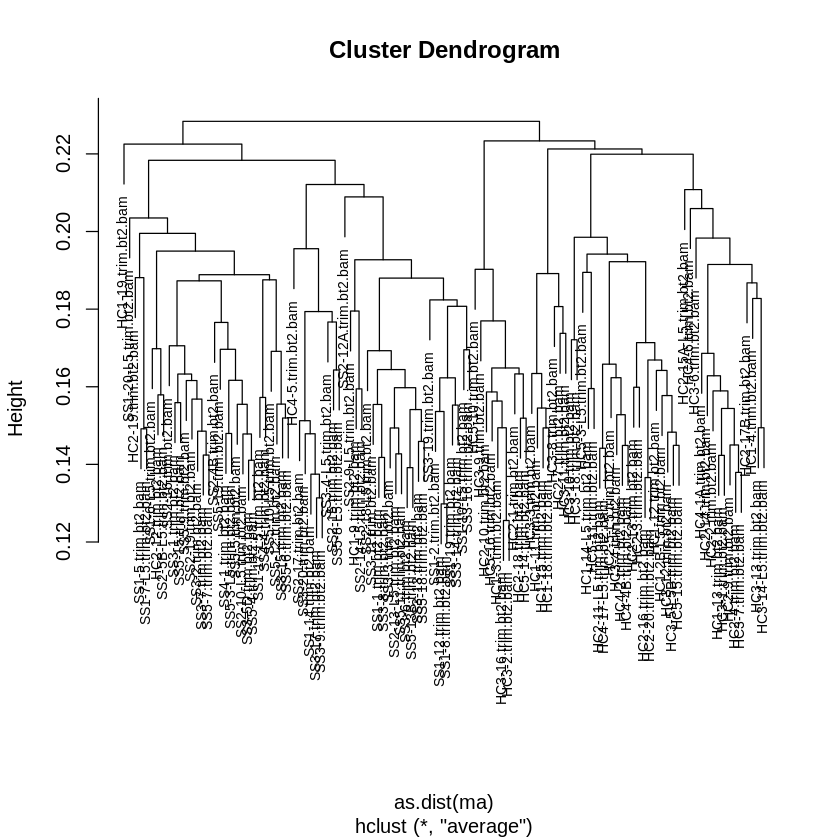

In [28]:
%expand
library(vegan)
# clustering / PCoA based on identity by state (IBS) based on single read resampling
# (for low and/or uneven coverage)

ma = as.matrix(read.table("{SUFFIX}.ibsMat"))
#hc=hclust(as.dist(ma),"ave")
#plot(hc,cex=0.5)  # this shows how similar clones are

ma=ma[goods,goods]
dimnames(ma)=list(bams[goods],bams[goods])
hc=hclust(as.dist(ma),"ave")
plot(hc,cex=0.7) # without clones

# performing PCoA and CAP
conds=data.frame(cbind(site))
pp0=capscale(ma~1)
pp=capscale(ma~site,conds)

# significance of by-site divergence
adonis(ma~site,conds)




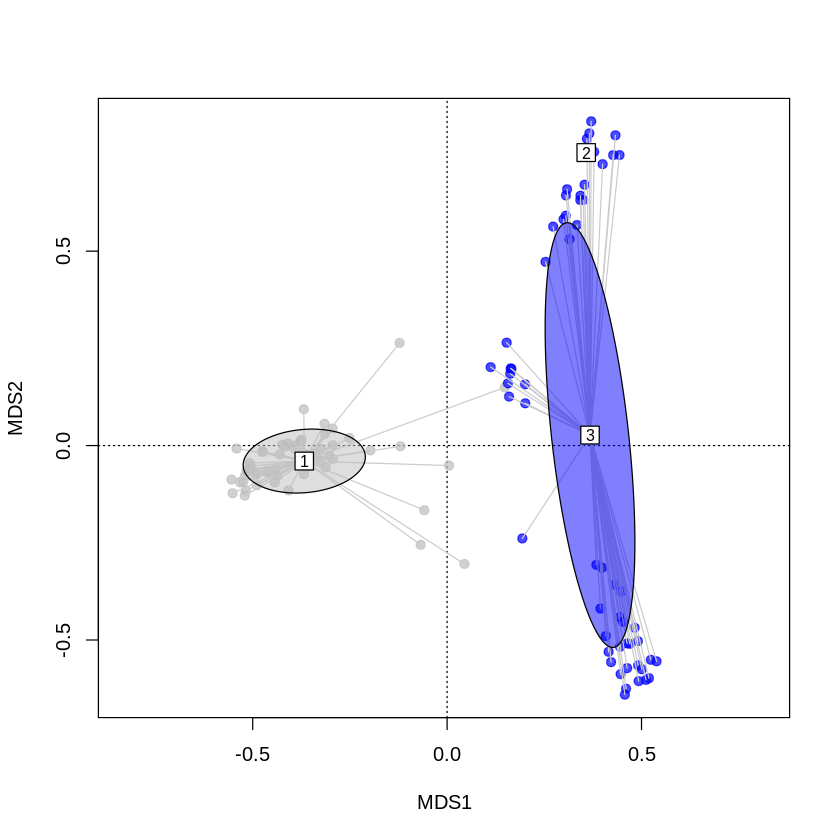

In [29]:
# eigenvectors
#plot(pp0$CA$eig) 

axes2plot=c(1,2)  
#quartz()
library(adegenet) # for transp()http://localhost:8809/notebooks/SOS_angsd.ipynb#
cmd=pp0
plot(cmd,choices=axes2plot,display="sites",type="n") # choices - axes to display
points(cmd,choices=axes2plot,pch=19,col=transp(colors,alpha=0.7))
#ordihull(cmd,choices= axes2plot,groups= conds$grp,draw="polygon",col=1+as.numeric(unique(as.factor(conds$grp))),label=T)
ordispider(cmd,choices= axes2plot,groups=conds$site,col="grey80")
ordiellipse(cmd,choices= axes2plot,groups= conds$site,draw="polygon",col=colpops,label=T)

# unscaled, to identify outliers
#plot(cmd$CA$u[,axes2plot],pch=19,col=colors)
#ordispider(cmd$CA$u[,axes2plot],groups=conds$site,col="grey80")
#ordiellipse(cmd$CA$u[,axes2plot],groups= conds$site,draw="polygon",col=colpops,label=T)
#identify(cmd$CA$u[,axes2plot],labels=colnames(ma),n=3,cex=0.7)


#### Using NGScoVar

In [33]:
goods


[1]   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
 [19]  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
 [37]  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
 [55]  55  56  57 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 [73] 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 [91] 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
[109] 161 162 163 164 165 166

In [30]:
length(goods)

[1] 114

In [31]:
%expand
write.table(cbind(seq(1,length(goods)),rep(1,length(goods)),as.character(site)), row.names=F, sep="\t",
col.names=c("FID","IID","CLUSTER"), file="{SUFFIX}_HCSS.clst", quote=F)

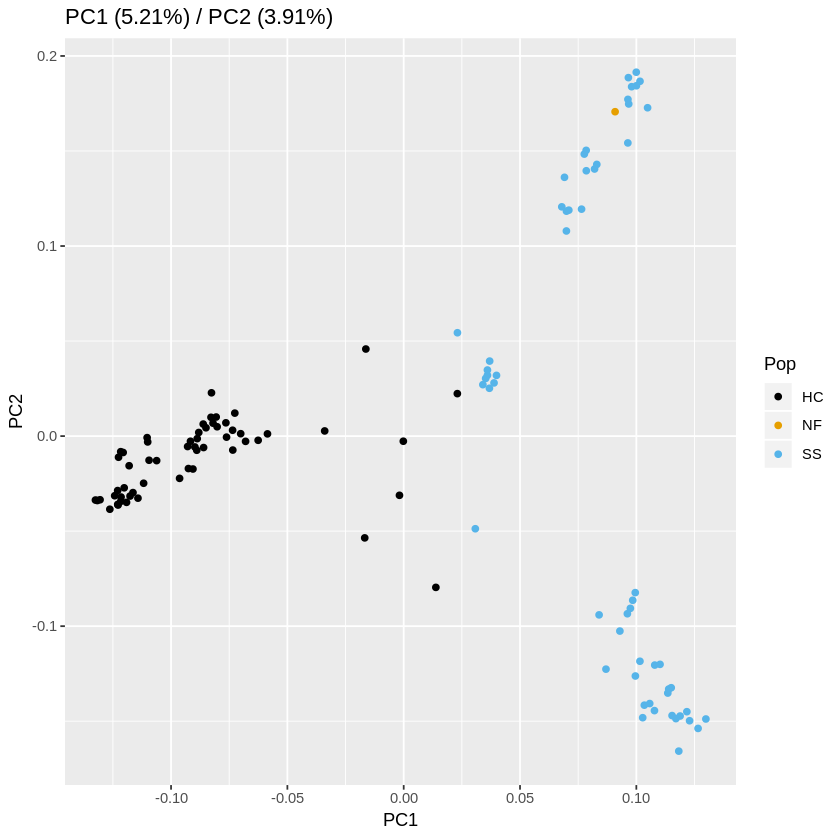

In [32]:
%expand
library(methods)
library(optparse)
library(ggplot2)

# colorblind friendly: http://www.cookbook-r.com/Graphs/Colors_(ggplot2)/
cbPalette <- c("#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")
# To use for fills, add: scale_fill_manual(values=cbPalette)
# To use for line and point colors, add: scale_colour_manual(values=cbPalette)

#option_list <- list(make_option(c('-i','--in_file'), action='store', type='character', default=NULL, help='Input file (output from ngsCovar)'),
#                    make_option(c('-c','--comp'), action='store', type='character', default=1-2, help='Components to plot'),
#                    make_option(c('-a','--annot_file'), action='store', type='character', default=NULL, help='Annotation file with individual classification (2 column TSV with ID and ANNOTATION)'),
#                    make_option(c('-o','--out_file'), action='store', type='character', default=NULL, help='Output file')                    )
#opt <- parse_args(OptionParser(option_list = option_list))

# Annotation file is in plink cluster format

#################################################################################

# Read input file
covar <- read.table("{SUFFIX}.covar", stringsAsFact=F);

covar=covar[goods,goods]
dimnames(covar)=list(bams[goods],bams[goods])

# Read annot file
annot <- read.table("{SUFFIX}_HCSS.clst", sep="\t", header=T); # note that plink cluster files are usually tab-separated

# Parse components to analyze
comp <- as.numeric(strsplit("1-2", "-", fixed=TRUE)[[1]])

# Eigenvalues
eig <- eigen(covar, symm=TRUE);
eig$val <- eig$val/sum(eig$val);
#cat(signif(eig$val, digits=3)*100,"\n");

# Plot
PC <- as.data.frame(eig$vectors)
colnames(PC) <- gsub("V", "PC", colnames(PC))
PC$Pop <- factor(annot$CLUSTER)

title <- paste("PC",comp[1]," (",signif(eig$val[comp[1]], digits=3)*100,"%)"," / PC",comp[2]," (",signif(eig$val[comp[2]], digits=3)*100,"%)",sep="",collapse="")

x_axis = paste("PC",comp[1],sep="")
y_axis = paste("PC",comp[2],sep="")

ggplot() + geom_point(data=PC, aes_string(x=x_axis, y=y_axis, color="Pop")) + ggtitle(title) + scale_colour_manual(values=cbPalette)
#ggsave(opt$out_file)
#unlink("Rplots.pdf", force=TRUE)


## Still fixing

## Using regular Admixture
Requires changing contig names to numbers only

In [32]:
%expand
module load vcftools/0.1.15
vcftools --vcf {SUFFIX}.vcf --missing-site --out {SUFFIX}


VCFtools - 0.1.15
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf Afilt32m70_01.vcf
	--out Afilt32m70_01
	--missing-site

After filtering, kept 167 out of 167 Individuals
Outputting Site Missingness
After filtering, kept 6268 out of a possible 6268 Sites
Run Time = 0.00 seconds


In [30]:
%expand [ ]
mkdir Admix

module load gcc/6.2.0
module load admixture/1.3.0
module load plink/1.90

#gunzip [SUFFIX].vcf.gz
plink --vcf [SUFFIX].vcf --make-bed --allow-extra-chr --out Admix/[SUFFIX]

sed -i 's/Contig//g' Admix/Afilt32m70_01.bim

for K in `seq 1 5`;
do admixture --cv Admix/[SUFFIX].bed $K | tee Admix/[SUFFIX]_${K}.out; done

mkdir: cannot create directory `Admix': File exists
PLINK v1.90p 64-bit (13 Feb 2017)          https://www.cog-genomics.org/plink2
(C) 2005-2017 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to Admix/Afilt32m70_01.log.
Options in effect:
  --allow-extra-chr
  --make-bed
  --out Admix/Afilt32m70_01
  --vcf Afilt32m70_01.vcf

128953 MB RAM detected; reserving 64476 MB for main workspace.
--vcf: Admix/Afilt32m70_01-temporary.bed + Admix/Afilt32m70_01-temporary.bim +
Admix/Afilt32m70_01-temporary.fam written.
6268 variants loaded from .bim file.
167 people (0 males, 0 females, 167 ambiguous) loaded from .fam.
Ambiguous sex IDs written to Admix/Afilt32m70_01.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 167 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081